# File and libraries

In [2]:
import pandas as pd
import numpy as np

filepath=r'data/df_gira_agg_2h_pre_proc.csv'

file_tag = "Gira Bike"


In [3]:
%run "scripts/dslabs_functions.py"


# data functions

In [4]:
%run "scripts/data_functions.py"

data_functions lodaded


# Load

In [6]:
# test_data=True
test_data=False

df=pd.read_csv(filepath, sep=';', decimal=".",  index_col='date', parse_dates=True,  infer_datetime_format=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5421 entries, 01/01/2022 12:00 to 31/03/2023 22:00
Data columns (total 12 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   temperature_2m                                               5421 non-null   float64
 1   rain_mm                                                      5421 non-null   float64
 2   wmo_weather_code                                             5421 non-null   int64  
 3   wind_speed_10m                                               5421 non-null   float64
 4   is_holiday_lisbon                                            5421 non-null   float64
 5   target_station_status                                        5343 non-null   float64
 6   target_station_load_rate                                     5343 non-null   float64
 7   station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima

In [391]:
display(df.shape)
display(df.head())

(8679, 12)

temperature_2m  rain_mm  wmo_weather_code  wind_speed_10m  \
date                                                                          
01/01/2022 12:00            16.9      0.0                 3             5.4   
01/01/2022 13:00            17.9      0.0                 3             5.5   
01/01/2022 14:00            18.4      0.0                 3             5.6   
01/01/2022 15:00            18.6      0.0                 3             5.8   
01/01/2022 16:00            17.9      0.0                 2             5.9   

                  is_holiday_lisbon  target_station_status  \
date                                                         
01/01/2022 12:00                1.0                    1.0   
01/01/2022 13:00                1.0                    1.0   
01/01/2022 14:00                1.0                    NaN   
01/01/2022 15:00                1.0                    1.0   
01/01/2022 16:00                1.0                    1.0   

                  target_station_load_rate  \
date                                         
01/01/2022 12:00                      36.0   
01/01/2022 13:00                      32.0   
01/01/2022 14:00                       NaN   
01/01/2022 15:00                      20.0   
01/01/2022 16:00                      18.0   

                  station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima  \
date                                                                         
01/01/2022 12:00                                               28.6          
01/01/2022 13:00                                               28.6          
01/01/2022 14:00                                                NaN          
01/01/2022 15:00                                               14.3          
01/01/2022 16:00                                               32.8          

                  station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia  \
date                                                                         
01/01/2022 12:00                                               50.0          
01/01/2022 13:00                                               46.2          
01/01/2022 14:00                                                NaN          
01/01/2022 15:00                                               37.2          
01/01/2022 16:00                                                5.8          

                  station_load_rate_ Praça de Londres  \
date                                                    
01/01/2022 12:00                                 60.0   
01/01/2022 13:00                                  NaN   
01/01/2022 14:00                                 70.0   
01/01/2022 15:00                                 67.5   
01/01/2022 16:00                                 48.6   

                  station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego  \
date                                                                            
01/01/2022 12:00                                                8.7             
01/01/2022 13:00                                               15.9             
01/01/2022 14:00                                                NaN             
01/01/2022 15:00                                               13.0             
01/01/2022 16:00                                               13.0             

                  station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego  
date                                                                           
01/01/2022 12:00                                                NaN            
01/01/2022 13:00                                               16.7            
01/01/2022 14:00                                               20.0            
01/01/2022 15:00                                               10.0            
01/01/2022 16:00                                               10.0

# Data Profiling

## Dataset Description

- Desc:The dataset was provided by dados.cm-lisboa. It contains open public data sources regarding diferent public sersvices and features in the district of Lisbon. This dataset contains data on the Gira bike stations load in Lisbon. It has info, by minute, of bikes available on the station, number of docs in the stations and also state (active or repair) of the station
    - link: https://dados.cm-lisboa.pt/dataset/gira-bicicletas-de-lisboa-historico
- Time scope: data for the year of 2022
- The original dataset contained data on the station load of the gira stations. To enrich the forecasting we also add information about some weather parameters in Lisbon and also holidays calendar for the period analysed.

## Dimensionality

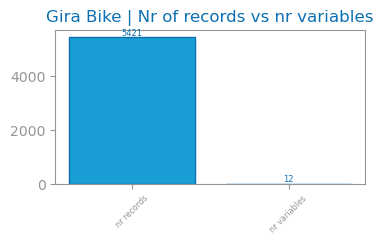

In [7]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

figure(figsize=(4, 2))
values: dict[str, int] = {"nr records": df.shape[0], "nr variables": df.shape[1]}
plot_bar_chart(
    list(values.keys()), list(values.values()), title=f"{file_tag} | Nr of records vs nr variables"
)
# savefig(f"{file_tag}_records_variables.png")
show()

## Missing values

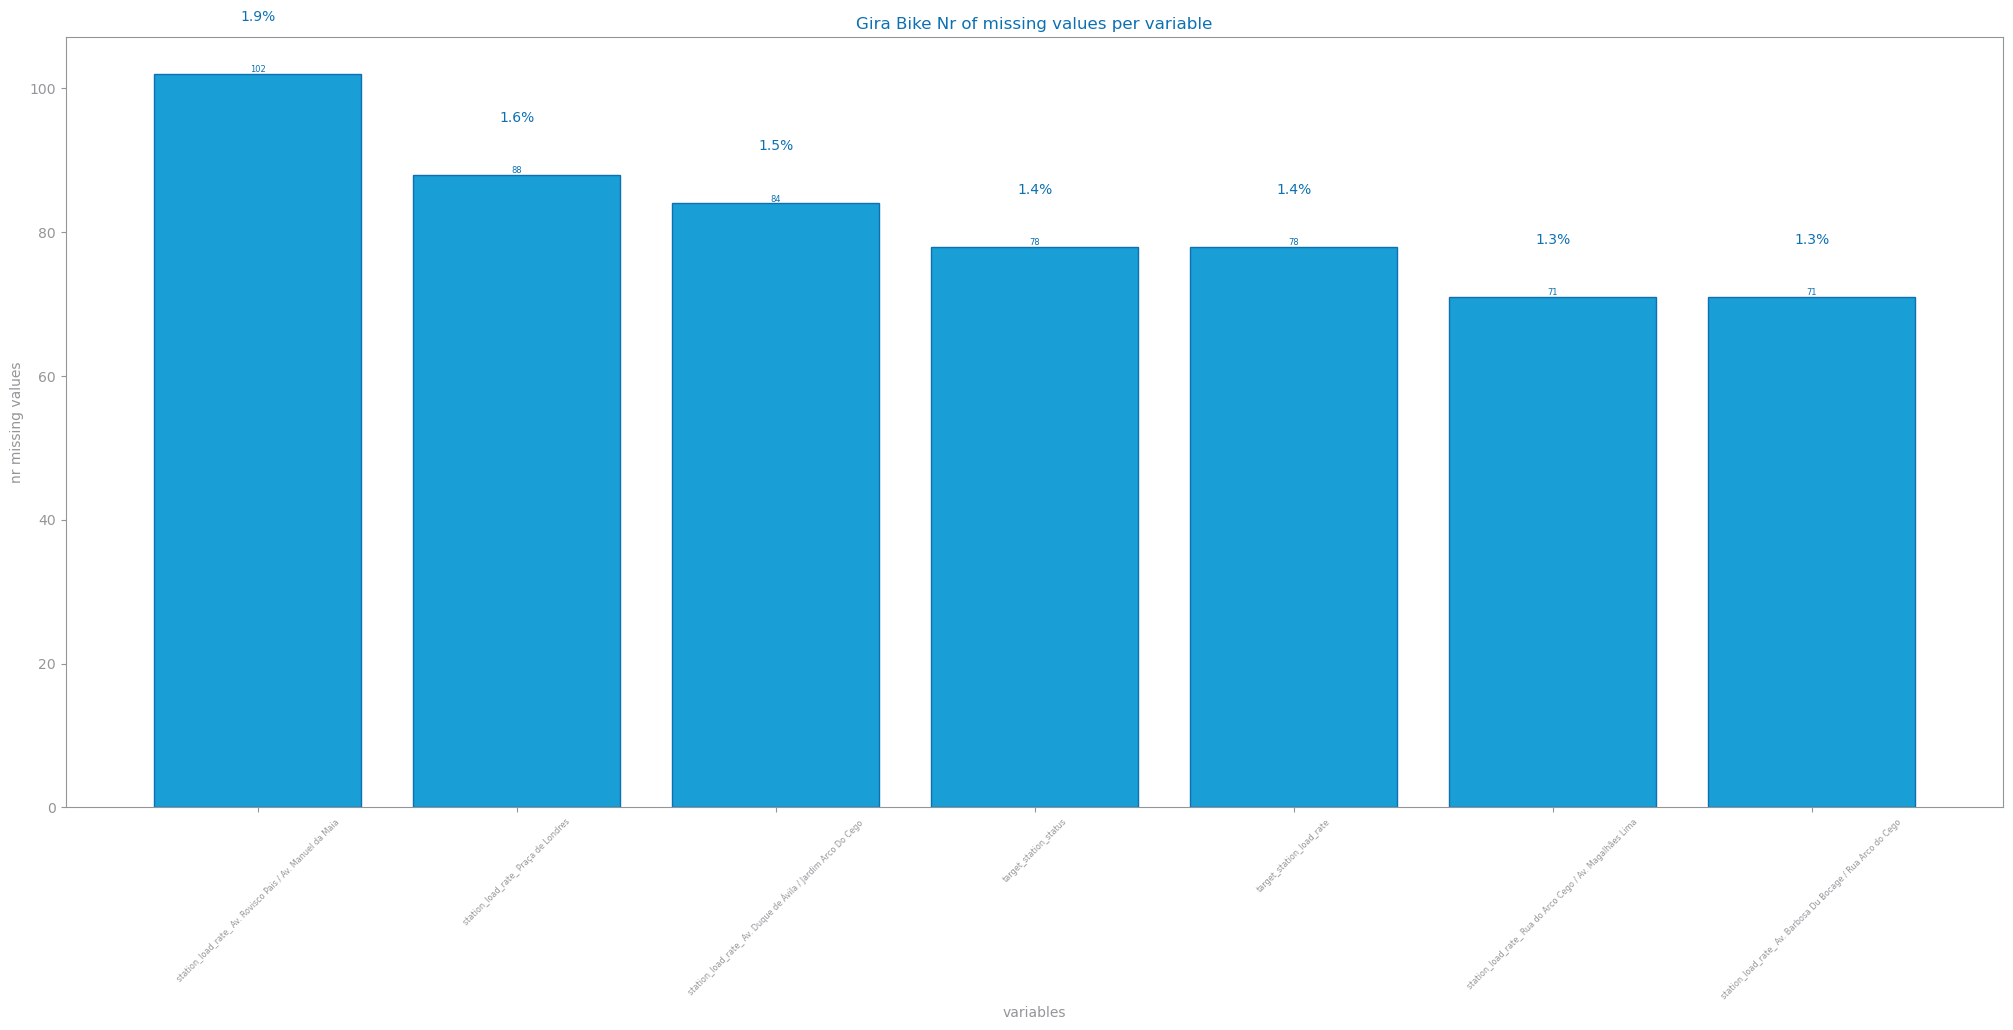

In [8]:
from matplotlib.pyplot import figure, savefig, show
from dslabs_functions import plot_bar_chart

mv: dict[str, int] = {}
total_rows = len(df)

for var in df.columns:
    nr: int = df[var].isna().sum()
    if nr > 0:
        percentage = (nr / total_rows) * 100
        mv[var] = (nr, percentage)

sorted_mv = dict(sorted(mv.items(), key=lambda item: item[1][0], reverse=True))

variables = list(sorted_mv.keys())
missing_values = [val[0] for val in sorted_mv.values()]
percentages = [val[1] for val in sorted_mv.values()]

figure(figsize=(25, 10)) #(largura,altura) 

plot_bar_chart(
    variables,
    missing_values,
    title=f"{file_tag} Nr of missing values per variable",
    xlabel="variables",
    ylabel="nr missing values",
)
for i, (var, perc) in enumerate(zip(variables, percentages)):
    text(i, missing_values[i] + max(missing_values) * 0.08, f"{perc:.1f}%", ha="center", va="center_baseline")

savefig(f"images/{file_tag}_mv.png")
show()

#### How to deal with missing values in target value? 

In [9]:
df_mv = df.copy()

In [10]:
df_mv['missing_gap'] = df_mv['target_station_load_rate'].isna().astype(int)
df_mv['gap_streak'] = df_mv['missing_gap'].groupby(df_mv['missing_gap'].diff().ne(0).cumsum()).cumsum()
print(df_mv['gap_streak'].value_counts())  # Ver tamanho dos buracos
display(df_mv.shape[0])


gap_streak
0    5343
1      69
2       6
3       3
Name: count, dtype: int64


5421

- Do total de registos 8679, cerca de 9,8% de missing values (991), 
- Significa que em 2022, em 9,8% das medições por horas não temos valores station_load_rate
    - Deste 990 missing values:
        - 854 missing values (86%) são ocorrencias de missing values que ocorreram individualmente ( no momento a seguir existe valor de station load rate)
        - 145 missing values (14%) são ocorrencias de missing values consecutivos, ou seja aconteceram pelo menos 2 vezes sequencialmente (não temos para as 11h nem para as 12h)

In [11]:
df.head()

temperature_2m  rain_mm  wmo_weather_code  wind_speed_10m  \
date                                                                          
01/01/2022 12:00            17.4      0.0                 3             5.5   
01/01/2022 14:00            18.6      0.0                 3             5.8   
01/01/2022 16:00            16.7      0.0                 2             6.2   
01/01/2022 18:00            13.9      0.0                 3             7.6   
01/01/2022 20:00            13.8      0.0                 3             8.8   

                  is_holiday_lisbon  target_station_status  \
date                                                         
01/01/2022 12:00                1.0                    1.0   
01/01/2022 14:00                1.0                    1.0   
01/01/2022 16:00                1.0                    1.0   
01/01/2022 18:00                1.0                    1.0   
01/01/2022 20:00                1.0                    1.0   

                  target_station_load_rate  \
date                                         
01/01/2022 12:00                      34.7   
01/01/2022 14:00                      20.0   
01/01/2022 16:00                       8.0   
01/01/2022 18:00                       4.0   
01/01/2022 20:00                       4.0   

                  station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima  \
date                                                                         
01/01/2022 12:00                                               28.6          
01/01/2022 14:00                                               14.3          
01/01/2022 16:00                                               30.4          
01/01/2022 18:00                                               20.0          
01/01/2022 20:00                                               21.4          

                  station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia  \
date                                                                         
01/01/2022 12:00                                               47.4          
01/01/2022 14:00                                               37.2          
01/01/2022 16:00                                                8.6          
01/01/2022 18:00                                               25.6          
01/01/2022 20:00                                               35.9          

                  station_load_rate_ Praça de Londres  \
date                                                    
01/01/2022 12:00                                 60.0   
01/01/2022 14:00                                 68.0   
01/01/2022 16:00                                 43.6   
01/01/2022 18:00                                 15.0   
01/01/2022 20:00                                 27.5   

                  station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego  \
date                                                                            
01/01/2022 12:00                                               12.3             
01/01/2022 14:00                                               13.0             
01/01/2022 16:00                                                4.3             
01/01/2022 18:00                                                0.0             
01/01/2022 20:00                                               15.2             

                  station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego  
date                                                                           
01/01/2022 12:00                                               16.7            
01/01/2022 14:00                                               13.3            
01/01/2022 16:00                                                7.5            
01/01/2022 18:00                                               10.0            
01/01/2022 20:00                                               10.0

In [12]:
# Selecionar as linhas onde station_load_rate é NaN df[df['target_station_load_rate'].isna()]

df_miss = df[df['target_station_load_rate'].isna()]
df_miss.head(30)


temperature_2m  rain_mm  wmo_weather_code  wind_speed_10m  \
date                                                                          
05/01/2022 16:00            14.9      0.0                 3            22.9   
06/01/2022 10:00            13.0      0.0                 1             7.9   
12/01/2022 06:00             9.4      0.0                 0            13.8   
13/01/2022 14:00            14.4      0.0                 3            11.8   
26/01/2022 04:00             8.5      0.0                 0            15.7   
28/01/2022 02:00            10.2      0.0                 0            14.9   
28/01/2022 10:00            11.1      0.0                 0            19.6   
28/01/2022 16:00            16.4      0.0                 0            15.4   
29/01/2022 06:00             8.8      0.0                 0            16.2   
29/01/2022 08:00             8.9      0.0                 0            17.3   
29/01/2022 10:00            11.0      0.0                 0            17.9   
01/02/2022 04:00             8.8      0.0                 0            10.3   
02/02/2022 16:00            16.7      0.0                 3             2.3   
04/02/2022 04:00             9.6      0.0                 3             6.2   
07/02/2022 06:00             9.1      0.0                 1            15.8   
11/02/2022 16:00            18.2      0.0                 3             8.6   
12/02/2022 04:00             9.1      0.0                 0             7.2   
01/04/2022 16:00            15.2      0.0                 0            16.4   
09/04/2022 06:00            14.7      0.0                 3            12.5   
29/04/2022 14:00            24.1      0.0                 2             7.8   
20/05/2022 10:00            24.7      0.0                 3            15.3   
31/05/2022 06:00            18.2      0.0                 2            17.8   
01/07/2022 22:00            17.7      0.0                 1            23.4   
09/07/2022 10:00            33.0      0.0                 0             9.1   
10/07/2022 18:00            27.3      0.0                 0            14.8   
13/07/2022 04:00            22.5      0.0                 3             4.6   
14/07/2022 06:00            24.8      0.0                 3            13.7   
21/07/2022 18:00            22.3      0.0                 2            19.2   
26/07/2022 20:00            20.7      0.0                 0            16.6   
28/07/2022 04:00            18.6      0.0                 3            12.5   

                  is_holiday_lisbon  target_station_status  \
date                                                         
05/01/2022 16:00                0.0                    NaN   
06/01/2022 10:00                0.0                    NaN   
12/01/2022 06:00                0.0                    NaN   
13/01/2022 14:00                0.0                    NaN   
26/01/2022 04:00                0.0                    NaN   
28/01/2022 02:00                0.0                    NaN   
28/01/2022 10:00                0.0                    NaN   
28/01/2022 16:00                0.0                    NaN   
29/01/2022 06:00                0.0                    NaN   
29/01/2022 08:00                0.0                    NaN   
29/01/2022 10:00                0.0                    NaN   
01/02/2022 04:00                0.0                    NaN   
02/02/2022 16:00                0.0                    NaN   
04/02/2022 04:00                0.0                    NaN   
07/02/2022 06:00                0.0                    NaN   
11/02/2022 16:00                0.0                    NaN   
12/02/2022 04:00                0.0                    NaN   
01/04/2022 16:00                0.0                    NaN   
09/04/2022 06:00                0.0                    NaN   
29/04/2022 14:00                0.0                    NaN   
20/05/2022 10:00                0.0                    NaN   
31/05/2022 06:00                0.0                    NaN   
0

In [13]:
# Cria uma cópia do DataFrame para evitar alterações no original
df_copy = df.copy()

# Certifica-te de que o índice é datetime
df_copy.index = pd.to_datetime(df_copy.index, errors='coerce')

# Cria uma nova coluna 'date_from_index' a partir do índice, extraindo apenas a parte da data
df_copy['date_from_index'] = df_copy.index.date

# Filtra as linhas onde 'target_station_load_rate' é NaN
df_miss = df_copy[df_copy['target_station_load_rate'].isna()]

# Agrupa os dados pela coluna 'date_from_index' e conta o número de missing values por dia
missing_by_day = df_miss.groupby('date_from_index').size()

# Exibe o resultado
display(missing_by_day.head())


date_from_index
2022-01-02    1
2022-01-04    1
2022-01-07    1
2022-01-09    1
2022-01-11    2
dtype: int64

##### MV by hour,day, month

date_from_index
2022-01-02    1
2022-01-04    1
2022-01-07    1
2022-01-09    1
2022-01-11    2
2022-02-02    1
2022-03-10    1
2022-04-02    1
2022-05-01    1
2022-06-01    1
2022-07-02    1
2022-07-10    1
2022-09-04    1
2022-09-07    1
2022-09-12    1
2022-10-07    1
2022-11-02    1
2022-11-11    1
2022-12-01    1
2022-12-02    1
2022-12-08    1
2023-03-03    1
2023-04-02    2
2023-06-03    1
2023-07-03    3
2023-10-01    1
dtype: int64
date_from_index
2022-01-02    1
2022-01-04    1
2022-01-07    1
2022-01-09    1
2022-01-11    2
2022-02-02    1
2022-03-10    1
2022-04-02    1
2022-05-01    1
2022-06-01    1
2022-07-02    1
2022-07-10    1
2022-09-04    1
2022-09-07    1
2022-09-12    1
2022-10-07    1
2022-11-02    1
2022-11-11    1
2022-12-01    1
2022-12-02    1
2022-12-08    1
2023-03-03    1
2023-04-02    2
2023-06-03    1
2023-07-03    3
2023-10-01    1
dtype: int64


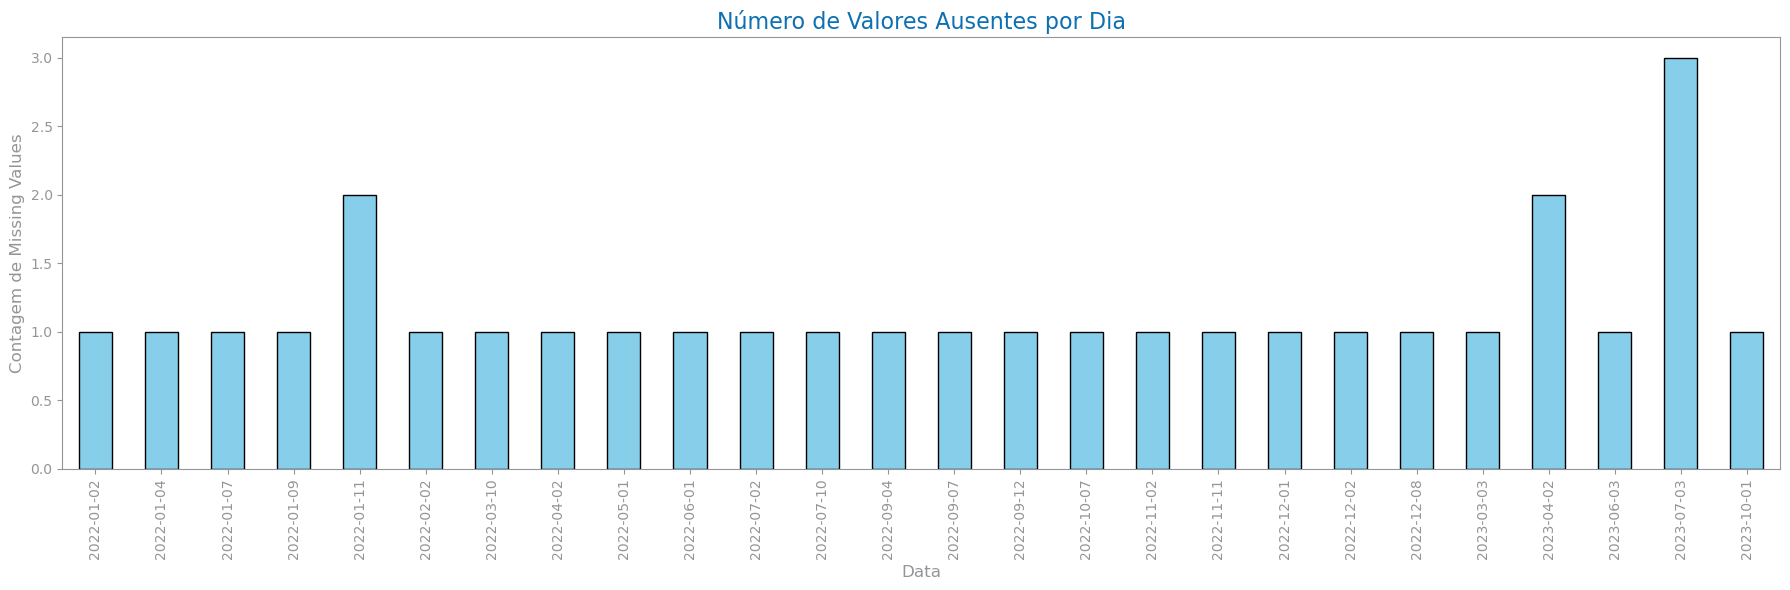

In [14]:
# Cria uma cópia do DataFrame para evitar alterações no original
df_copy = df.copy()

# Certifica-te de que o índice é datetime
df_copy.index = pd.to_datetime(df_copy.index, errors='coerce')

# Cria uma nova coluna 'date_from_index' a partir do índice, extraindo apenas a parte da data
df_copy['date_from_index'] = df_copy.index.date

# Filtra as linhas onde 'target_station_load_rate' é NaN
df_miss = df_copy[df_copy['target_station_load_rate'].isna()]

# Agrupa os dados pela coluna 'date_from_index' e conta o número de missing values por dia
missing_by_day = df_miss.groupby('date_from_index').size()

# Exibe o resultado
print(missing_by_day)

# Exporta o resultado para um arquivo CSV
missing_by_day.to_csv('missing_by_day.csv', header=['missing_count'])

# Exibe o resultado
print(missing_by_day)

# Plotando o gráfico de barras
plt.figure(figsize=(18, 6))  # Define o tamanho do gráfico
missing_by_day.plot(kind='bar', color='skyblue', edgecolor='black')

# Adiciona título e rótulos aos eixos
plt.title('Número de Valores Ausentes por Dia', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Contagem de Missing Values', fontsize=12)

# Exibe o gráfico
plt.xticks(rotation=90)  # Gira os rótulos do eixo X para melhor visualização
plt.tight_layout()  # Ajusta o layout para que os rótulos não se sobreponham
plt.show()


hour
0.0     4
2.0     1
4.0     5
6.0     5
8.0     1
10.0    2
12.0    1
14.0    1
16.0    4
18.0    1
20.0    2
22.0    3
dtype: int64


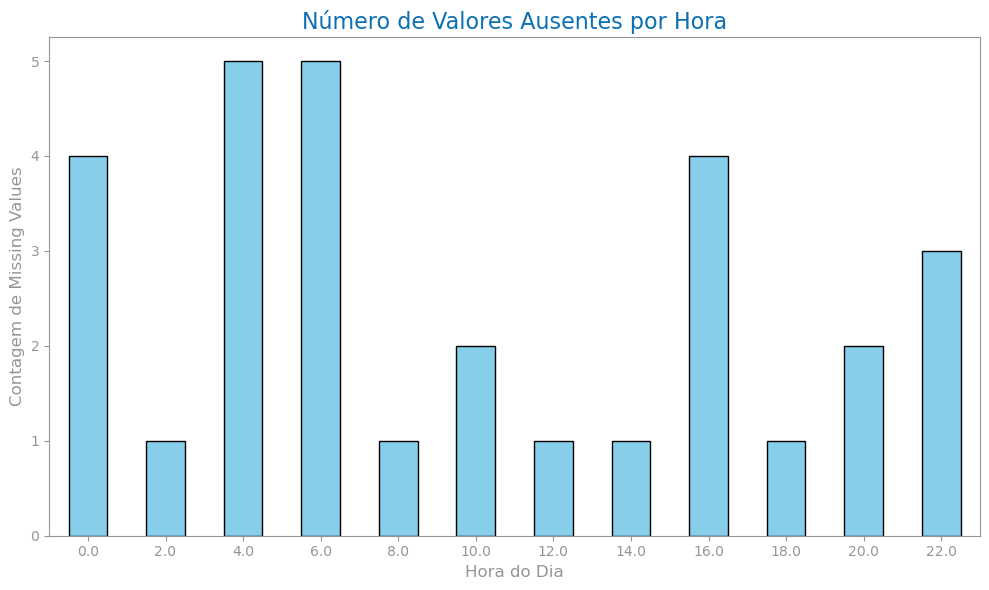

In [15]:
import matplotlib.pyplot as plt

# Cria uma cópia do DataFrame para evitar alterações no original
df_copy = df.copy()

# Certifica-te de que o índice é datetime
df_copy.index = pd.to_datetime(df_copy.index, errors='coerce')

# Cria uma nova coluna 'hour' a partir do índice, extraindo apenas a hora
df_copy['hour'] = df_copy.index.hour

# Filtra as linhas onde 'target_station_load_rate' é NaN
df_miss = df_copy[df_copy['target_station_load_rate'].isna()]

# Agrupa os dados pela coluna 'hour' e conta o número de missing values por hora
missing_by_hour = df_miss.groupby('hour').size()

# Exibe o resultado
print(missing_by_hour)

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))  # Define o tamanho do gráfico
missing_by_hour.plot(kind='bar', color='skyblue', edgecolor='black')

# Adiciona título e rótulos aos eixos
plt.title('Número de Valores Ausentes por Hora', fontsize=16)
plt.xlabel('Hora do Dia', fontsize=12)
plt.ylabel('Contagem de Missing Values', fontsize=12)

# Exibe o gráfico
plt.xticks(rotation=0)  # Mantém os rótulos do eixo X na horizontal
plt.tight_layout()  # Ajusta o layout para que os rótulos não se sobreponham
plt.show()


#### Analysis for the report

Our initial dataset, contains missing value for the target variables and also for other relveant external variables. 

### Variables Type

In [16]:
df.index = pd.to_datetime(df.index, format="%d/%m/%Y %H:%M", errors="raise")
print(df.index.dtype)


datetime64[ns]


In [17]:
df.dtypes

temperature_2m                                                 float64
rain_mm                                                        float64
wmo_weather_code                                                 int64
wind_speed_10m                                                 float64
is_holiday_lisbon                                              float64
target_station_status                                          float64
target_station_load_rate                                       float64
station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima       float64
station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia       float64
station_load_rate_ Praça de Londres                            float64
station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego    float64
station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego    float64
dtype: object

In [18]:
import pandas as pd
from pandas import DataFrame, Series, to_numeric, to_datetime

def get_variable_types(df: DataFrame) -> dict[str, list]:
    variable_types: dict = {"numeric": [], "binary": [], "date": [], "symbolic": []}

    # Check if the index is a datetime type
    if isinstance(df.index, pd.DatetimeIndex):
        variable_types["date"].append("index")  # Label index separately

    nr_values: Series = df.nunique(axis=0, dropna=True)
    for c in df.columns:
        if 2 == nr_values[c]:
            variable_types["binary"].append(c)
            df[c] = df[c].astype("bool")  # Convert to boolean
        else:
            # ✅ First, check if it's already datetime
            if pd.api.types.is_datetime64_any_dtype(df[c]):
                variable_types["date"].append(c)
            else:
                # ✅ Convert numeric values
                try:
                    df[c] = to_numeric(df[c], errors="raise")
                    variable_types["numeric"].append(c)
                except ValueError:
                    # ✅ Convert datetime (and store the converted values)
                    try:
                        df[c] = to_datetime(df[c], errors="raise", format="%Y-%m-%d %H:%M:%S")
                        variable_types["date"].append(c)
                    except ValueError:
                        variable_types["symbolic"].append(c)

    return variable_types

# Apply the function
variable_types = get_variable_types(df)
print(variable_types)

# Check if datetime conversion worked
print(df.dtypes)
print(df.head())

{'numeric': ['temperature_2m', 'rain_mm', 'wmo_weather_code', 'wind_speed_10m', 'target_station_load_rate', 'station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima', 'station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia', 'station_load_rate_ Praça de Londres', 'station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego', 'station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego'], 'binary': ['is_holiday_lisbon', 'target_station_status'], 'date': ['index'], 'symbolic': []}
temperature_2m                                                 float64
rain_mm                                                        float64
wmo_weather_code                                                 int64
wind_speed_10m                                                 float64
is_holiday_lisbon                                                 bool
target_station_status                                             bool
target_station_load_rate                                       float64
station_load_rat

#### Change symbolic columns type, to category (instead of object)

### variables per type plot

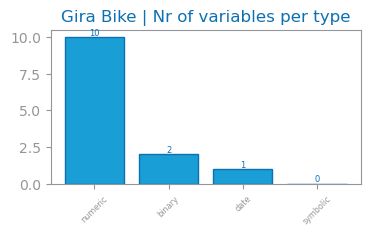

In [19]:
counts: dict[str, int] = {}
for tp in variable_types.keys():
    counts[tp] = len(variable_types[tp])

figure(figsize=(4, 2))
plot_bar_chart(
    list(counts.keys()), list(counts.values()), title=f"{file_tag} | Nr of variables per type"
)
# savefig(f"{file_tag}_variable_types.png")
show()

## Variables Type

## Data Distribution

In [20]:
summary5: df = df.describe(include="all")
summary5

temperature_2m      rain_mm  wmo_weather_code  wind_speed_10m  \
count      5421.000000  5421.000000        5421.00000     5421.000000   
unique             NaN          NaN               NaN             NaN   
top                NaN          NaN               NaN             NaN   
freq               NaN          NaN               NaN             NaN   
mean         16.301088     0.080760           7.51983       12.876148   
std           5.240615     0.434271          16.94806        6.231624   
min           3.700000     0.000000           0.00000        0.400000   
25%          12.600000     0.000000           0.00000        7.900000   
50%          16.000000     0.000000           1.00000       12.200000   
75%          19.200000     0.000000           3.00000       16.700000   
max          36.800000     8.400000          65.00000       39.100000   

       is_holiday_lisbon target_station_status  target_station_load_rate  \
count               5421                  5421               5343.000000   
unique                 2                     2                       NaN   
top                False                  True                       NaN   
freq                5241                  5405                       NaN   
mean                 NaN                   NaN                 30.875950   
std                  NaN                   NaN                 24.745597   
min                  NaN                   NaN                  0.000000   
25%                  NaN                   NaN                 11.000000   
50%                  NaN                   NaN                 24.000000   
75%                  NaN                   NaN                 45.300000   
max                  NaN                   NaN                100.000000   

        station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima  \
count                                         5350.000000          
unique                                                NaN          
top                                                   NaN          
freq                                                  NaN          
mean                                            35.690579          
std                                             23.959682          
min                                              0.000000          
25%                                             16.300000          
50%                                             31.500000          
75%                                             50.875000          
max                                            100.000000          

        station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia  \
count                                         5319.000000          
unique                                                NaN          
top                                                   NaN          
freq                                                  NaN          
mean                                            33.905866          
std                                             24.715105          
min                                              0.000000          
25%                                             15.400000          
50%                                             26.900000          
75%                                             47.500000          
max                                            100.000000          

        station_load_rate_ Praça de Londres  \
count                           5333.000000   
unique                                  NaN   
top                                     NaN   
freq                                    NaN   
mean                              44.127077   
std                               28.273187   
min                                0.000000   
25%                               20.000000   
50%                               40.000000   
75%                               67.100000   
max                              100.000000   

        station_loa

In [21]:

# Obter os tipos de variáveis
variables_types: dict[str, list] = get_variable_types(df)

# Debug: Verificar os tipos de variáveis
print("Tipos de variáveis:", variables_types)

Tipos de variáveis: {'numeric': ['temperature_2m', 'rain_mm', 'wmo_weather_code', 'wind_speed_10m', 'target_station_load_rate', 'station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima', 'station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia', 'station_load_rate_ Praça de Londres', 'station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego', 'station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego'], 'binary': ['is_holiday_lisbon', 'target_station_status'], 'date': ['index'], 'symbolic': []}


### Numeric Values

#### Boxplot for All Numeric variables

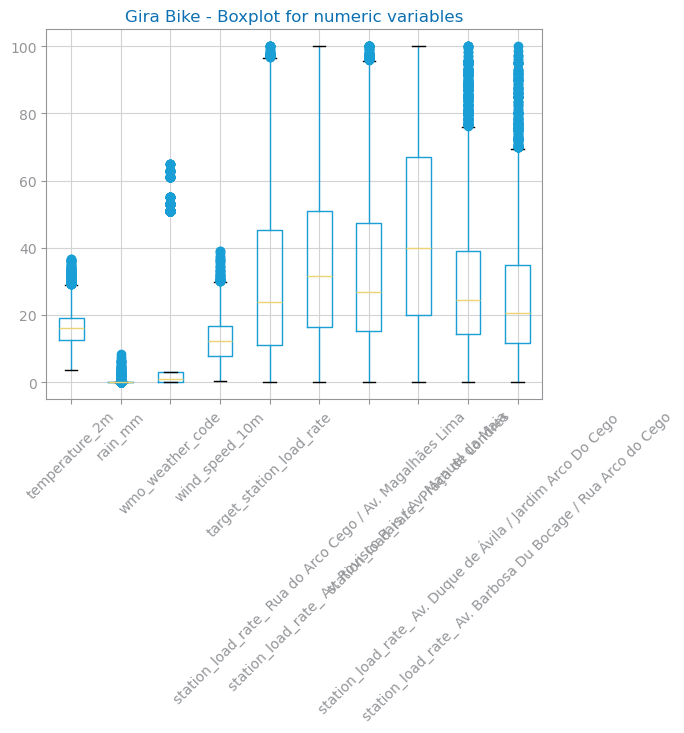

In [22]:
from matplotlib.pyplot import savefig, show, title


variables_types: dict[str, list] = get_variable_types(df)
numeric: list[str] = variable_types["numeric"]


if [] != numeric:
    df[numeric].boxplot(rot=45)
    title(f'{file_tag} - Boxplot for numeric variables')  # Correct way to set title
    savefig(f"images/{file_tag}_profiling_global_boxplot_numeric_vars.png")
    show()
else:
    print("There are no numeric variables.")

#### Boxplot for Single Variable Values

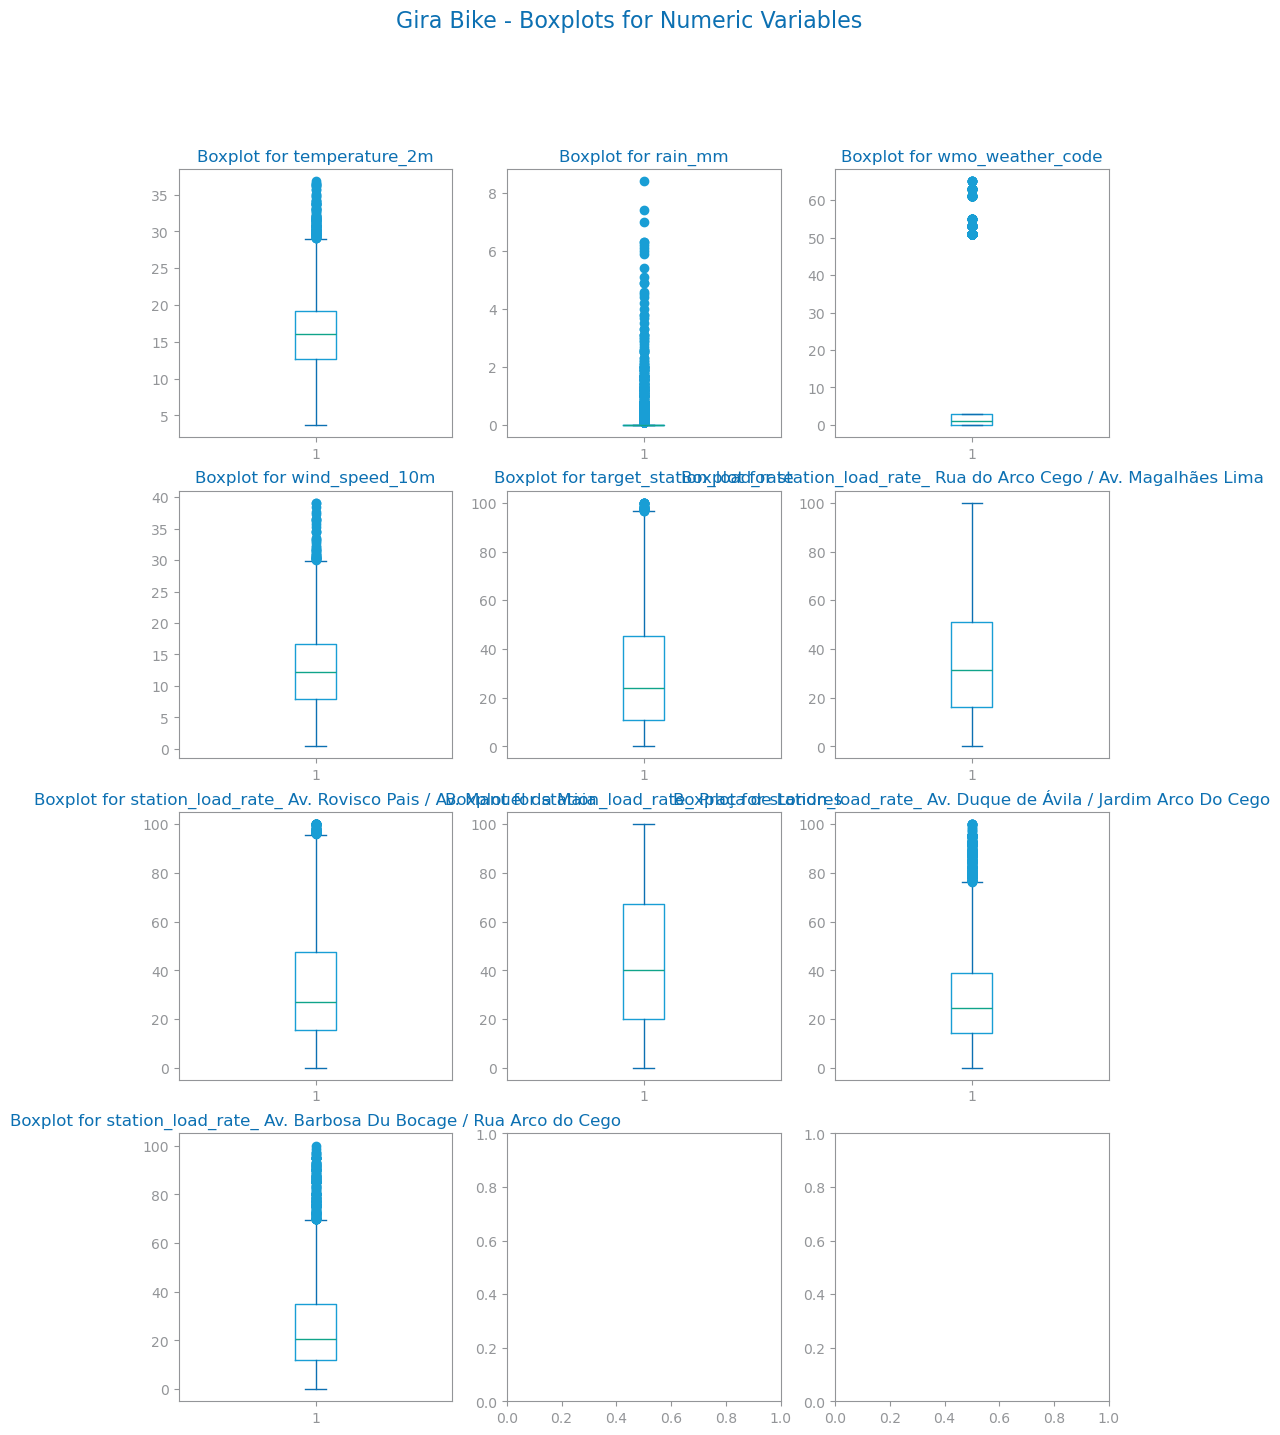

In [23]:
from numpy import ndarray
from matplotlib.figure import Figure
from matplotlib.pyplot import savefig, show, subplots
from dslabs_functions import define_grid, HEIGHT
import pandas as pd

# Obter as variáveis categorizadas pela função get_variable_types
variable_types: dict[str, list] = get_variable_types(df)

# Apenas variáveis numéricas são usadas para os boxplots
numeric = variable_types.get('numeric', [])

# Verificar se a lista de variáveis numéricas não está vazia
if numeric:
    rows, cols = define_grid(len(numeric))  # Definir o número de linhas e colunas com base no número de variáveis
    fig, axs = subplots(rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False)
    fig.suptitle(f"{file_tag} - Boxplots for Numeric Variables", fontsize=16)

    # Iterar sobre as variáveis numéricas e criar os subplots
    i, j = 0, 0
    for n in numeric:
        # Garantir que apenas valores numéricos são passados para boxplot
        data = df[n].dropna().values
        
        if pd.api.types.is_numeric_dtype(df[n]):
            axs[i, j].set_title(f"Boxplot for {n}")
            axs[i, j].boxplot(data)
        
        # Mover para o próximo subplot
        i, j = (i + 1, 0) if (j + 1) % cols == 0 else (i, j + 1)
    savefig(f"images/{file_tag}_profiling_boxplot_single_num_vars.png")
    # Mostrar os gráficos
    show()
else:
    print("There are no numeric variables.")

#### Identify the distribuiton of each numeric variable

In [22]:
from numpy import log
from pandas import Series
from scipy.stats import norm, expon, lognorm
from matplotlib.axes import Axes
#from dslabs_functions import plot_multiline_chart


def compute_known_distributions(x_values: list) -> dict:
    distributions = dict()
    if len(x_values) > 0:  # Check for empty list
        # Gaussian
        mean, sigma = norm.fit(x_values)
        distributions["Normal(%.1f,%.2f)" % (mean, sigma)] = norm.pdf(x_values, mean, sigma)
        # Exponential
        loc, scale = expon.fit(x_values)
        distributions["Exp(%.2f)" % (1 / scale)] = expon.pdf(x_values, loc, scale)
        # LogNorm
        sigma, loc, scale = lognorm.fit(x_values)
        distributions["LogNor(%.1f,%.2f)" % (log(scale), sigma)] = lognorm.pdf(
            x_values, sigma, loc, scale
        )
    return distributions


def histogram_with_distributions(ax: Axes, series: Series, var: str):
    values: list = series.sort_values().to_list()
    if len(values) > 0:  # Check for empty values list
        ax.hist(values, 20, density=True)
        distributions: dict = compute_known_distributions(values)
        plot_multiline_chart(
            values,
            distributions,
            ax=ax,
            title="Best fit for %s" % var,
            xlabel=var,
            ylabel="",
        )
    else:
        print(f"No data available for {var}")


if [] != numeric:
    fig, axs = subplots(
        rows, cols, figsize=(cols * HEIGHT, rows * HEIGHT), squeeze=False
    )
    i, j = 0, 0
    fig.suptitle(f'{file_tag} | Distribution histogram with best fit')
    for n in range(len(numeric)):
        histogram_with_distributions(axs[i, j], df[numeric[n]].dropna(), numeric[n])
        i, j = (i + 1, 0) if (n + 1) % cols == 0 else (i, j + 1)
    savefig(f"./{file_tag}_histogram_numeric_distribution.png")
    show()
else:
    print("There are no numeric variables.")


KeyboardInterrupt: 

: 

: 

## Univariate Time Series - Chart

In [401]:
print(df.dtypes)


temperature_2m                                                 float64
rain_mm                                                        float64
wmo_weather_code                                                 int64
wind_speed_10m                                                 float64
is_holiday_lisbon                                                 bool
target_station_status                                             bool
target_station_load_rate                                       float64
station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima       float64
station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia       float64
station_load_rate_ Praça de Londres                            float64
station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego    float64
station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego    float64
dtype: object


In [24]:
def plot_line_chart(
    xvalues: list,
    yvalues: list,
    ax: Axes = None,  # type: ignore
    title: str = "",
    xlabel: str = "",
    ylabel: str = "",
    name: str = "",
    percentage: bool = False,
    show_stdev: bool = False,
) -> Axes:
    if ax is None:
        ax = gca()
    ax = set_chart_labels(ax=ax, title=title, xlabel=xlabel, ylabel=ylabel)
    ax = set_chart_xticks(xvalues, ax, percentage=percentage)
    if any(y < 0 for y in yvalues) and percentage:
            ax.set_ylim(-1.0, 1.0)
    ax.plot(xvalues, yvalues, c=LINE_COLOR, label=name)
    if show_stdev:
        stdev: float = round(std(yvalues), 3)
        y_bottom: list[float] = [(y - stdev) for y in yvalues]
        y_top: list[float] = [(y + stdev) for y in yvalues]
        ax.fill_between(xvalues, y_bottom, y_top, color=FILL_COLOR, alpha=0.2)
    return ax

Nr. Records =  5421
First timestamp 2022-01-01 12:00:00
Last timestamp 2023-03-31 22:00:00


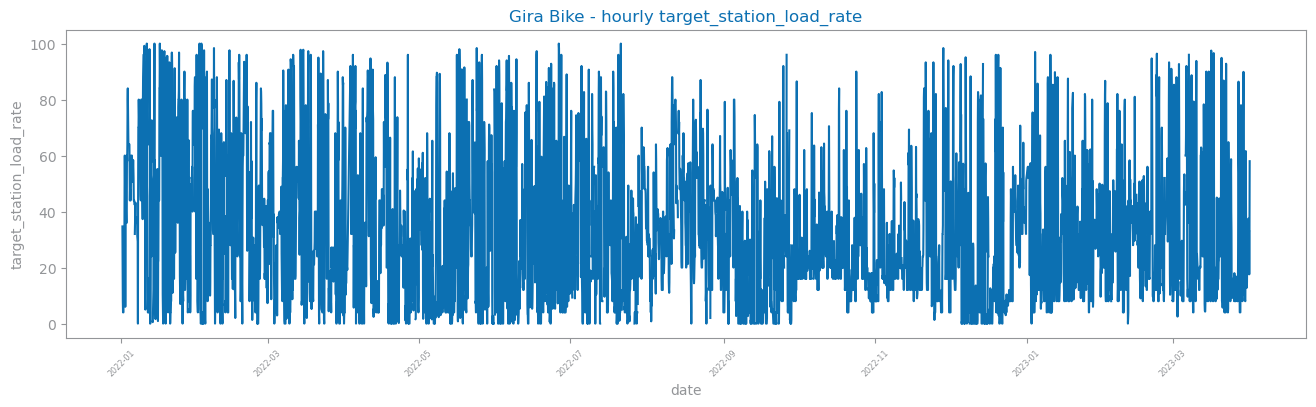

In [25]:
from pandas import  DataFrame, Series
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, HEIGHT

target = "target_station_load_rate"

df_copy = df.copy()
data: DataFrame = df_copy

series: Series = data[target]
print("Nr. Records = ", series.shape[0])
print("First timestamp", series.index[0])
print("Last timestamp", series.index[-1])

HEIGHT=4
figure(figsize=(4 * HEIGHT, HEIGHT))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} - hourly {target}")
show()


#### Analysis for the report

## Multivariate Time Series - Chart

In [552]:
df.shape

(10814, 12)

In [26]:
from matplotlib.axes import Axes
from matplotlib.pyplot import subplots
from matplotlib.figure import Figure

HEIGHT=4

def plot_ts_multivariate_chart(data: DataFrame, title: str, hspace: float = 1.0, height_per_plot: float = 2.0) -> list[Axes]:
    fig: Figure
    axs: list[Axes]
    fig, axs = subplots(data.shape[1], 1, figsize=(2*HEIGHT, HEIGHT / 2 * data.shape[1]), 
                                gridspec_kw={'hspace': hspace} 
)
    fig.suptitle(title)

    for i in range(data.shape[1]):
        col: str = data.columns[i]
        plot_line_chart(
            data[col].index.to_list(),
            data[col].to_list(),
            ax=axs[i],
            xlabel=data.index.name,
            ylabel=col,
        )
    return axs


In [27]:
from matplotlib.axes import Axes
from matplotlib.pyplot import subplots, savefig
from matplotlib.figure import Figure
from pandas import DataFrame

def plot_ts_multivariate_chart(data: DataFrame, title: str, hspace: float = 1.0, height_per_plot: float = 2.0) -> list[Axes]:
    fig: Figure
    axs: list[Axes]
    
    # Calcula a altura total da figura com base no número de subplots e no espaço entre eles
    n_plots = data.shape[1]
    total_height = height_per_plot * n_plots * (1 + hspace)
    
    # Cria os subplots com o tamanho ajustado
    fig, axs = subplots(
        n_plots, 1, 
        figsize=(10, total_height),  # Largura fixa de 10, altura ajustada
        gridspec_kw={'hspace': hspace}  # Espaço vertical entre subplots
    )
    fig.suptitle(title)

    for i in range(n_plots):
        col: str = data.columns[i]
        plot_line_chart(
            data[col].index.to_list(),
            data[col].to_list(),
            ax=axs[i],
            xlabel=data.index.name,
            ylabel=col,
        )
    return axs

Nr. Records =  (10814, 12)
First timestamp 2022-01-01 12:00:00
Last timestamp 2023-03-31 22:00:00


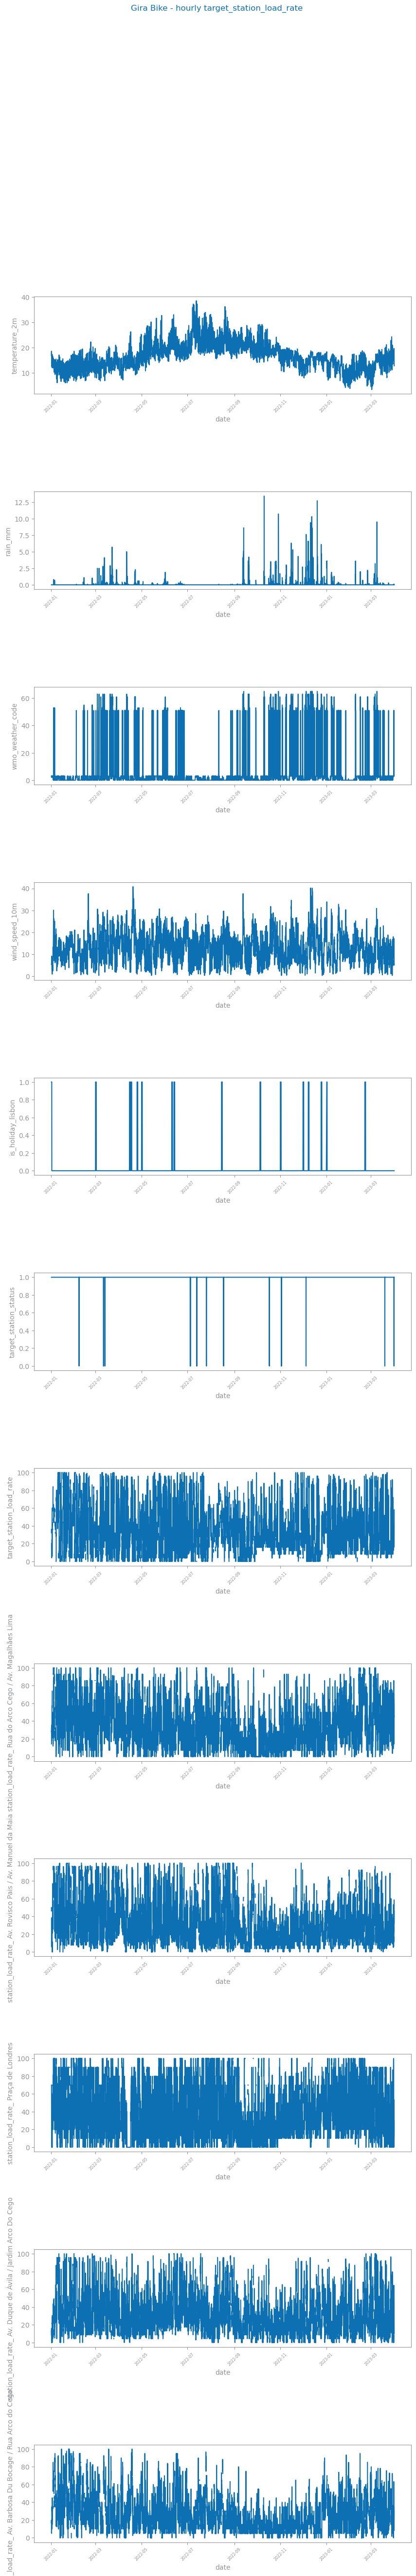

In [555]:
target = "target_station_load_rate"
data: DataFrame = df

print("Nr. Records = ", df.shape)
print("First timestamp", df.index[0])
print("Last timestamp", df.index[-1])

# Define a altura de cada subplot e o espaço entre eles
HEIGHT_PER_PLOT = 2.5
HSPACE = 1
# Plota os gráficos
plot_ts_multivariate_chart(df, title=f"{file_tag} - hourly {target}", hspace=HSPACE, height_per_plot=HEIGHT_PER_PLOT)

# Salva a figura
savefig(f"images/{file_tag}_profiling_multivariate_series.plot.png")

Nr. Records =  (5421, 12)
First timestamp 2022-01-01 12:00:00
Last timestamp 2023-03-31 22:00:00


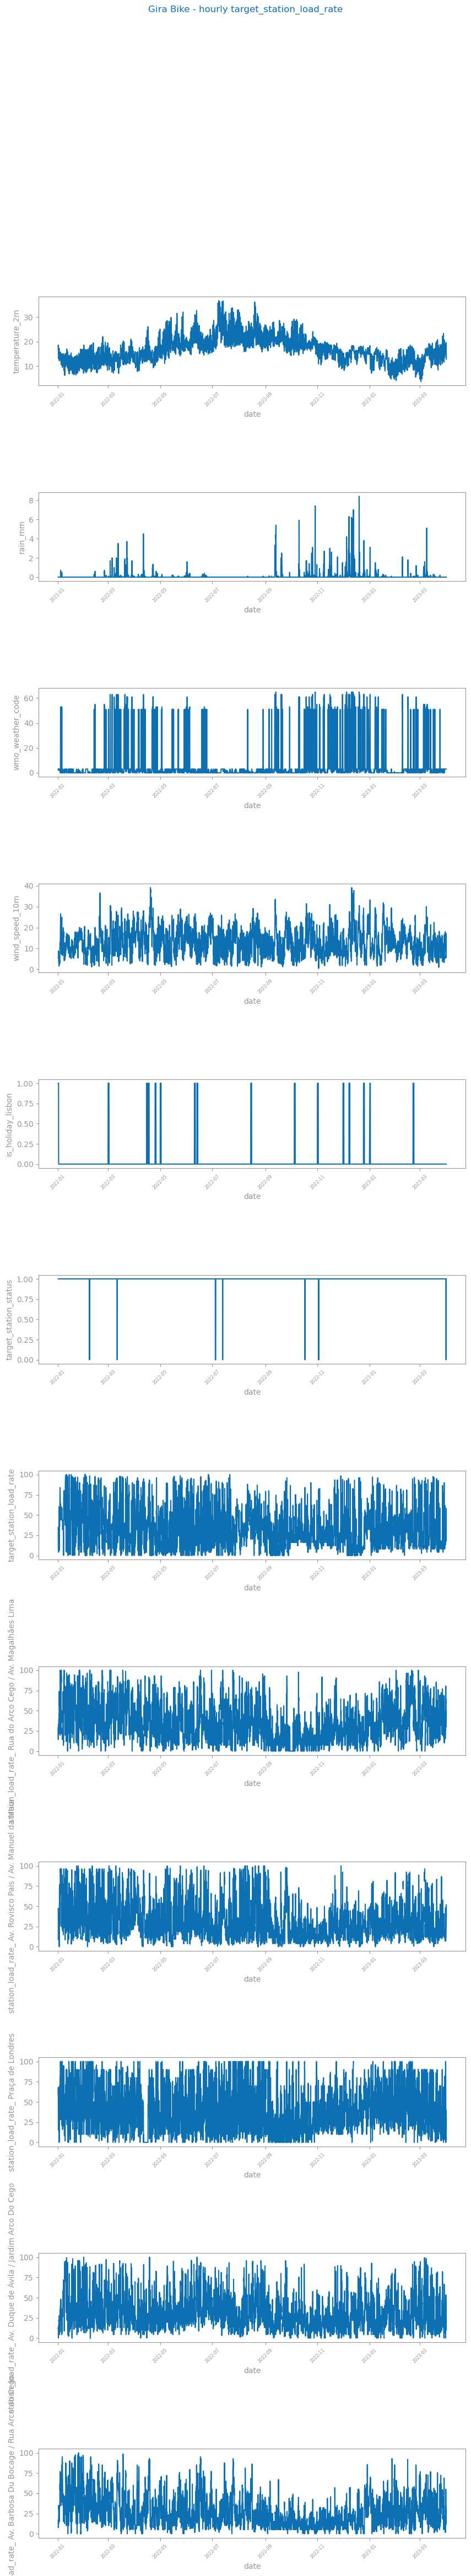

In [28]:

target = "target_station_load_rate"
data: DataFrame = df

print("Nr. Records = ", df.shape)
print("First timestamp", df.index[0])
print("Last timestamp", df.index[-1])

HEIGHT= 6

plot_ts_multivariate_chart(df, title = f"{file_tag} - hourly {target}", hspace=1.2)
savefig(f"images/{file_tag}_profiling_multivariate_series.plot.png")


#### Analysis for the report

## Time Series analysis

In [54]:
target = 'target_station_load_rate'


df_copy = df.copy()
data: DataFrame = df_copy

series: Series = data[target]
#creating also ss_hourly for distribuition study for all time agregations

ss_hours = series
display(f'Number of rows initial series:{ss_hours.shape[0]}')

# To analyse the distribuitions of all time agregations we can't have missing values. 
# As we have missing values for our target value (hourly), we need to drop na's for the series hourly
ss_hours=ss_hours.dropna()
display(f'Number of rows series after drop na : {ss_hours.shape[0]}')

'Number of rows initial series:5421'

'Number of rows series after drop na : 5343'

In [30]:
display(series.head())

date
2022-01-01 12:00:00    34.7
2022-01-01 14:00:00    20.0
2022-01-01 16:00:00     8.0
2022-01-01 18:00:00     4.0
2022-01-01 20:00:00     4.0
Name: target_station_load_rate, dtype: float64

In [31]:
display(ss_hours.head())

date
2022-01-01 12:00:00    34.7
2022-01-01 14:00:00    20.0
2022-01-01 16:00:00     8.0
2022-01-01 18:00:00     4.0
2022-01-01 20:00:00     4.0
Name: target_station_load_rate, dtype: float64

### Granularity

In [55]:
def derive_date_variables(df: DataFrame, date_columns: list[str]) -> DataFrame:
    for date_col in date_columns:
        if date_col == 'index' and isinstance(df.index, pd.DatetimeIndex):
            df['date'] = df.index  # Copy index into a 'date' column
        
        # Ensure we have the 'date' column now
        if 'date' in df.columns:
            df['year'] = df['date'].dt.year
            df['month'] = df['date'].dt.month
            df['quarter'] = df['date'].dt.quarter
            df['day'] = df['date'].dt.day
        else:
            raise ValueError("No valid date column found!")
    
    return df

In [56]:
from numpy import ndarray
from pandas import Series, read_csv
from matplotlib.figure import Figure
from matplotlib.pyplot import subplots, savefig, show
#from dslabs_functions import plot_bar_chart, HEIGHT
#get_variable_types

def analyse_date_granularity(df: DataFrame, var: str, levels: list[str]) -> ndarray:
    cols: int = len(levels)
    fig: Figure
    axs: ndarray
    fig, axs = subplots(1, cols, figsize=(cols * HEIGHT, HEIGHT), squeeze=False)
    fig.suptitle(f"{file_tag} | Granularity study for {var}")

    for i in range(cols):
        # Directly use 'year', 'month', 'quarter', 'day' instead of 'index_year', 'index_quarter', etc.
        column_name = levels[i]  # Just use the level directly like 'year', 'quarter', 'month', 'day'
        
        if column_name not in df.columns:
            print(f"Warning: {column_name} column not found.")
            continue
        
        counts: Series[int] = df[column_name].value_counts()
        plot_bar_chart(
            counts.index.to_list(),
            counts.to_list(),
            ax=axs[0, i],
            title=levels[i],
            xlabel=levels[i],
            ylabel="nr records",
            percentage=False,
        )
    return axs




Index(['temperature_2m', 'rain_mm', 'wmo_weather_code', 'wind_speed_10m',
       'is_holiday_lisbon', 'target_station_status',
       'target_station_load_rate',
       'station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima',
       'station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia',
       'station_load_rate_ Praça de Londres',
       'station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego',
       'station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego', 'date',
       'year', 'month', 'quarter', 'day'],
      dtype='object')


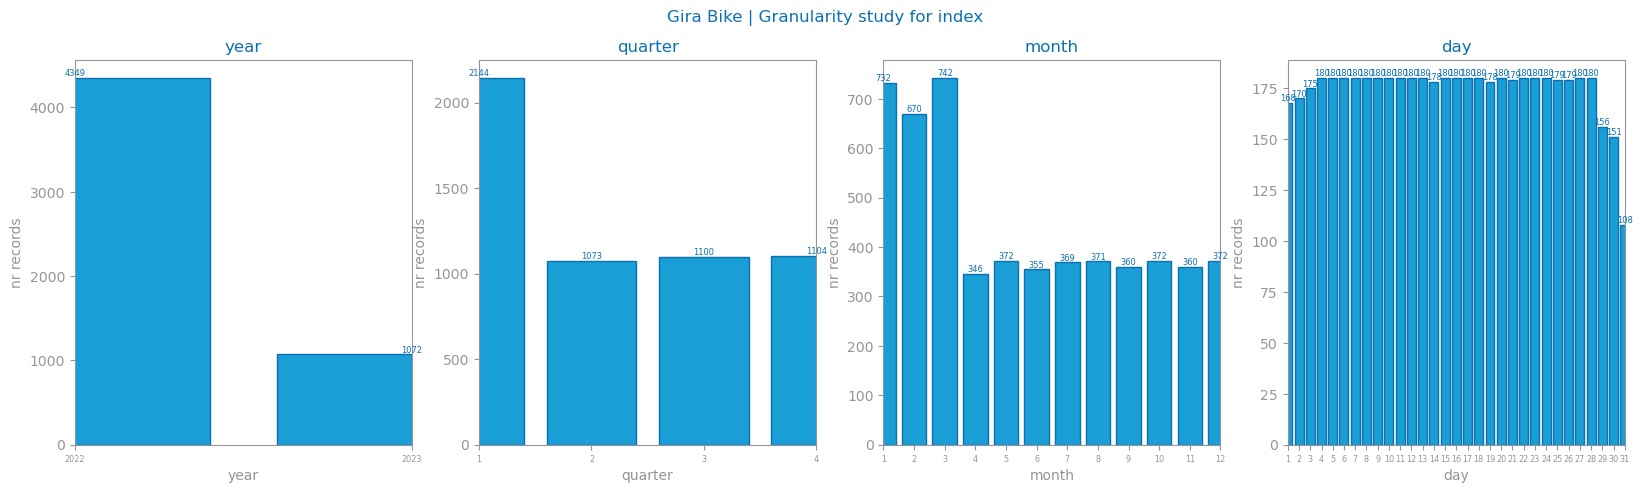

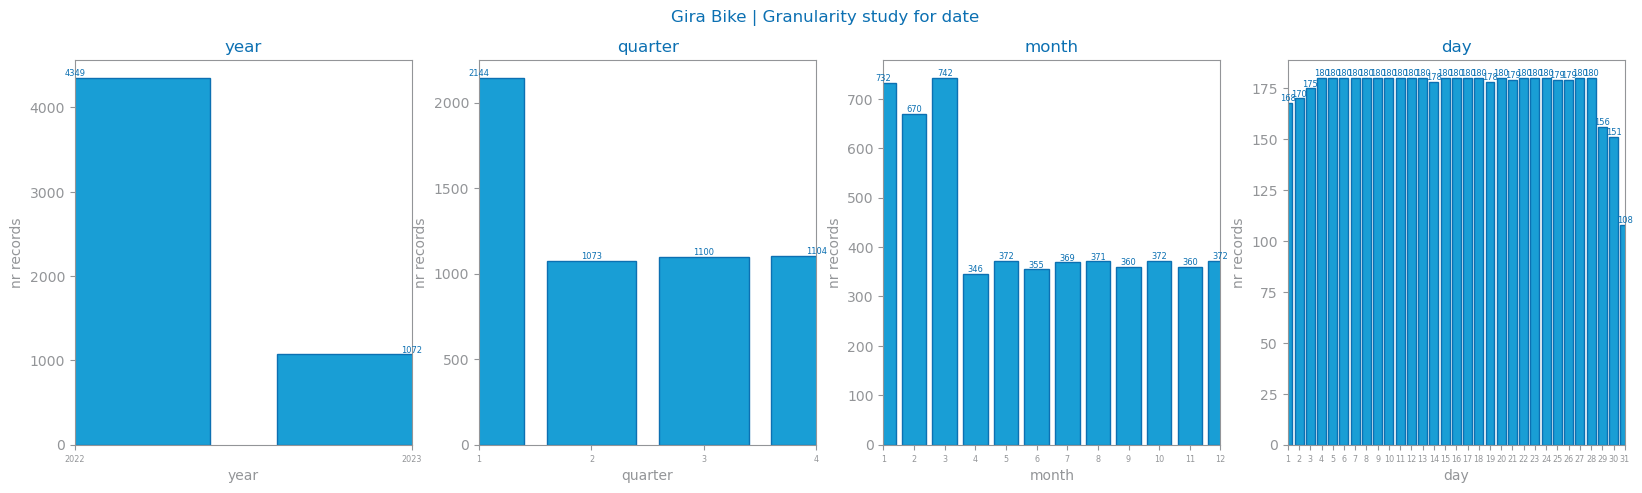

In [57]:
df: DataFrame = df
variables_types: dict[str, list] = get_variable_types(df)

# Now call derive_date_variables after getting the date columns
df_ext: DataFrame = derive_date_variables(df, variables_types["date"])

# Check the columns to ensure everything is correct
print(df_ext.columns)  # Check if 'year', 'quarter', 'month', 'day' exist

for v_date in variables_types["date"]:
    analyse_date_granularity(df_ext, v_date, ["year", "quarter", "month", "day"])
    savefig(f"./{file_tag}_granularity_{v_date}.png")

show() 

#### All time aggregations (Daily, weekly, monthly)

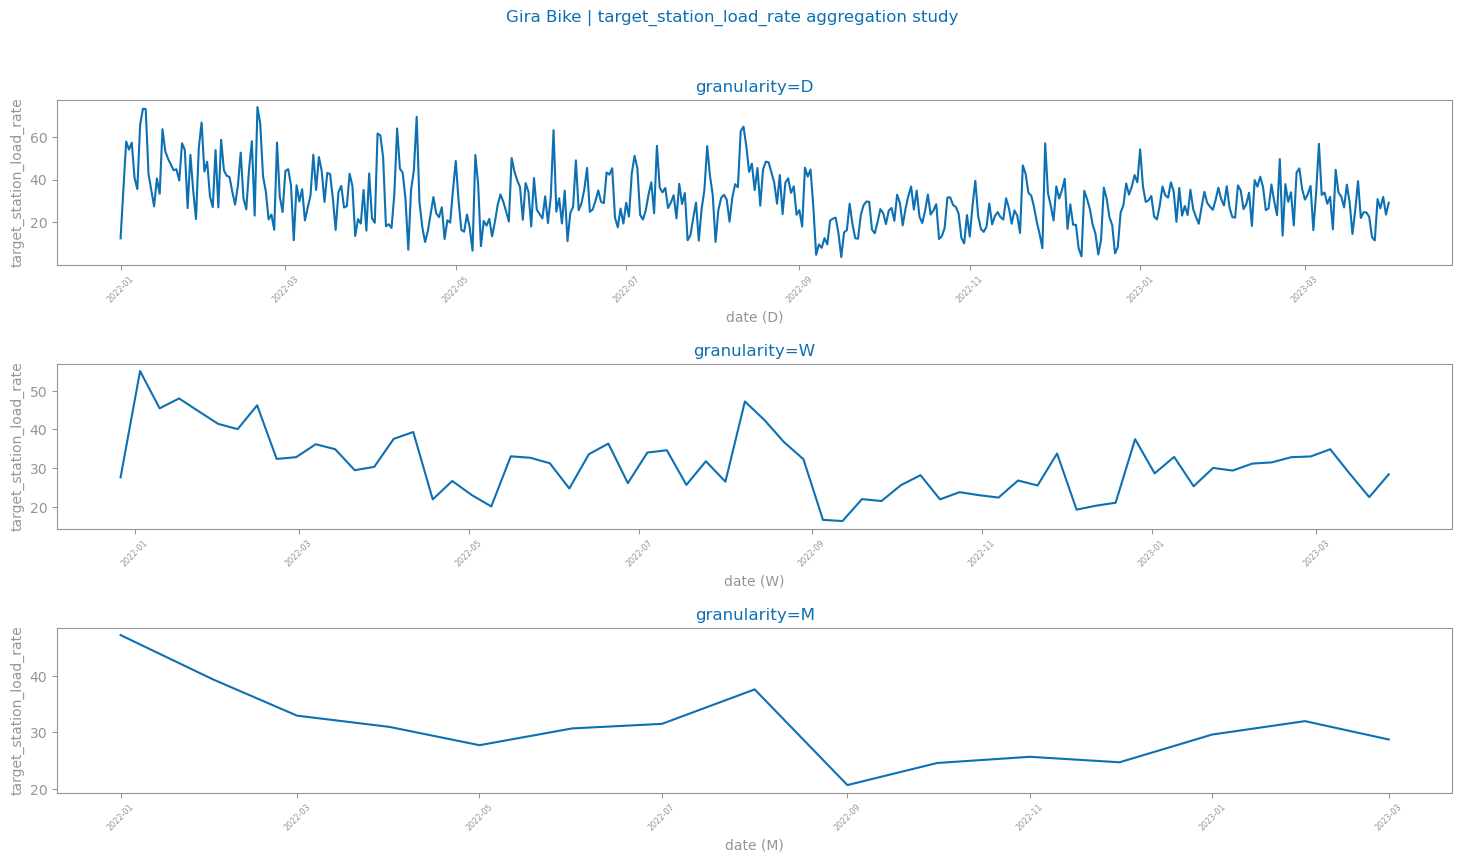

In [58]:
# Defina a altura desejada para a figura
HEIGHT = 6

# Lista de granularidades
grans: list[str] = ["D", "W", "M"]
agg_func: str = "mean",

# Cria os subplots com espaço ajustado entre eles
fig: Figure
axs: list[Axes]
fig, axs = subplots(
    len(grans), 1, 
    figsize=(3 * HEIGHT, HEIGHT / 2 * len(grans)), 
    gridspec_kw={'hspace': 0.6} 
)
fig.suptitle(f"{file_tag} | {target} aggregation study")

# Plota cada subplot
for i in range(len(grans)):
    ss: Series = ts_aggregation_by(series, grans[i])
    plot_line_chart(
        ss.index.to_list(),
        ss.to_list(),
        ax=axs[i],
        xlabel=f"{ss.index.name} ({grans[i]})",
        ylabel=target,
        title=f"granularity={grans[i]}",
    )

# Exibe a figura
show()

#### Analysis for the report

### Distribution

#### Daily - mean

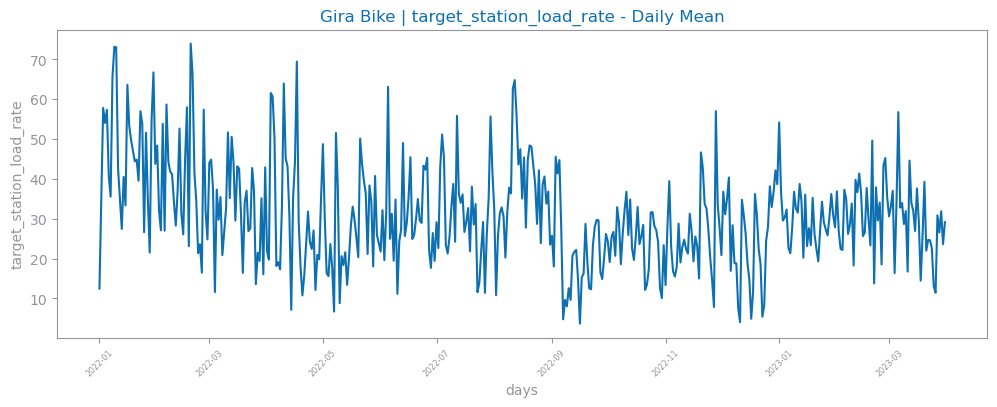

In [59]:
from matplotlib.pyplot import figure, show
from dslabs_functions import HEIGHT, plot_line_chart, ts_aggregation_by

target = "target_station_load_rate"
df_copy = df.copy()
data: DataFrame = df_copy
series: Series = data[target]

ss_days: Series = ts_aggregation_by(series, gran_level="D", agg_func='mean')

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_days.index.to_list(),
    ss_days.to_list(),
    xlabel="days",
    ylabel=target,
    title=f"{file_tag} | {target} - Daily Mean",
)
show()

#### Weekly - mean

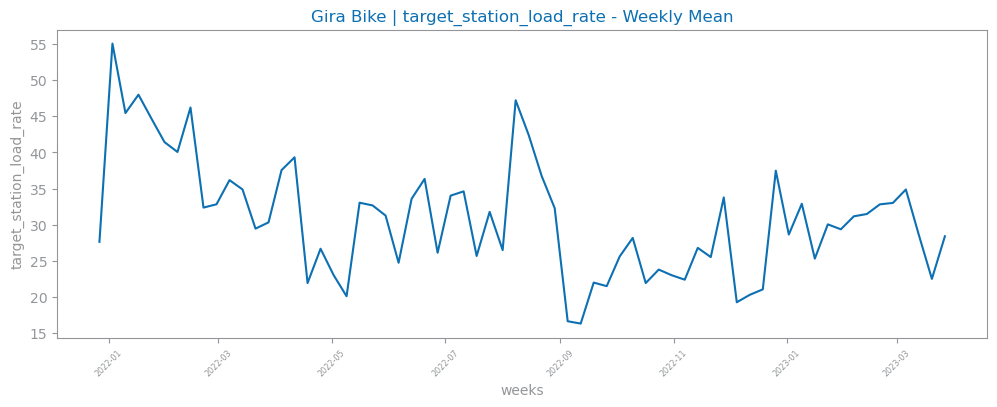

In [60]:
from matplotlib.pyplot import figure, show
from dslabs_functions import HEIGHT, plot_line_chart, ts_aggregation_by

ss_weeks: Series = ts_aggregation_by(series, gran_level="W", agg_func='mean')

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_weeks.index.to_list(),
    ss_weeks.to_list(),
    xlabel="weeks",
    ylabel=target,
    title=f"{file_tag} | {target} - Weekly Mean",
)
show()

#### Montly - mean

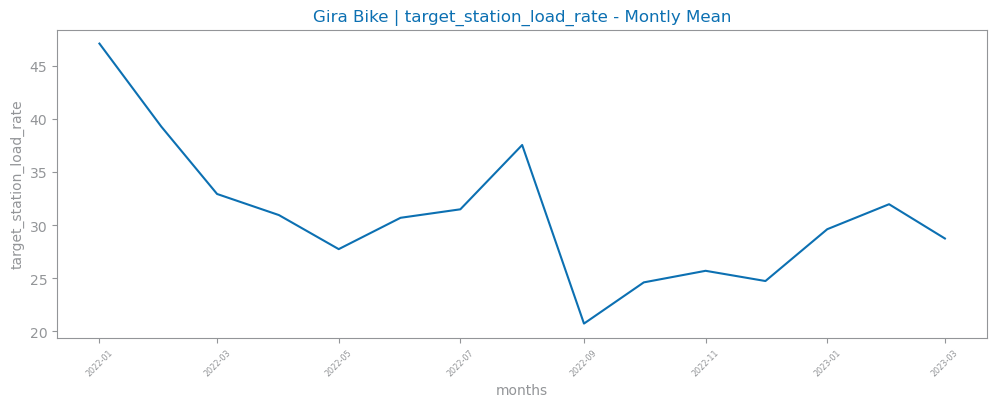

In [61]:
from matplotlib.pyplot import figure, show
from dslabs_functions import HEIGHT, plot_line_chart, ts_aggregation_by

ss_months: Series = ts_aggregation_by(series, gran_level="M", agg_func='mean')

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_months.index.to_list(),
    ss_months.to_list(),
    xlabel="months",
    ylabel=target,
    title=f"{file_tag} | {target} - Montly Mean",
)
show()

- Tabular Data vs. Time Series
    - In standard tabular data, we analyze the distribution of a variable to understand its centrality, trend, and dispersion.
    - In time series, the distribution may change depending on the level of aggregation (daily, weekly, monthly, etc.).
- Choosing the Right Aggregation Function
    - If the variable represents absolute values, like energy consumption (kWh), summing up daily values to get weekly/monthly totals makes sense.
    - However, for percentages, rates, or averages, summing the values directly introduces errors and distorts the results.
- What to Do in This Case?
    - Since station load rate (%) is a percentage, we should use the weighted average or simply the mean when aggregating by week or month.
        - Incorrect: Summing percentages → leads to incorrect results.
        - ***Correct: Taking the average of percentages → preserves the variable's meaning.***

#### Weekly - sum

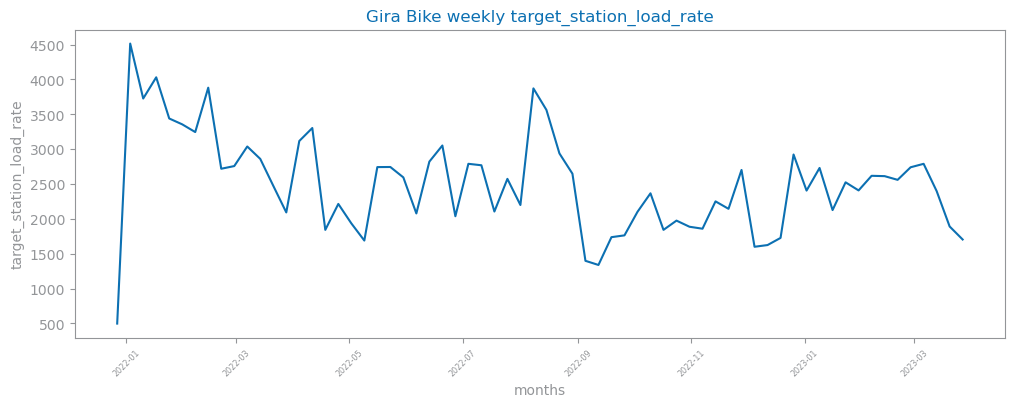

In [ ]:
from matplotlib.pyplot import figure, show
from dslabs_functions import HEIGHT, plot_line_chart, ts_aggregation_by

ss_months: Series = ts_aggregation_by(series, gran_level="W", agg_func='sum')

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_months.index.to_list(),
    ss_months.to_list(),
    xlabel="months",
    ylabel=target,
    title=f"{file_tag} weekly {target}",
)
show()

- Tabular Data vs. Time Series
    - In standard tabular data, we analyze the distribution of a variable to understand its centrality, trend, and dispersion.
    - In time series, the distribution may change depending on the level of aggregation (daily, weekly, monthly, etc.).
- Choosing the Right Aggregation Function
    - If the variable represents absolute values, like energy consumption (kWh), summing up daily values to get weekly/monthly totals makes sense.
    - However, for percentages, rates, or averages, summing the values directly introduces errors and distorts the results.
- What to Do in This Case?
    - Since station load rate (%) is a percentage, we should use the weighted average or simply the mean when aggregating by week or month.
        - Incorrect: Summing percentages → leads to incorrect results.
        - ***Correct: Taking the average of percentages → preserves the variable's meaning.***

#### Distribution summary 5 - All aggregations


In [43]:
display(series.shape[0])
display(ss_hours.shape[0])
display(ss_days.shape[0])
display(ss_weeks.shape[0])
display(ss_months.shape[0])

5421

5343

455

66

15

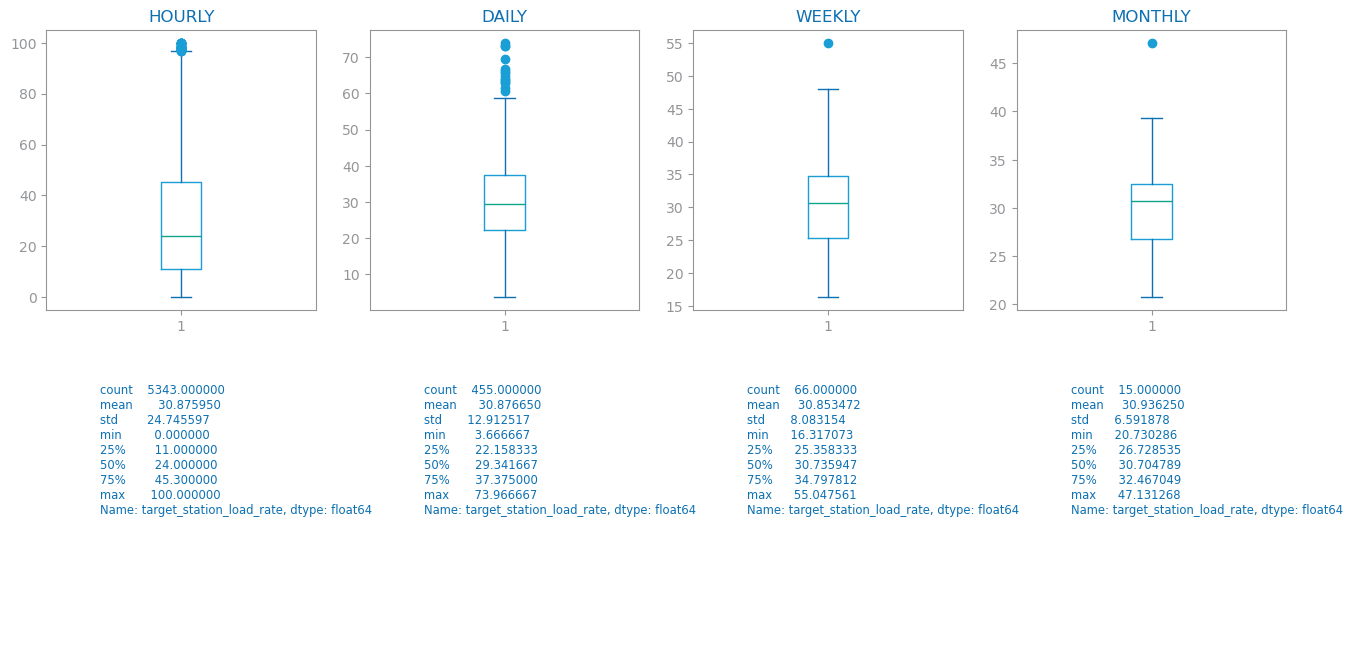

In [62]:
from numpy import array
from matplotlib.pyplot import show, subplots
from matplotlib.figure import Figure
from dslabs_functions import set_chart_labels


df_copy = df.copy()

fig: Figure
axs: array
fig, axs = subplots(2, 4, figsize=(4 * HEIGHT, 2 * HEIGHT))  # Ajuste do tamanho para acomodar 4 colunas

# Boxplots para cada nível de agregação
set_chart_labels(axs[0, 0], title="HOURLY")
axs[0, 0].boxplot(ss_hours)

set_chart_labels(axs[0, 1], title="DAILY")
axs[0, 1].boxplot(ss_days)

set_chart_labels(axs[0, 2], title="WEEKLY")
axs[0, 2].boxplot(ss_weeks)

set_chart_labels(axs[0, 3], title="MONTHLY")
axs[0, 3].boxplot(ss_months)

# Estatísticas descritivas para cada nível de agregação
for i, (df_copy, title) in enumerate(zip(
    [ss_hours, ss_days, ss_weeks, ss_months], 
    ["HOURLY", "DAILY", "WEEKLY", "MONTHLY"]
)):
    axs[1, i].grid(False)
    axs[1, i].set_axis_off()
    
    # Ajuste do 'y' para mover as estatísticas mais para cima
    axs[1, i].text(0.2, 0.7, str(df_copy.describe()), fontsize="small", verticalalignment="center")

show()


Comprimento da série original (target_station_load_rate): 53
Comprimento da série agregada (ss_days): 53


##### Analysis for the report

#### Variables Distribution

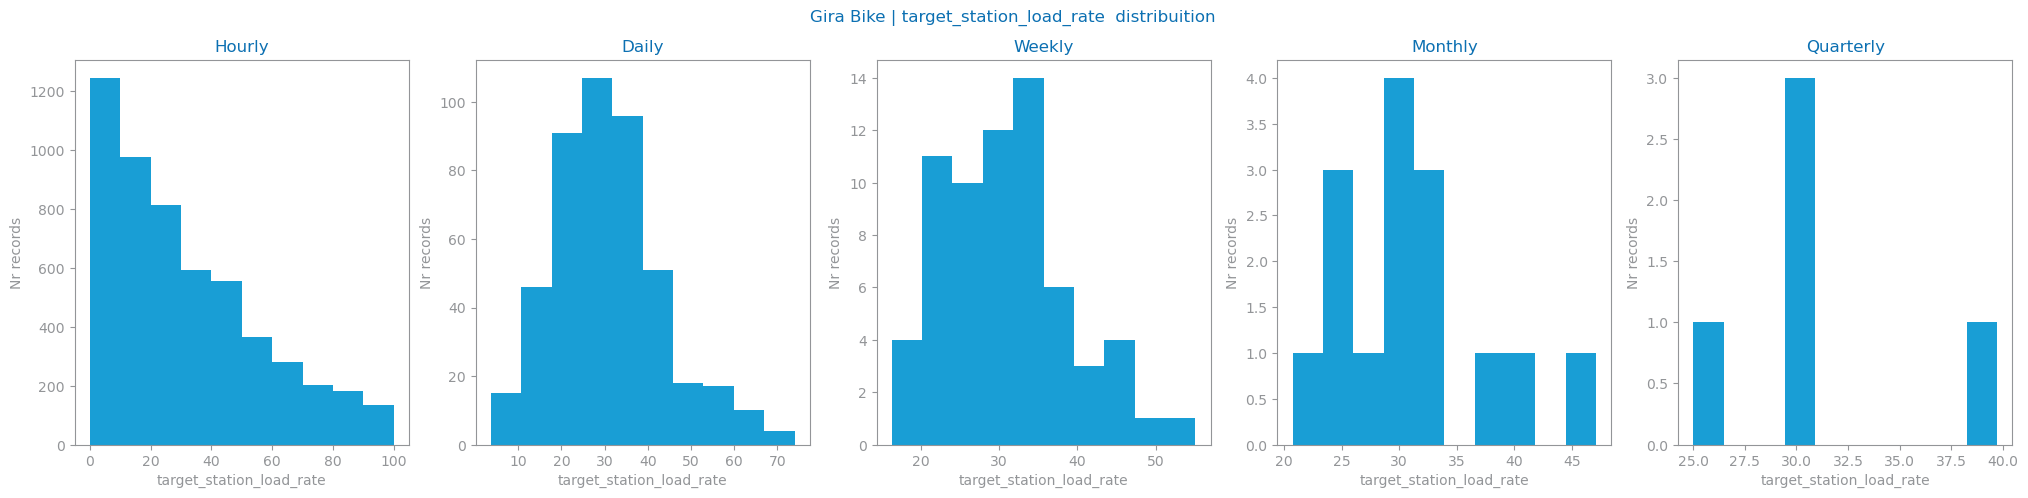

In [63]:

ss_quarters: Series = ts_aggregation_by(series, gran_level="Q", agg_func='mean')

grans: list[Series] = [ss_hours, ss_days, ss_weeks, ss_months, ss_quarters]
gran_names: list[str] = ["Hourly", "Daily", "Weekly", "Monthly", "Quarterly"]
fig: Figure
axs: array
HEIGHT=5
fig, axs = subplots(1, len(grans), figsize=(len(grans) * HEIGHT, HEIGHT))
fig.suptitle(f"{file_tag} | {target}  distribuition")
for i in range(len(grans)):
    set_chart_labels(axs[i], title=f"{gran_names[i]}", xlabel=target, ylabel="Nr records")
    axs[i].hist(grans[i].values)
show()


##### Normality Tests
- For each time aggregation, we will do the following tests to check id the target variable follows a normal distribuition:
    - Histogram with KDE to visualize the distribution.
    - Shapiro-Wilk Test to check for normality.
    - Kolmogorov-Smirnov Test to compare the data distribution to a normal distribution.
    - Anderson-Darling Test for a more robust normality check.
    - Q-Q Plot to visually assess normality.

- ***Shapiro-Wilk Test***
    - Purpose: Tests if a dataset follows a normal distribution.

    - How to Analyze:

    - Null Hypothesis (H₀): The data is normally distributed.
        - p-value: 
         - If the p-value > 0.05, fail to reject H₀ (data may be normal distributed). 
         - If p-value ≤ 0.05, reject H₀ (data is not normal distributed).


- ***Kolmogorov-Smirnov Test***
    - Purpose: Compares the dataset to a normal distribution with the same mean and standard deviation.

    - How to Analyze:
        - Null Hypothesis (H₀): The data follows a normal distribution.
        - p-value: 
            - If the p-value > 0.05, fail to reject H₀ (data may be normal distributed). 
            - If p-value ≤ 0.05, reject H₀ (data is not normal distributed).


- ***Anderson-Darling Test***
    - Purpose: A more robust test for normality, especially for larger datasets.

    - How to Analyze:
        - Compare the test statistic to critical values at different significance levels (e.g., 1%, 5%, 10%).
            - If the test statistic < critical value, the data appears normal at that significance level.
            - If the test statistic > critical value, the data does not appear normal.


- ***Q-Q Plot (Quantile-Quantile Plot)***
    - Purpose: Visual check to see if the data quantiles match a normal distribution.

    - How to Analyze:

        - If the points fall approximately on a straight line, the data is likely normal.
        - Deviations from the line suggest non-normality.

###### Hourly 

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

# Hourly Data
hourly_data = series_dict['Hourly']
hourly_data = hourly_data[~pd.isna(hourly_data)]  # Remove NaN values

# Plot histogram with KDE
plt.figure(figsize=(12, 6))
sns.histplot(hourly_data, kde=True)
plt.title("Distribution of target_station_load_rate (Hourly)")
plt.xlabel("Load Rate")
plt.ylabel("Frequency")
plt.show()


# Q-Q plot to check normality
plt.figure(figsize=(12, 6))
stats.probplot(hourly_data, dist="norm", plot=plt)
plt.title("Q-Q Plot for Hourly")
plt.show()


# Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(hourly_data)
print("=== Shapiro-Wilk Test (Hourly) ===")
print(f"Test Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")
if shapiro_test.pvalue > 0.05:
    print("Result: The data appears to be normally distributed (fail to reject H₀).")
else:
    print("Result: The data does NOT appear to be normally distributed (reject H₀).")

# Kolmogorov-Smirnov test for normality
ks_test = stats.kstest(hourly_data, 'norm', args=(hourly_data.mean(), hourly_data.std()))
print("\n=== Kolmogorov-Smirnov Test (Hourly) ===")
print(f"Test Statistic: {ks_test.statistic}, p-value: {ks_test.pvalue}")
if ks_test.pvalue > 0.05:
    print("Result: The data appears to be normally distributed (fail to reject H₀).")
else:
    print("Result: The data does NOT appear to be normally distributed (reject H₀).")

# Anderson-Darling test for normality
anderson_test = stats.anderson(hourly_data, dist='norm')
print("\n=== Anderson-Darling Test (Hourly) ===")
print(f"Test Statistic: {anderson_test.statistic}")
for i in range(len(anderson_test.critical_values)):
    sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
    if anderson_test.statistic < cv:
        print(f" - At the {sl}% significance level: The data appears to be normally distributed.")
    else:
        print(f" - At the {sl}% significance level: The data does NOT appear to be normally distributed.")


NameError: name 'series_dict' is not defined

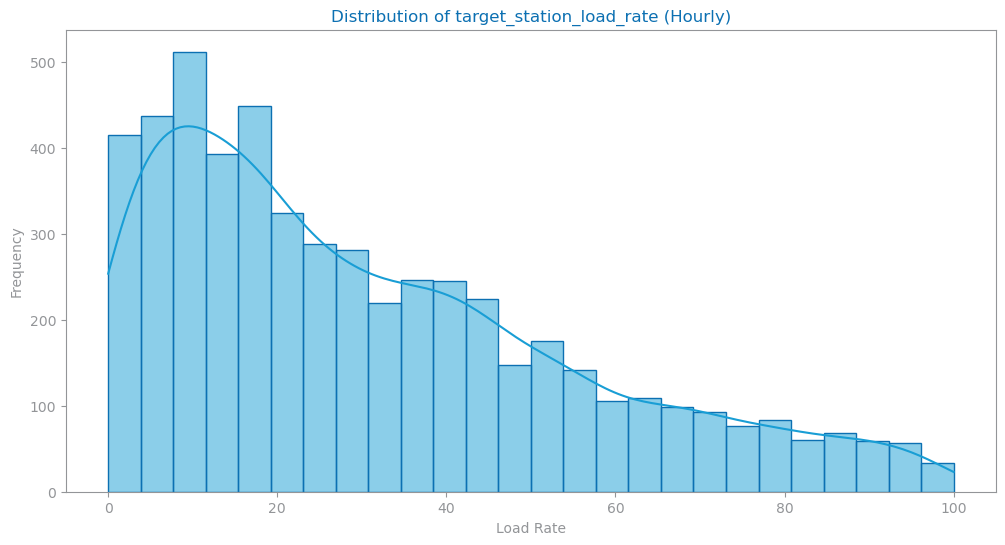

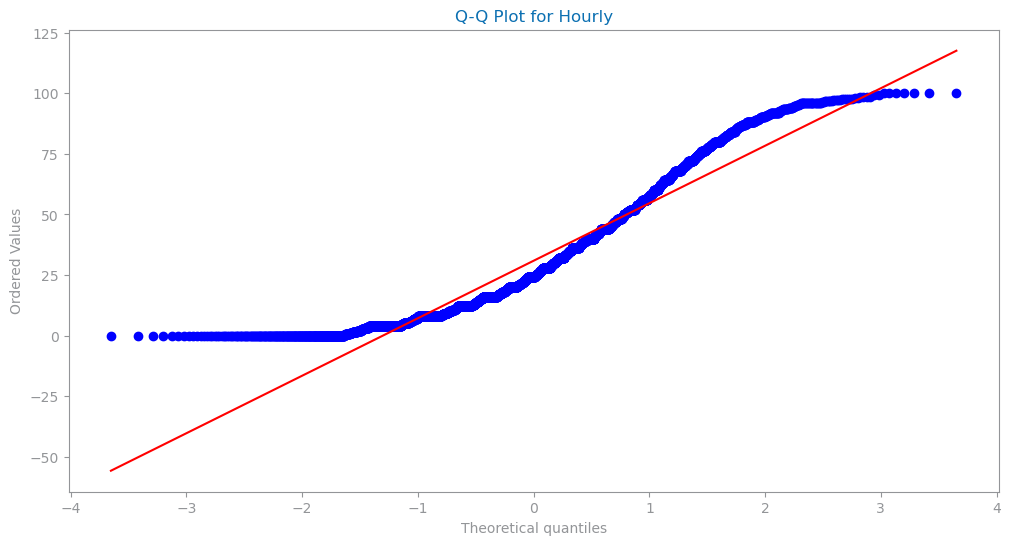

=== Shapiro-Wilk Test (Hourly) ===
Test Statistic: 0.9182529193033189, p-value: 5.017288137853234e-47
Result: The data does NOT appear to be normally distributed (reject H₀).

=== Kolmogorov-Smirnov Test (Hourly) ===
Test Statistic: 0.11398667392302297, p-value: 6.258086493602701e-61
Result: The data does NOT appear to be normally distributed (reject H₀).

=== Anderson-Darling Test (Hourly) ===
Test Statistic: 127.31380166591225
 - At the 15.0% significance level: The data does NOT appear to be normally distributed.
 - At the 10.0% significance level: The data does NOT appear to be normally distributed.
 - At the 5.0% significance level: The data does NOT appear to be normally distributed.
 - At the 2.5% significance level: The data does NOT appear to be normally distributed.
 - At the 1.0% significance level: The data does NOT appear to be normally distributed.


In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

# Considerando que a série que você já tem é 'ss_hours'
ss_hours = ss_hours.dropna()  # Garantir que não temos valores ausentes

# Plot histogram with KDE
plt.figure(figsize=(12, 6))
sns.histplot(ss_hours, kde=True)
plt.title("Distribution of target_station_load_rate (Hourly)")
plt.xlabel("Load Rate")
plt.ylabel("Frequency")
plt.show()

# Q-Q plot to check normality
plt.figure(figsize=(12, 6))
stats.probplot(ss_hours, dist="norm", plot=plt)
plt.title("Q-Q Plot for Hourly")
plt.show()

# Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(ss_hours)
print("=== Shapiro-Wilk Test (Hourly) ===")
print(f"Test Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")
if shapiro_test.pvalue > 0.05:
    print("Result: The data appears to be normally distributed (fail to reject H₀).")
else:
    print("Result: The data does NOT appear to be normally distributed (reject H₀).")

# Kolmogorov-Smirnov test for normality
ks_test = stats.kstest(ss_hours, 'norm', args=(ss_hours.mean(), ss_hours.std()))
print("\n=== Kolmogorov-Smirnov Test (Hourly) ===")
print(f"Test Statistic: {ks_test.statistic}, p-value: {ks_test.pvalue}")
if ks_test.pvalue > 0.05:
    print("Result: The data appears to be normally distributed (fail to reject H₀).")
else:
    print("Result: The data does NOT appear to be normally distributed (reject H₀).")

# Anderson-Darling test for normality
anderson_test = stats.anderson(ss_hours, dist='norm')
print("\n=== Anderson-Darling Test (Hourly) ===")
print(f"Test Statistic: {anderson_test.statistic}")
for i in range(len(anderson_test.critical_values)):
    sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
    if anderson_test.statistic < cv:
        print(f" - At the {sl}% significance level: The data appears to be normally distributed.")
    else:
        print(f" - At the {sl}% significance level: The data does NOT appear to be normally distributed.")


- ***Analysis fo the Histogram and Q-Q Plot:***

- ***Histogram:***
    - The histogram shows the distribution of the hourly target_station_load_rate.
    - The data does not appear to follow a symmetric, bell-shaped curve, which is typical of a normal distribution.    
    - Instead, the distribution seems skewed or irregular, suggesting non-normality.

- ***Q-Q Plot:***
    - The Q-Q plot compares the data quantiles to those of a normal distribution.
    - The points deviate from the straight line, especially at the tails, which further confirms that the data does not follow a normal distribution.

- ***Conclusion:***
    - Based on the visual analysis of the histogram and Q-Q plot, the hourly target_station_load_rate data does not appear to be normally distributed.
    - This indicates that the data may have skewness or heavy tails, which is common in real-world datasets.

###### Daily 

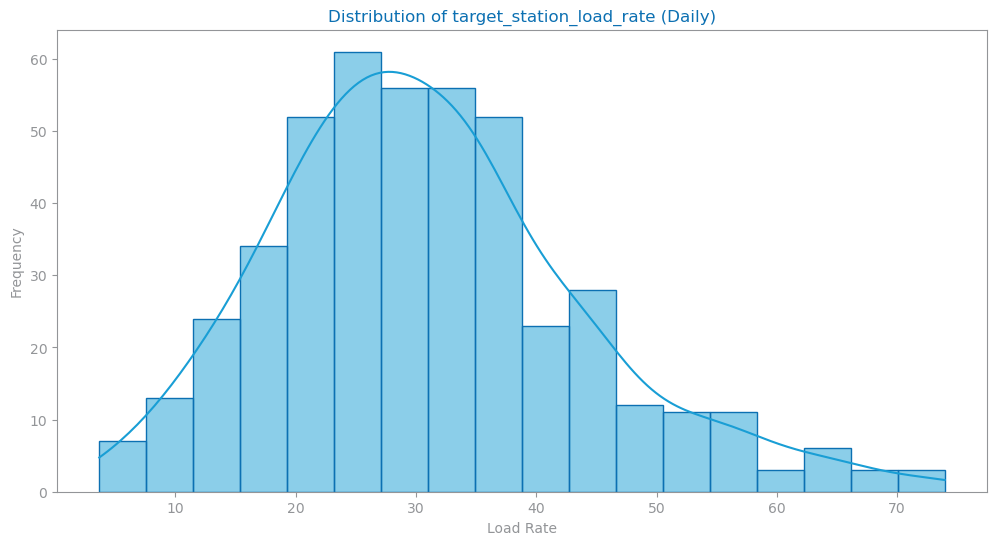

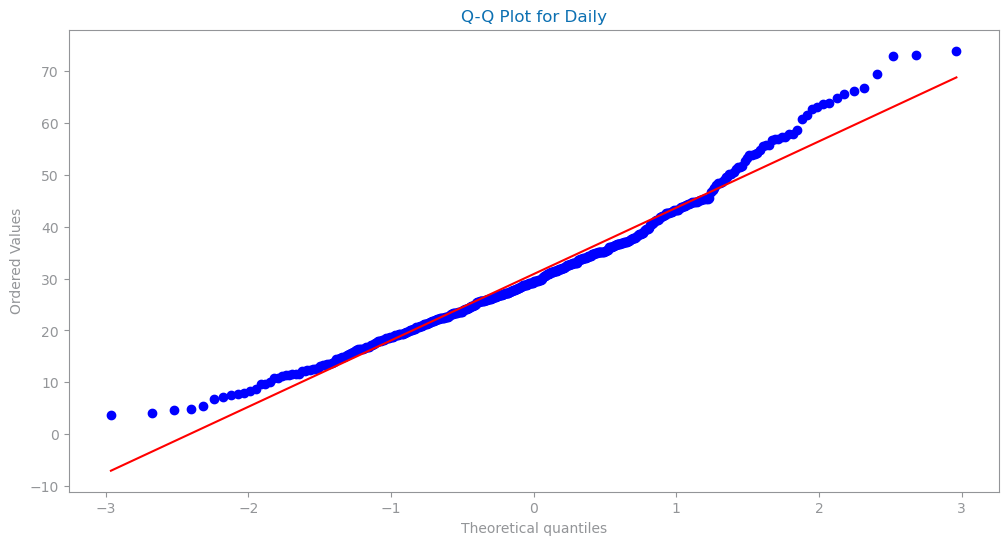

=== Shapiro-Wilk Test (Daily) ===
Test Statistic: 0.9737695564564747, p-value: 2.738638360287075e-07
Result: The data does NOT appear to be normally distributed (reject H₀).

=== Kolmogorov-Smirnov Test (Daily) ===
Test Statistic: 0.06074509034610598, p-value: 0.0667763478379525
Result: The data appears to be normally distributed (fail to reject H₀).

=== Anderson-Darling Test (Daily) ===
Test Statistic: 2.783754550575793
 - At the 15.0% significance level: The data does NOT appear to be normally distributed.
 - At the 10.0% significance level: The data does NOT appear to be normally distributed.
 - At the 5.0% significance level: The data does NOT appear to be normally distributed.
 - At the 2.5% significance level: The data does NOT appear to be normally distributed.
 - At the 1.0% significance level: The data does NOT appear to be normally distributed.


In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

# Considerando que a série diária que você tem é 'ss_days'
ss_days = ss_days.dropna()  # Garantir que não temos valores ausentes

# Plot histogram with KDE para dados diários
plt.figure(figsize=(12, 6))
sns.histplot(ss_days, kde=True)
plt.title("Distribution of target_station_load_rate (Daily)")
plt.xlabel("Load Rate")
plt.ylabel("Frequency")
plt.show()

# Q-Q plot para verificar a normalidade
plt.figure(figsize=(12, 6))
stats.probplot(ss_days, dist="norm", plot=plt)
plt.title("Q-Q Plot for Daily")
plt.show()

# Shapiro-Wilk test para normalidade
shapiro_test = stats.shapiro(ss_days)
print("=== Shapiro-Wilk Test (Daily) ===")
print(f"Test Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")
if shapiro_test.pvalue > 0.05:
    print("Result: The data appears to be normally distributed (fail to reject H₀).")
else:
    print("Result: The data does NOT appear to be normally distributed (reject H₀).")

# Kolmogorov-Smirnov test para normalidade
ks_test = stats.kstest(ss_days, 'norm', args=(ss_days.mean(), ss_days.std()))
print("\n=== Kolmogorov-Smirnov Test (Daily) ===")
print(f"Test Statistic: {ks_test.statistic}, p-value: {ks_test.pvalue}")
if ks_test.pvalue > 0.05:
    print("Result: The data appears to be normally distributed (fail to reject H₀).")
else:
    print("Result: The data does NOT appear to be normally distributed (reject H₀).")

# Anderson-Darling test para normalidade
anderson_test = stats.anderson(ss_days, dist='norm')
print("\n=== Anderson-Darling Test (Daily) ===")
print(f"Test Statistic: {anderson_test.statistic}")
for i in range(len(anderson_test.critical_values)):
    sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
    if anderson_test.statistic < cv:
        print(f" - At the {sl}% significance level: The data appears to be normally distributed.")
    else:
        print(f" - At the {sl}% significance level: The data does NOT appear to be normally distributed.")


###### Weekly 

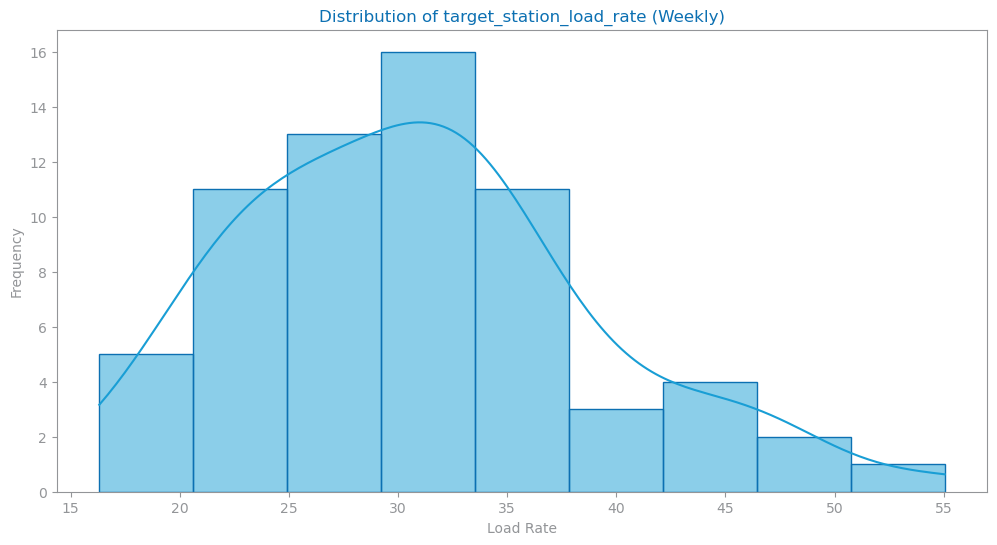

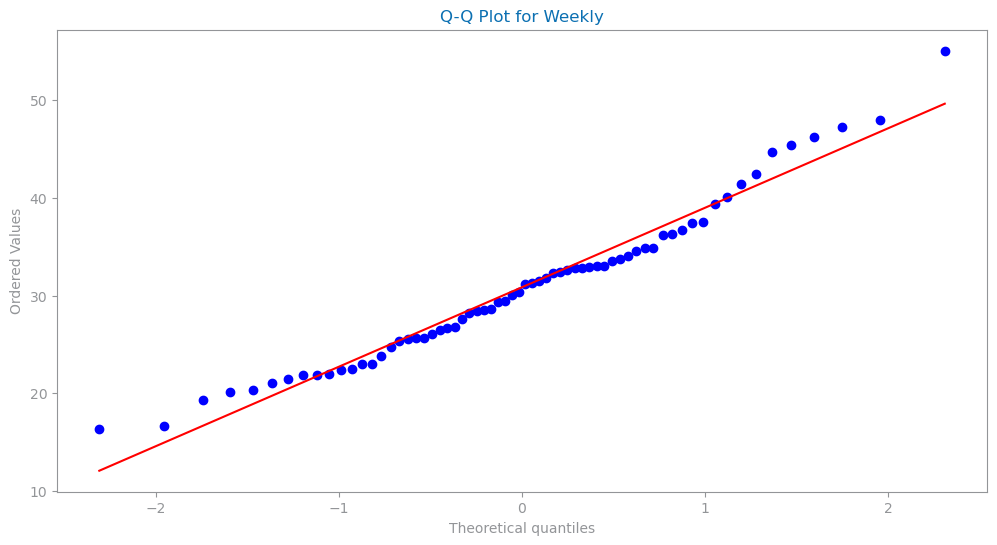

=== Shapiro-Wilk Test (Weekly) ===
Test Statistic: 0.9688526091038048, p-value: 0.09554495949629142
Result: The data appears to be normally distributed (fail to reject H₀).

=== Kolmogorov-Smirnov Test (Weekly) ===
Test Statistic: 0.08227156538935276, p-value: 0.7317484256072915
Result: The data appears to be normally distributed (fail to reject H₀).

=== Anderson-Darling Test (Weekly) ===
Test Statistic: 0.538157180515654
 - At the 15.0% significance level: The data appears to be normally distributed.
 - At the 10.0% significance level: The data appears to be normally distributed.
 - At the 5.0% significance level: The data appears to be normally distributed.
 - At the 2.5% significance level: The data appears to be normally distributed.
 - At the 1.0% significance level: The data appears to be normally distributed.


In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

# Considerando que a série semanal que você tem é 'ss_weeks'
ss_weeks = ss_weeks.dropna()  # Garantir que não temos valores ausentes

# Plot histogram with KDE para dados semanais
plt.figure(figsize=(12, 6))
sns.histplot(ss_weeks, kde=True)
plt.title("Distribution of target_station_load_rate (Weekly)")
plt.xlabel("Load Rate")
plt.ylabel("Frequency")
plt.show()

# Q-Q plot para verificar a normalidade
plt.figure(figsize=(12, 6))
stats.probplot(ss_weeks, dist="norm", plot=plt)
plt.title("Q-Q Plot for Weekly")
plt.show()

# Shapiro-Wilk test para normalidade
shapiro_test = stats.shapiro(ss_weeks)
print("=== Shapiro-Wilk Test (Weekly) ===")
print(f"Test Statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")
if shapiro_test.pvalue > 0.05:
    print("Result: The data appears to be normally distributed (fail to reject H₀).")
else:
    print("Result: The data does NOT appear to be normally distributed (reject H₀).")

# Kolmogorov-Smirnov test para normalidade
ks_test = stats.kstest(ss_weeks, 'norm', args=(ss_weeks.mean(), ss_weeks.std()))
print("\n=== Kolmogorov-Smirnov Test (Weekly) ===")
print(f"Test Statistic: {ks_test.statistic}, p-value: {ks_test.pvalue}")
if ks_test.pvalue > 0.05:
    print("Result: The data appears to be normally distributed (fail to reject H₀).")
else:
    print("Result: The data does NOT appear to be normally distributed (reject H₀).")

# Anderson-Darling test para normalidade
anderson_test = stats.anderson(ss_weeks, dist='norm')
print("\n=== Anderson-Darling Test (Weekly) ===")
print(f"Test Statistic: {anderson_test.statistic}")
for i in range(len(anderson_test.critical_values)):
    sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
    if anderson_test.statistic < cv:
        print(f" - At the {sl}% significance level: The data appears to be normally distributed.")
    else:
        print(f" - At the {sl}% significance level: The data does NOT appear to be normally distributed.")


- ***Analysis fo the Histogram and Q-Q Plot:***
- All three statistical tests (Shapiro-Wilk, Kolmogorov-Smirnov, and Anderson-Darling) agree that the weekly data appears to be normally distributed.

- This is a strong indication that the weekly target_station_load_rate follows a normal distribution.

##### Analysis for the report

- Why Normality Changed: The Role of Temporal Aggregation

    - Hourly:
        - Data at smaller intervals (hourly) is more susceptible to rapid fluctuations, outliers, and skewness, resulting in a non-normal distribution.
        - For example, sudden spikes in load rates during peak hours or random events can create asymmetry or heavy tails, making the distribution non-normal.

    - Daily:
        - Daily data is less volatile than hourly data but still affected by daily variations and occasional outliers.
        - While the distribution may be closer to normal than hourly data, it often remains non-normal due to residual fluctuations and skewness.

    - Weekly:
        - When data is aggregated over larger intervals (weekly), daily and hourly fluctuations are smoothed out.
        - This reduces the impact of outliers and extreme variations, resulting in a distribution that is closer to normal.
        - The Central Limit Theorem also plays a role here, as aggregating data over time tends to make the distribution more normal, even if the underlying hourly or daily data is not.

    - Summary:
        - Interval	Normality	Reason
        - Hourly	Not normal	Rapid fluctuations, outliers, and skewness due to short-term variability.
        - Daily	Not normal	Less fluctuation than hourly, but still affected by daily variations.
        - Weekly	Normal	Aggregation smooths fluctuations, reduces noise, and minimizes outliers.

### Autocorrelation

In [573]:
series.head()

date
2022-01-01 12:00:00    36.0
2022-01-01 13:00:00    32.0
2022-01-01 14:00:00     NaN
2022-01-01 15:00:00    20.0
2022-01-01 16:00:00    18.0
Name: target_station_load_rate, dtype: float64

###### ss_hours

<Axes: xlabel='date', ylabel='target_station_load_rate'>

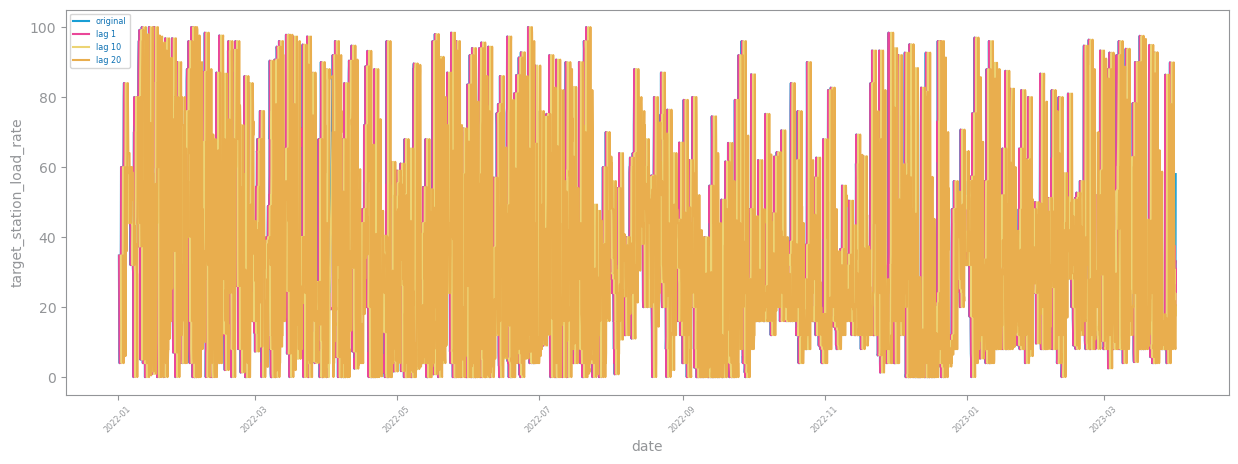

In [69]:
from dslabs_functions import plot_multiline_chart

index='date'
series=ss_hours
def get_lagged_series(series: Series, max_lag: int, delta: int = 1):
    lagged_series: dict = {"original": series, "lag 1": series.shift(1)}
    for i in range(delta, max_lag + 1, delta):
        lagged_series[f"lag {i}"] = series.shift(i)
    return lagged_series


figure(figsize=(3 * HEIGHT, HEIGHT))
lags = get_lagged_series(series, 20, 10)
plot_multiline_chart(series.index.to_list(), lags, xlabel=index, ylabel=target)

###### ss_days

<Axes: xlabel='date', ylabel='target_station_load_rate'>

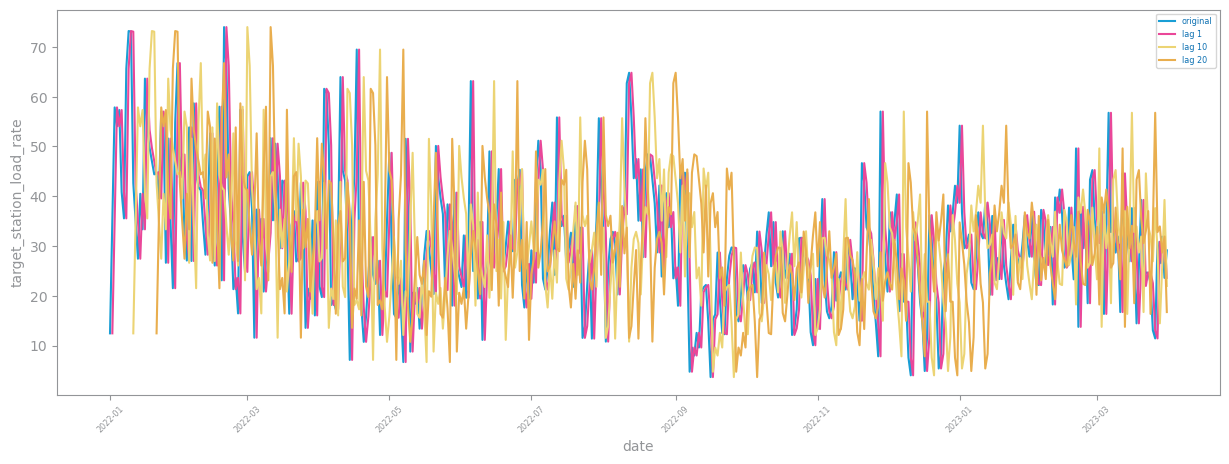

In [70]:
from dslabs_functions import plot_multiline_chart


series=ss_days
def get_lagged_series(series: Series, max_lag: int, delta: int = 1):
    lagged_series: dict = {"original": series, "lag 1": series.shift(1)}
    for i in range(delta, max_lag + 1, delta):
        lagged_series[f"lag {i}"] = series.shift(i)
    return lagged_series


figure(figsize=(3 * HEIGHT, HEIGHT))
lags = get_lagged_series(series, 20, 10)
plot_multiline_chart(series.index.to_list(), lags, xlabel=index, ylabel=target)

###### ss_weeks

<Axes: xlabel='date', ylabel='target_station_load_rate'>

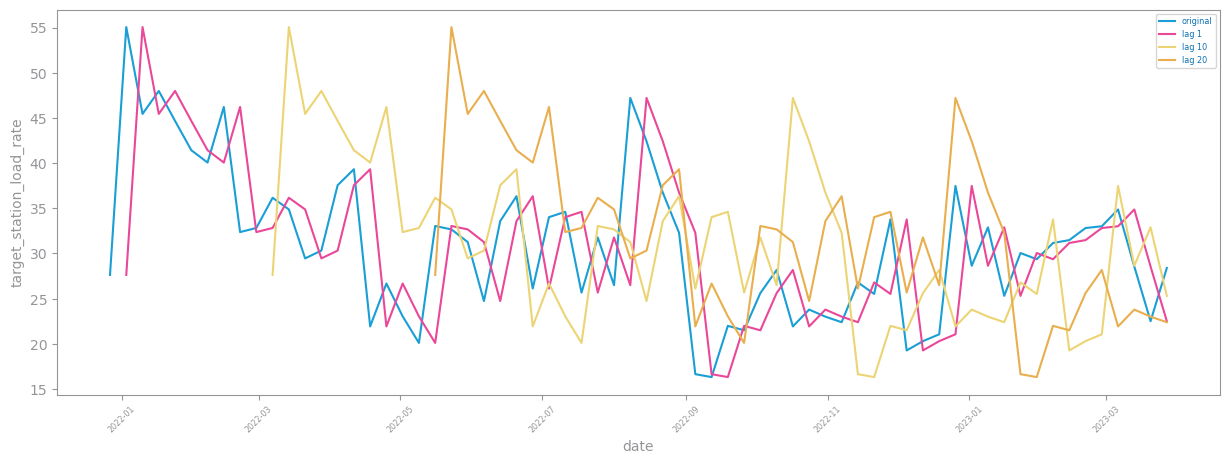

In [71]:
from dslabs_functions import plot_multiline_chart

series=ss_weeks

def get_lagged_series(series: Series, max_lag: int, delta: int = 1):
    lagged_series: dict = {"original": series, "lag 1": series.shift(1)}
    for i in range(delta, max_lag + 1, delta):
        lagged_series[f"lag {i}"] = series.shift(i)
    return lagged_series


figure(figsize=(3 * HEIGHT, HEIGHT))
lags = get_lagged_series(series, 20, 10)
plot_multiline_chart(series.index.to_list(), lags, xlabel=index, ylabel=target)

###### ss_months

<Axes: xlabel='date', ylabel='target_station_load_rate'>

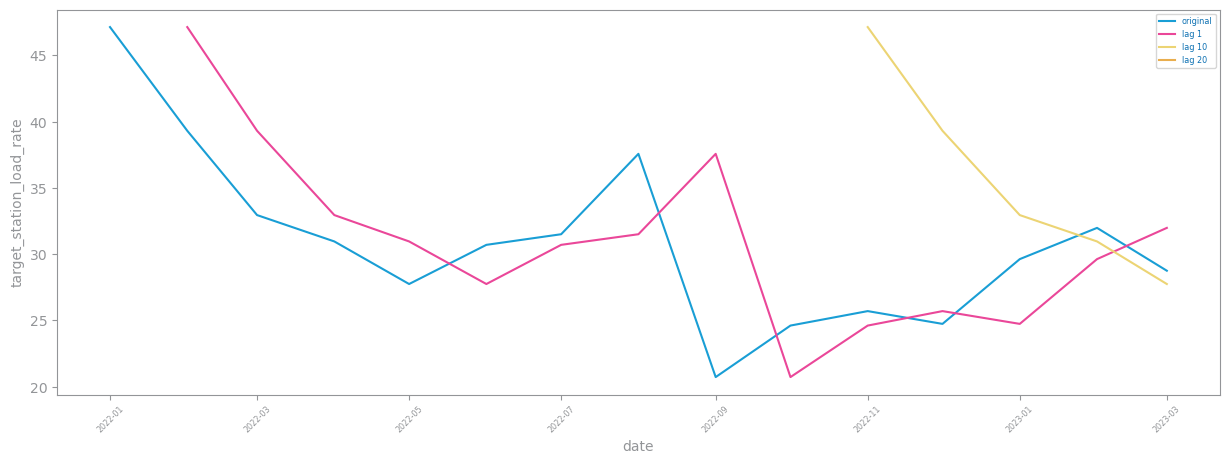

In [72]:
from dslabs_functions import plot_multiline_chart

series=ss_months

def get_lagged_series(series: Series, max_lag: int, delta: int = 1):
    lagged_series: dict = {"original": series, "lag 1": series.shift(1)}
    for i in range(delta, max_lag + 1, delta):
        lagged_series[f"lag {i}"] = series.shift(i)
    return lagged_series


figure(figsize=(3 * HEIGHT, HEIGHT))
lags = get_lagged_series(series, 20, 10)
plot_multiline_chart(series.index.to_list(), lags, xlabel=index, ylabel=target)

#### Autocorrelation study

##### Hourly mean - Orginal Series

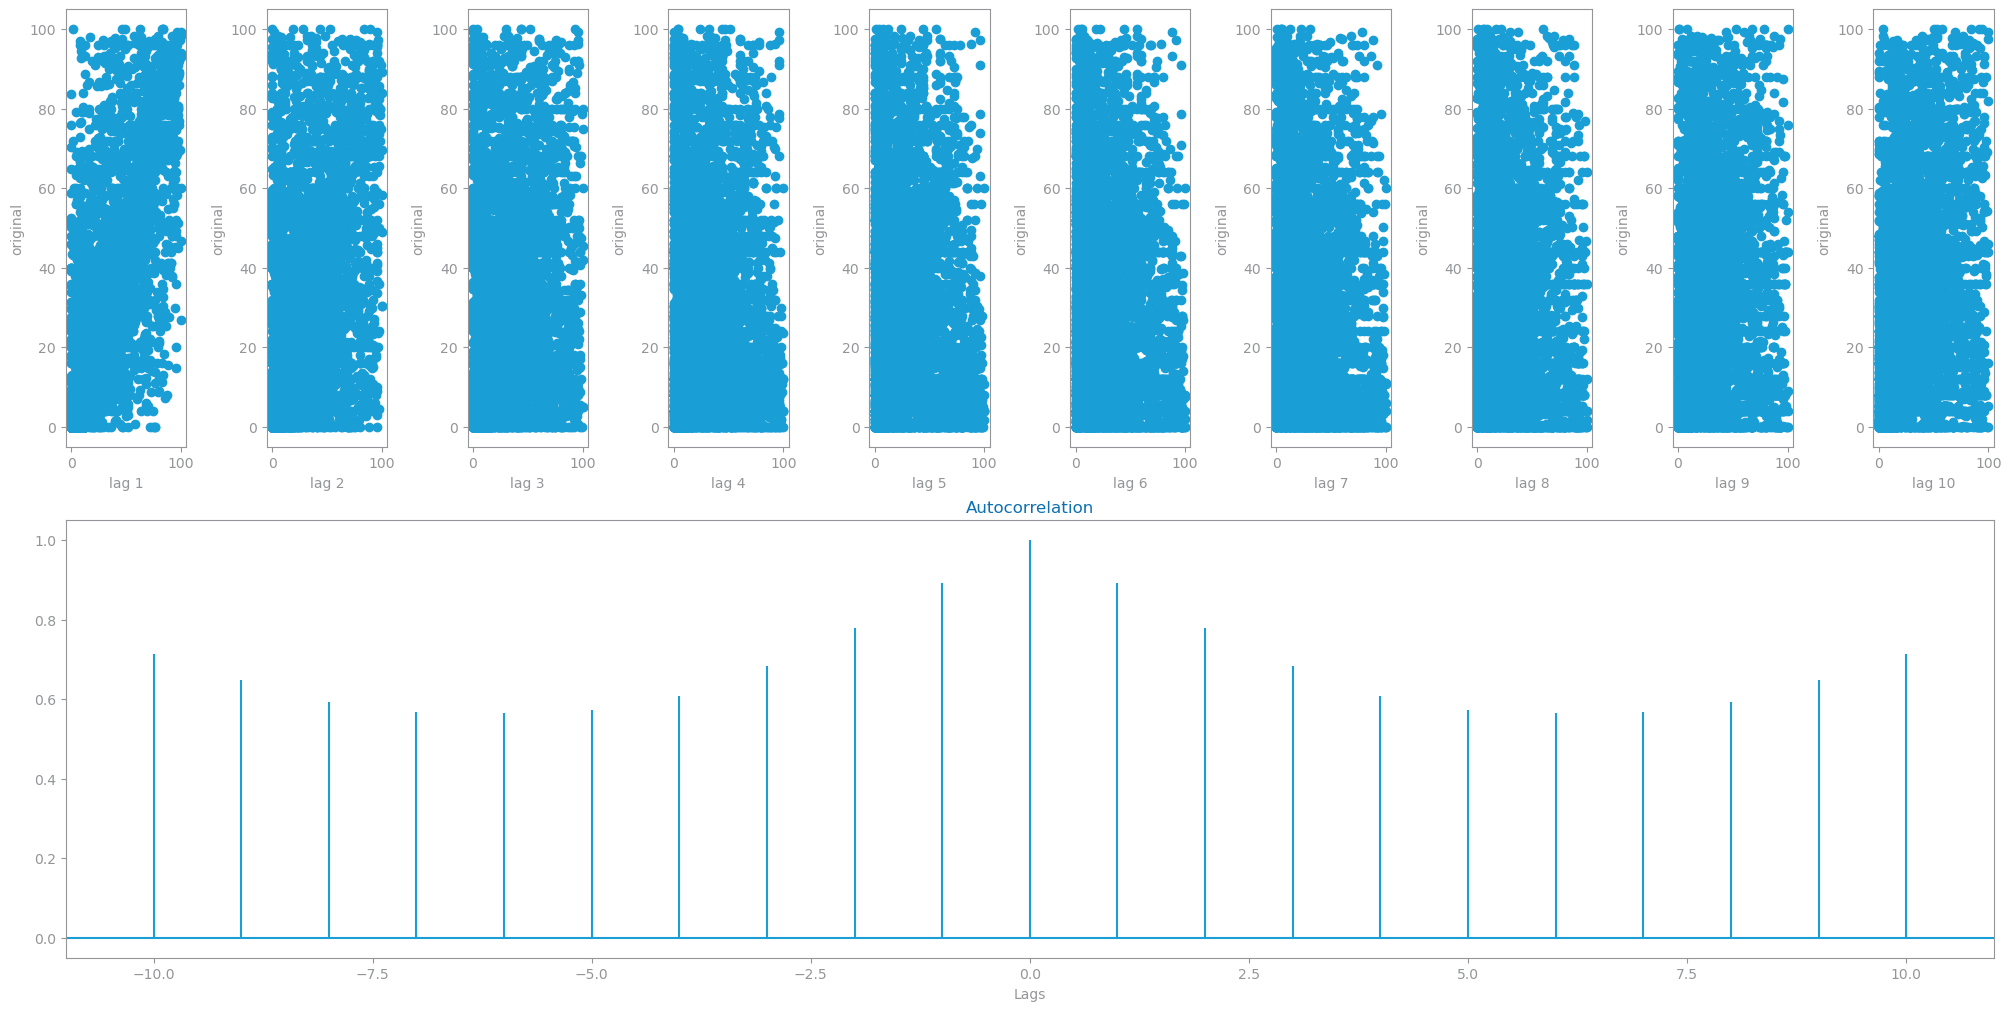

In [73]:
from matplotlib.pyplot import setp
from matplotlib.gridspec import GridSpec

series = ss_hours

def autocorrelation_study(ss_hours: Series, max_lag: int, delta: int = 1):
    k: int = int(max_lag / delta)
    fig = figure(figsize=(4 * HEIGHT, 2 * HEIGHT), constrained_layout=True)
    gs = GridSpec(2, k, figure=fig)

    series_values: list = series.tolist()
    for i in range(1, k + 1):
        ax = fig.add_subplot(gs[0, i - 1])
        lag = i * delta
        ax.scatter(series.shift(lag).tolist(), series_values)
        ax.set_xlabel(f"lag {lag}")
        ax.set_ylabel("original")
    ax = fig.add_subplot(gs[1, :])
    ax.acorr(series, maxlags=max_lag)
    ax.set_title("Autocorrelation")
    ax.set_xlabel("Lags")
    return


autocorrelation_study(series, 10, 1)

##### Daily mean

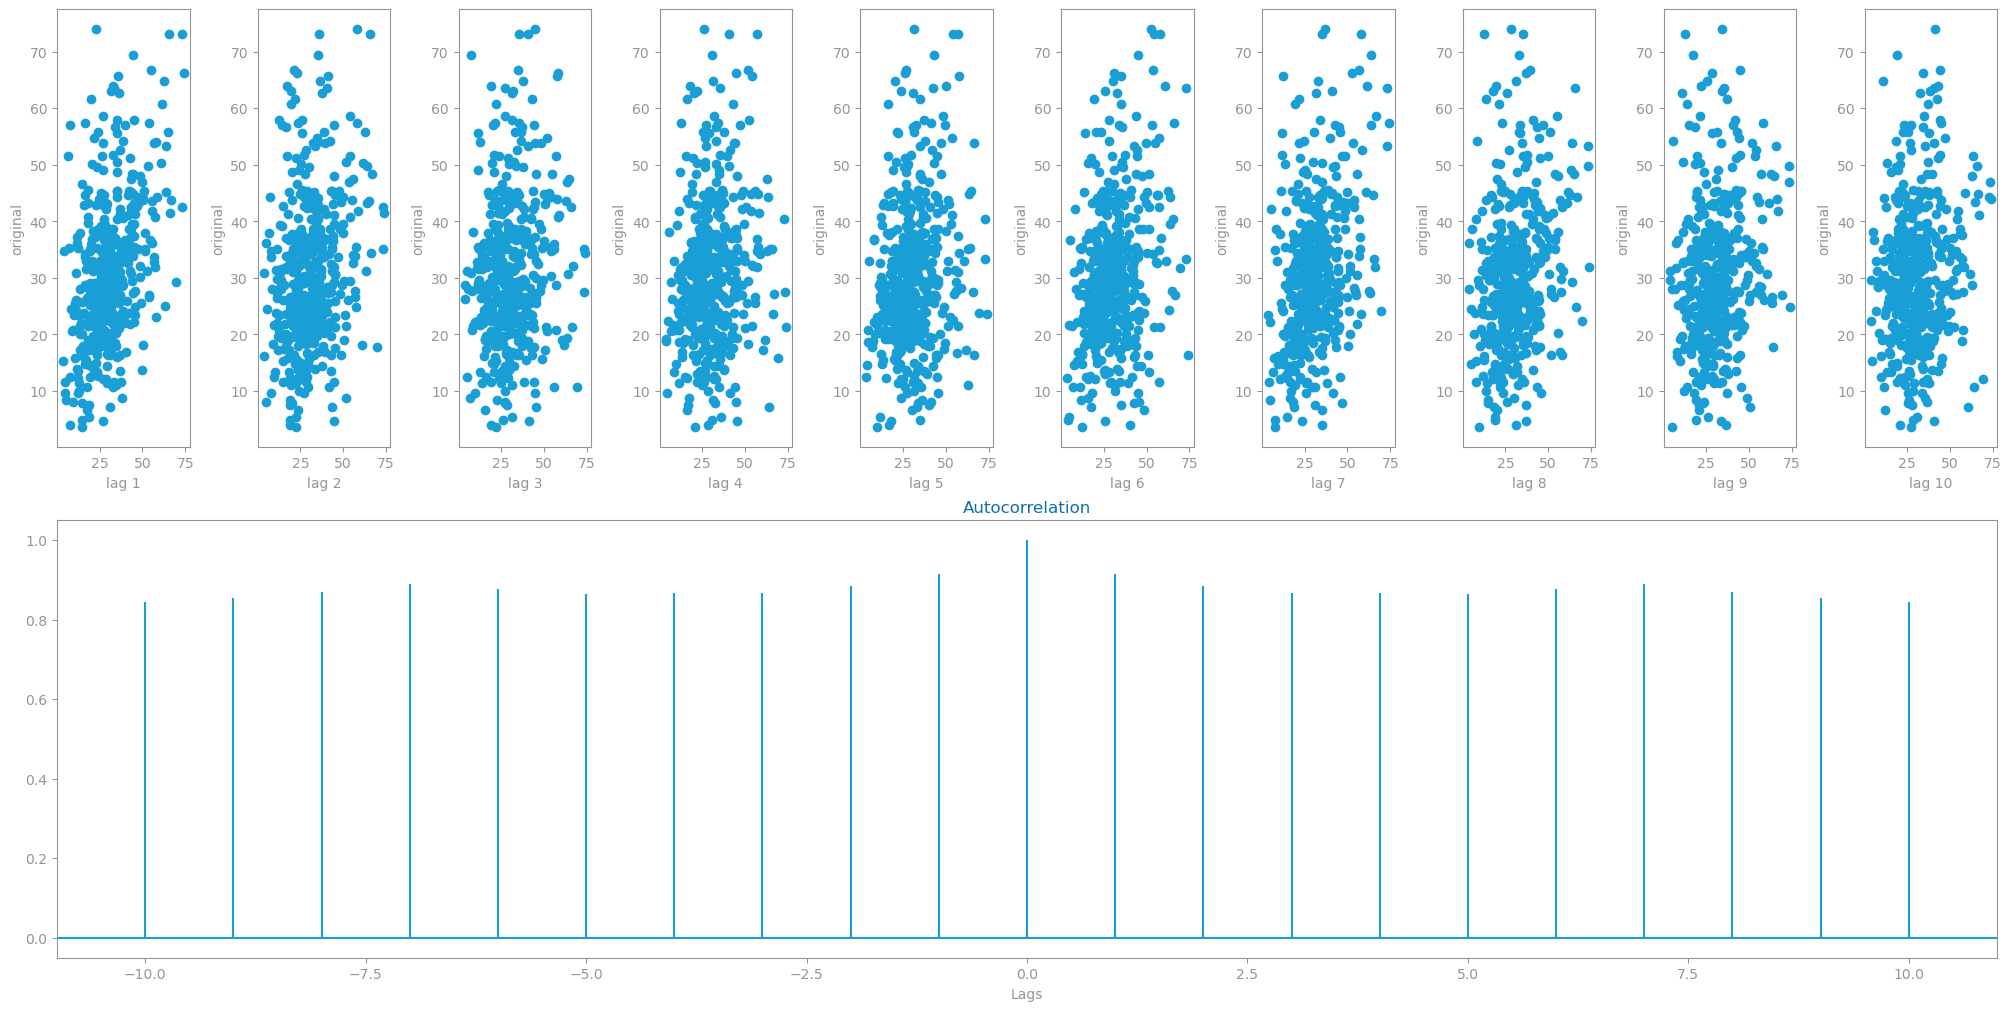

In [74]:
from matplotlib.pyplot import setp
from matplotlib.gridspec import GridSpec

series = ss_days

def autocorrelation_study(ss_hours: Series, max_lag: int, delta: int = 1):
    k: int = int(max_lag / delta)
    fig = figure(figsize=(4 * HEIGHT, 2 * HEIGHT), constrained_layout=True)
    gs = GridSpec(2, k, figure=fig)

    series_values: list = series.tolist()
    for i in range(1, k + 1):
        ax = fig.add_subplot(gs[0, i - 1])
        lag = i * delta
        ax.scatter(series.shift(lag).tolist(), series_values)
        ax.set_xlabel(f"lag {lag}")
        ax.set_ylabel("original")
    ax = fig.add_subplot(gs[1, :])
    ax.acorr(series, maxlags=max_lag)
    ax.set_title("Autocorrelation")
    ax.set_xlabel("Lags")
    return


autocorrelation_study(series, 10, 1)

##### Weekly mean

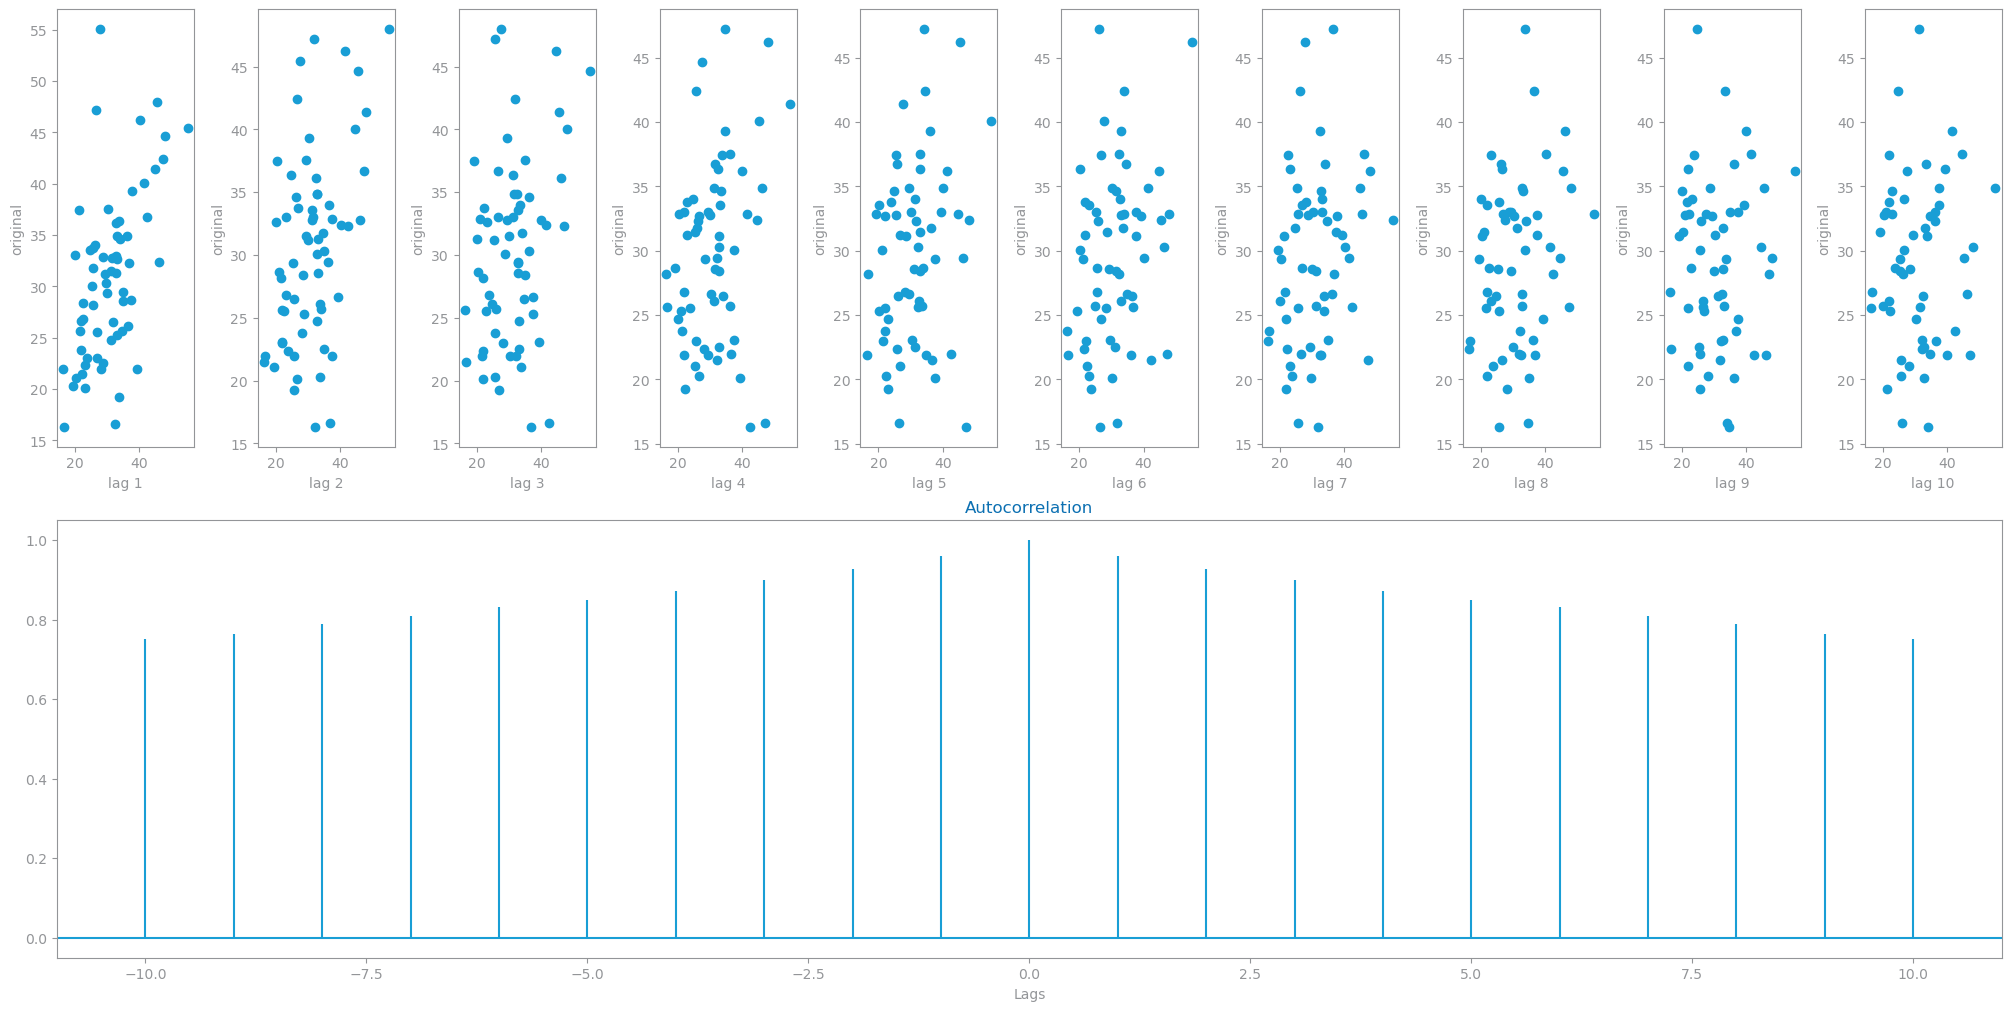

In [75]:
from matplotlib.pyplot import setp
from matplotlib.gridspec import GridSpec

series = ss_weeks

def autocorrelation_study(ss_hours: Series, max_lag: int, delta: int = 1):
    k: int = int(max_lag / delta)
    fig = figure(figsize=(4 * HEIGHT, 2 * HEIGHT), constrained_layout=True)
    gs = GridSpec(2, k, figure=fig)

    series_values: list = series.tolist()
    for i in range(1, k + 1):
        ax = fig.add_subplot(gs[0, i - 1])
        lag = i * delta
        ax.scatter(series.shift(lag).tolist(), series_values)
        ax.set_xlabel(f"lag {lag}")
        ax.set_ylabel("original")
    ax = fig.add_subplot(gs[1, :])
    ax.acorr(series, maxlags=max_lag)
    ax.set_title("Autocorrelation")
    ax.set_xlabel("Lags")
    return


autocorrelation_study(series, 10, 1)

##### Analysis for the report

### Seasonality

In [76]:

def plot_components(
    series: Series,
    title: str = "",
    x_label: str = "time",
    y_label: str = "",
) -> list[Axes]:
    decomposition: DecomposeResult = seasonal_decompose(series, model="add")
    components: dict = {
        "observed": series,
        "trend": decomposition.trend,
        "seasonal": decomposition.seasonal,
        "residual": decomposition.resid,
    }
    rows: int = len(components)
    fig: Figure
    axs: list[Axes]
    HEIGHT=5
    fig, axs = subplots(rows, 1, figsize=(3 * HEIGHT, rows * HEIGHT))
    fig.suptitle(f"{title}")
    i: int = 0
    for key in components:
        set_chart_labels(axs[i], title=key, xlabel=x_label, ylabel=y_label)
        axs[i].plot(components[key])
        i += 1
    return axs

#### Hourly - Original Series

In [77]:
target = "target_station_load_rate"
df_copy = df.copy()
data: DataFrame = df_copy
series: Series = data[target]

Atenção: Há valores ausentes após definir a frequência. Preencha ou remova esses valores.


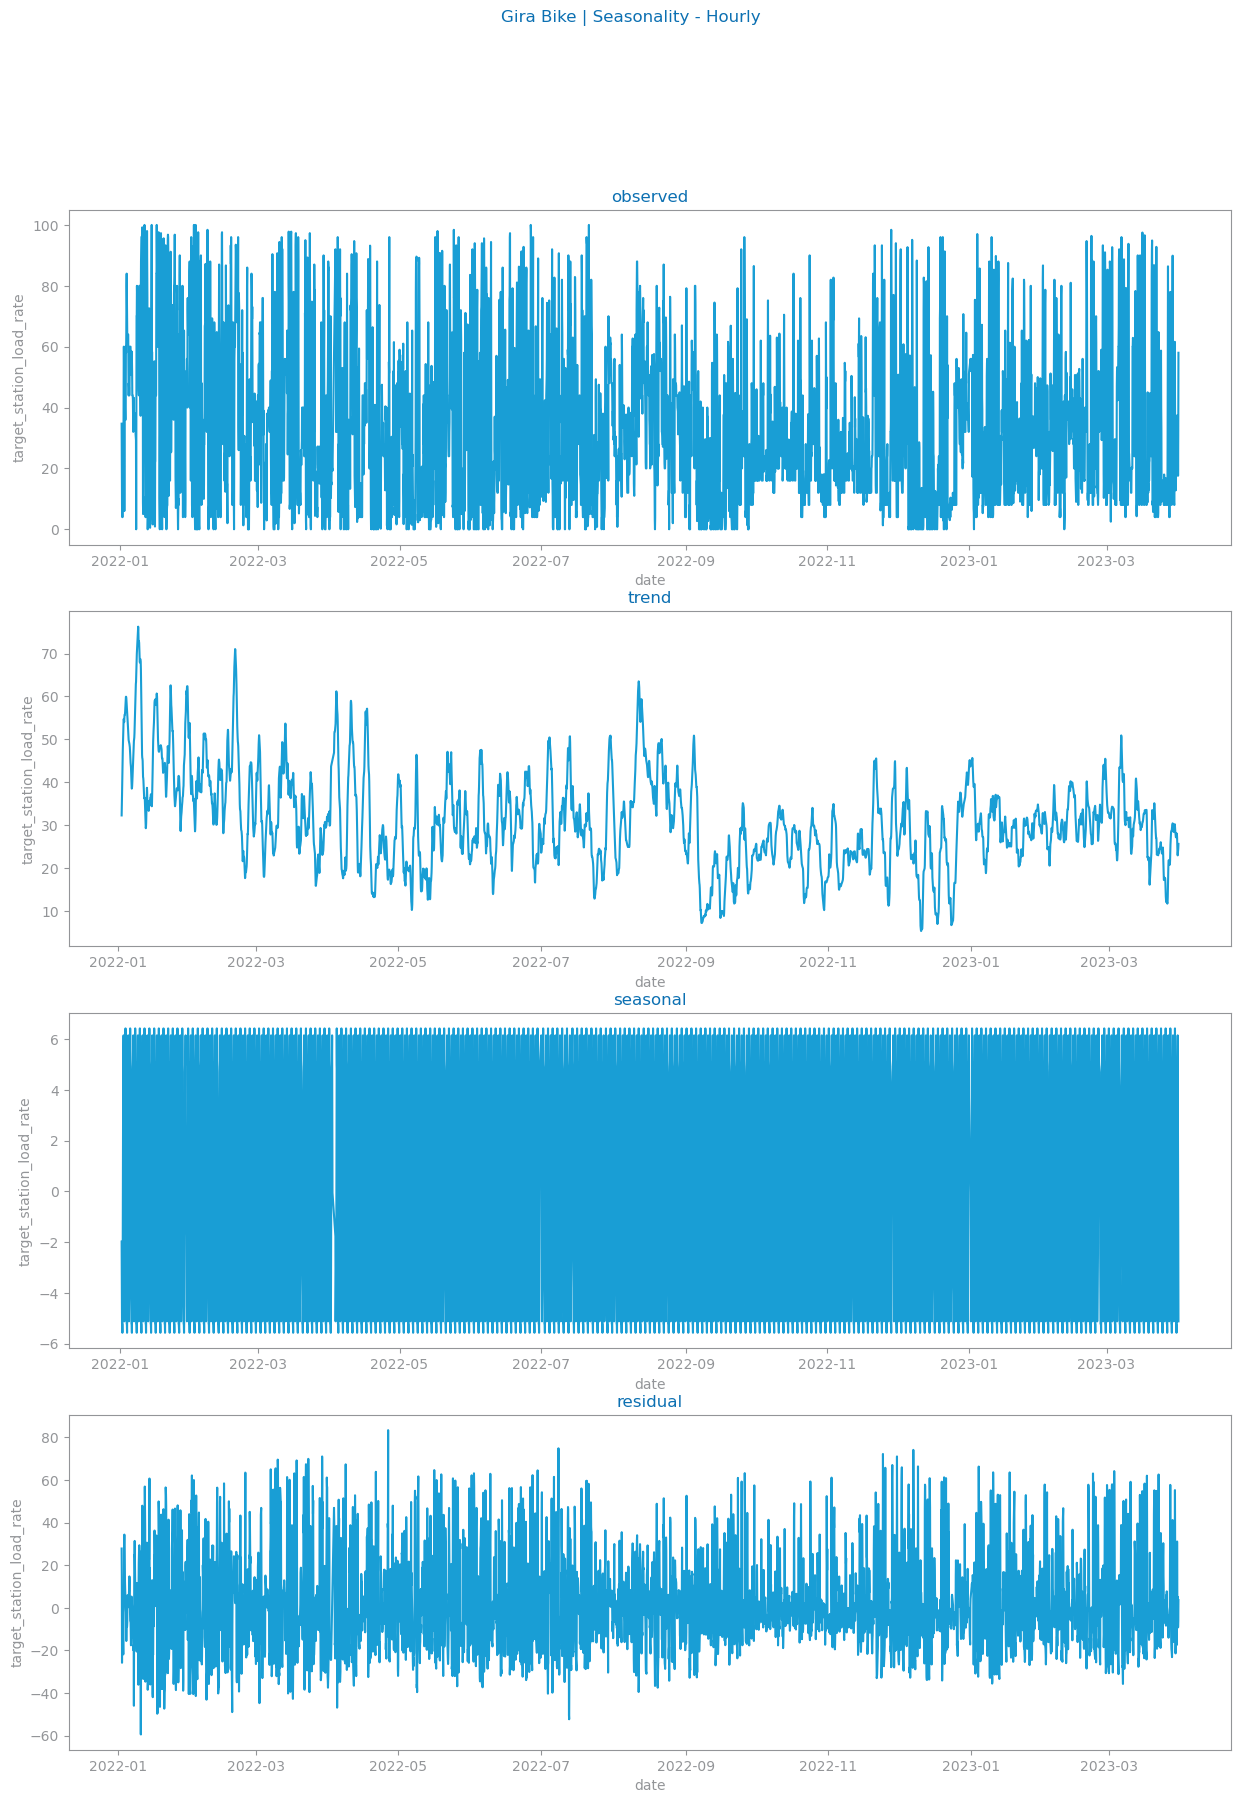

In [78]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pyplot import subplots, show
from pandas import DataFrame, Series, to_datetime

# Certifique-se de que o índice da série é um DatetimeIndex com frequência definida
ss_hours = series.dropna().copy()  # Copiar a série para evitar modificações indesejadas

# Verificar se o índice é DatetimeIndex e definir a frequência
if not isinstance(ss_hours.index, pd.DatetimeIndex):
    ss_hours.index = pd.to_datetime(ss_hours.index)  # Converter para DatetimeIndex

# Definir a frequência (por exemplo, 'H' para horário)
ss_hours = ss_hours.asfreq('H')  # 'H' para frequência horária

# Verificar se há valores ausentes após definir a frequência
if ss_hours.isnull().any():
    print("Atenção: Há valores ausentes após definir a frequência. Preencha ou remova esses valores.")
    #ss_hours = ss_hours.fillna(method='ffill')  # Preencher valores ausentes (opcional)
    ss_hours = ss_hours.dropna()  # Remover valores ausentes

# Função para plotar os componentes
def plot_components(
    series: Series,
    title: str = "",
    x_label: str = "time",
    y_label: str = "",
) -> list[Axes]:
    decomposition: DecomposeResult = seasonal_decompose(series, model="add", period=24)  # Periodo 24 para dados horários
    components: dict = {
        "observed": series,
        "trend": decomposition.trend,
        "seasonal": decomposition.seasonal,
        "residual": decomposition.resid,
    }
    rows: int = len(components)
    fig: Figure
    axs: list[Axes]
    HEIGHT = 5
    fig, axs = subplots(rows, 1, figsize=(3 * HEIGHT, rows * HEIGHT))
    fig.suptitle(f"{title}")
    i: int = 0
    for key in components:
        set_chart_labels(axs[i], title=key, xlabel=x_label, ylabel=y_label)
        axs[i].plot(components[key])
        i += 1
    return axs

# Plotar os componentes
plot_components(
    ss_hours,
    title=f"{file_tag} | Seasonality - Hourly",
    x_label=ss_hours.index.name,
    y_label=target,
)
show()

#### Daily

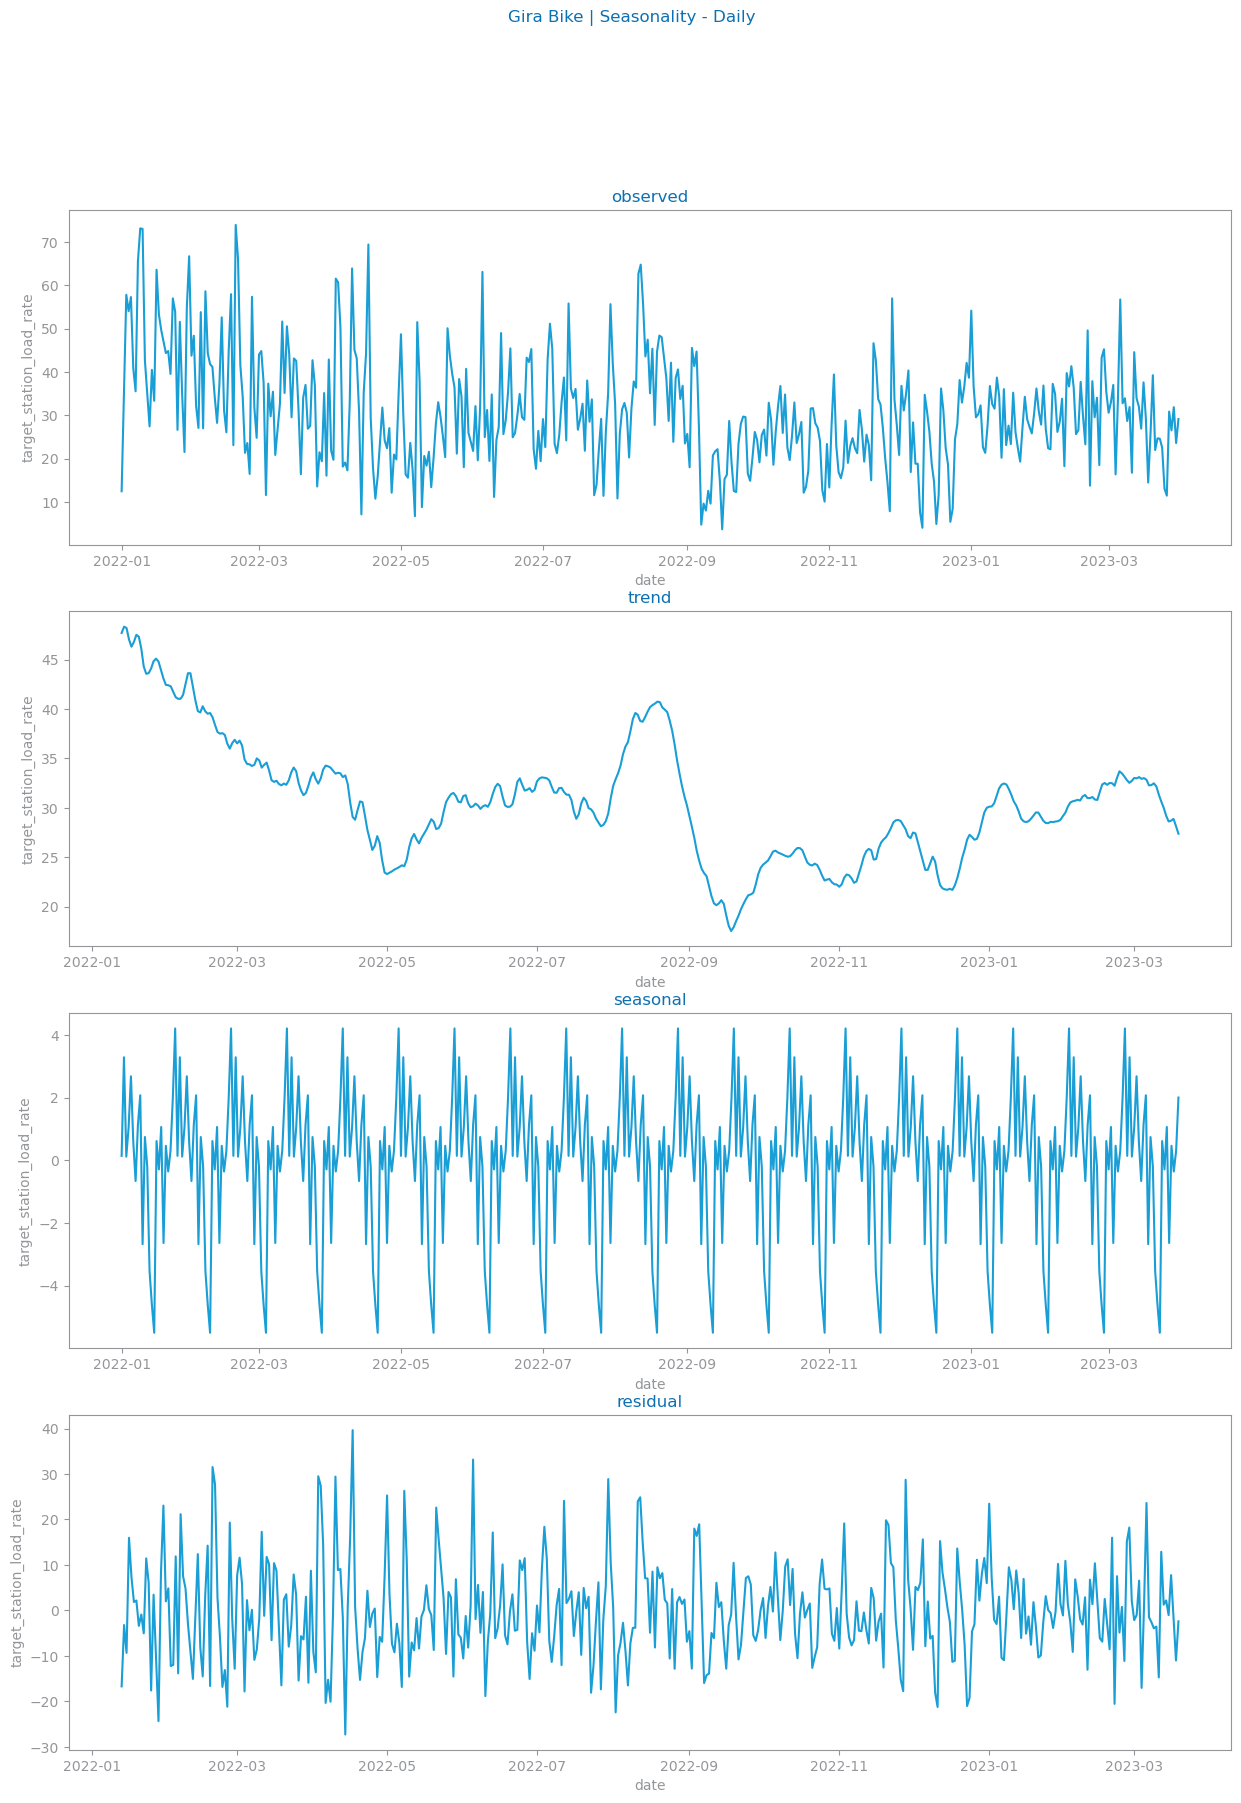

In [79]:
plot_components(
    ss_days,
    title=f"{file_tag} | Seasonality - Daily",
    x_label=ss_days.index.name,
    y_label=target,
)
show()

#### Weekly

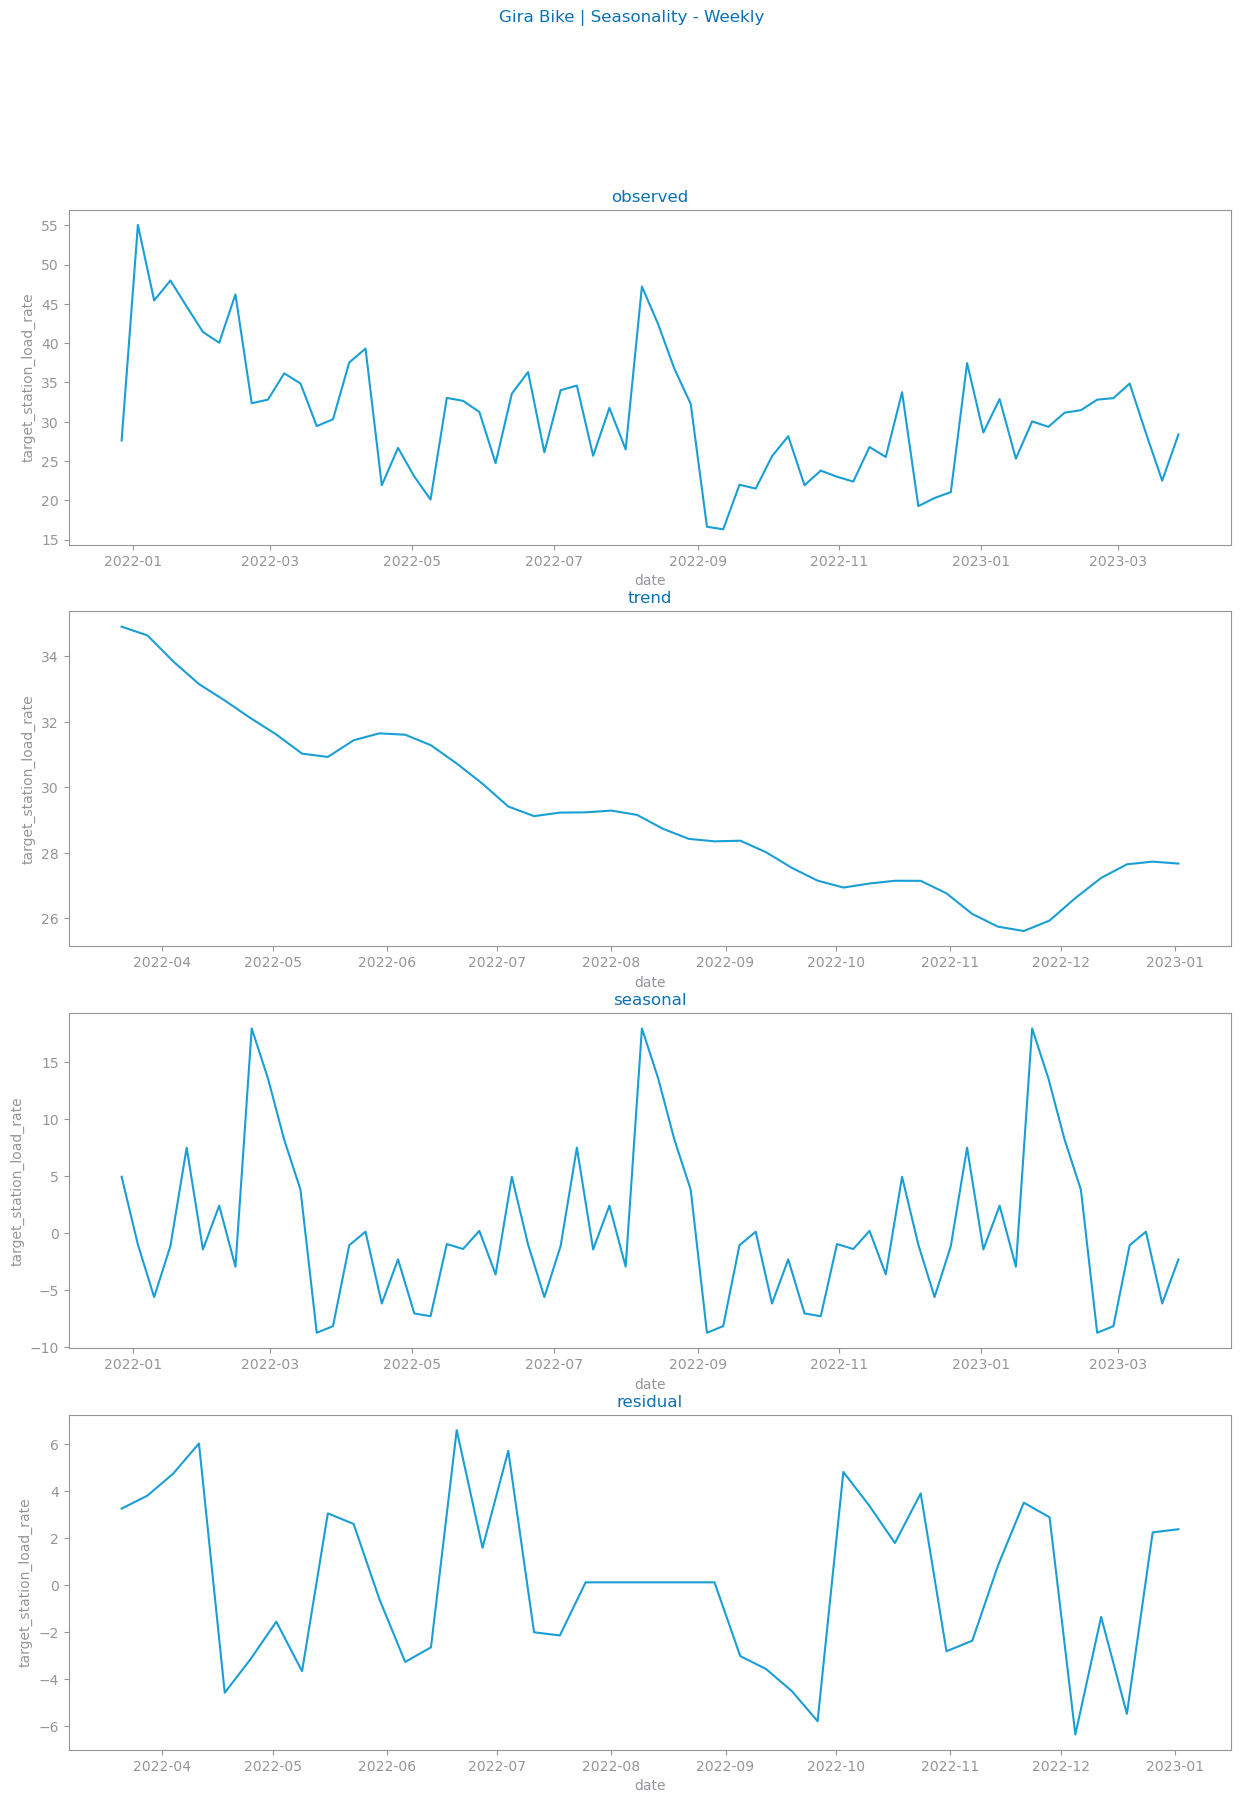

In [80]:
plot_components(
    ss_weeks,
    title=f"{file_tag} | Seasonality - Weekly",
    x_label=ss_weeks.index.name,
    y_label=target,
)
show()

- Seasonal decomposition requires at least two full cycles of data (104 observations for weekly data, assuming 52 weeks per cycle). Our dataset only has 53 weekly observations, which is insufficient for reliable seasonal analysis. 
To perform decomposition, we need more data (e.g., data spanning multiple years) or could consider a different time aggregation, like monthly data.

#### Monthly

In [81]:
plot_components(
    ss_months,
    title=f"{file_tag} | Seasonality - Monthly",
    x_label=ss_months.index.name,
    y_label=target,
)
show()

ValueError: x must have 2 complete cycles requires 48 observations. x only has 15 observation(s)

#### Analysis for the report

### Stationary

#### Hourly mean - Original Series

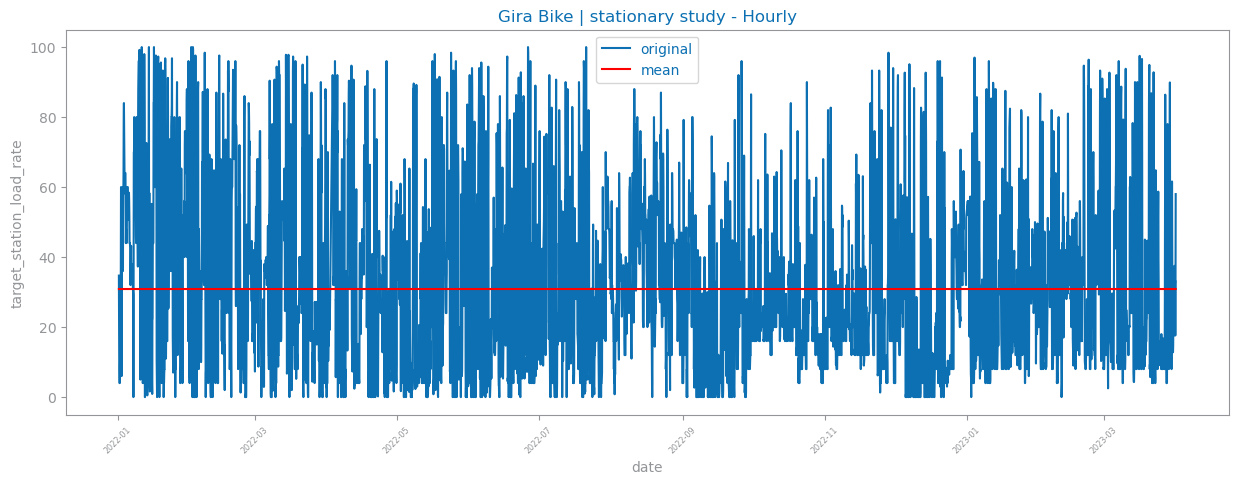

In [82]:
from matplotlib.pyplot import plot, legend

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_hours.index.to_list(),
    ss_hours.to_list(),
    xlabel=ss_hours.index.name,
    ylabel=target,
    title=f"{file_tag} | stationary study - Hourly",
    name="original",
)
n: int = len(ss_hours)
plot(ss_hours.index, [ss_hours.mean()] * n, "r-", label="mean")
legend()
show()

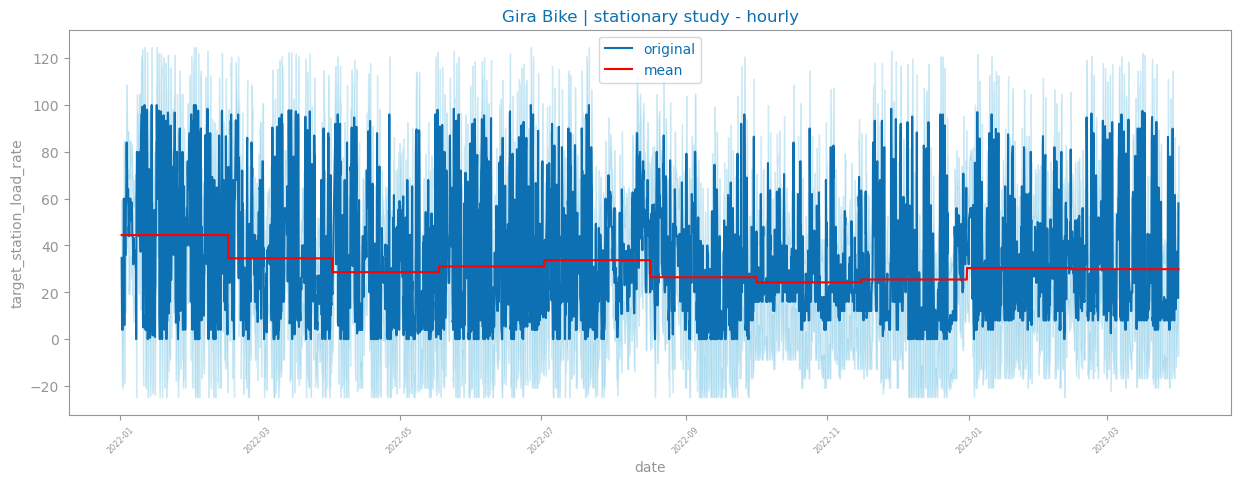

In [83]:
BINS = 10
mean_line: list[float] = []

for i in range(BINS):
    segment: Series = ss_hours[i * n // BINS : (i + 1) * n // BINS]
    mean_value: list[float] = [segment.mean()] * (n // BINS)
    mean_line += mean_value
mean_line += [mean_line[-1]] * (n - len(mean_line))

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_hours.index.to_list(),
    ss_hours.to_list(),
    xlabel=ss_hours.index.name,
    ylabel=target,
    title=f"{file_tag} | stationary study - hourly",
    name="original",
    show_stdev=True,
)
n: int = len(ss_hours)
plot(ss_hours.index, mean_line, "r-", label="mean")
legend()
show()

##### Augmented Dickey-Fuller test 

In [84]:
from statsmodels.tsa.stattools import adfuller


def eval_stationarity(ss_hours: Series) -> bool:
    result = adfuller(ss_hours)
    print(f"ADF Statistic: {result[0]:.3f}")
    print(f"p-value: {result[1]:.3f}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value:.3f}")
    return result[1] <= 0.05


print(f"The series (hourly) {('is' if eval_stationarity(ss_hours) else 'is not')} stationary")

ADF Statistic: -10.268
p-value: 0.000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
The series (hourly) is stationary


#### Daily mean 

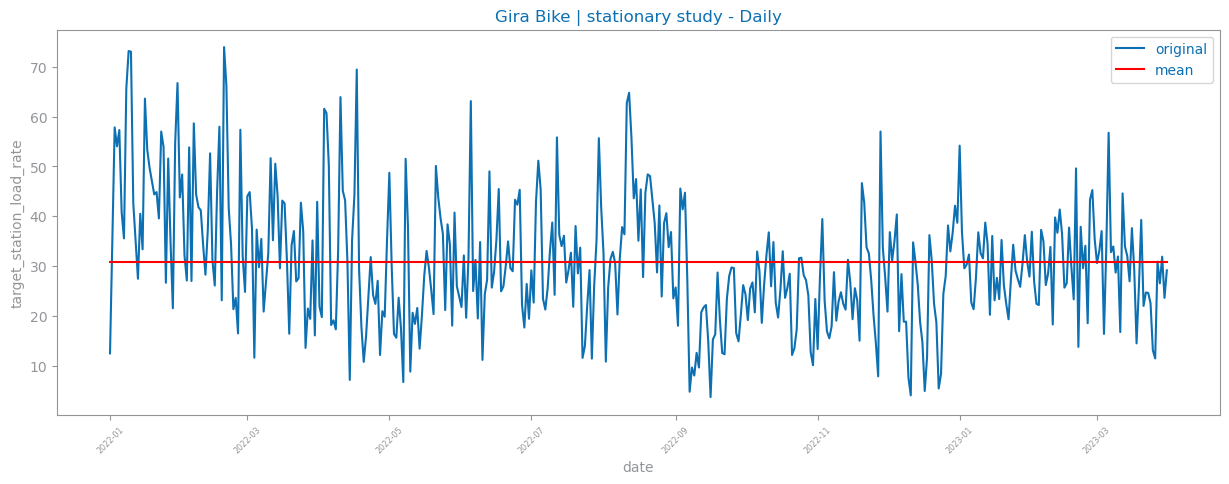

In [85]:
from matplotlib.pyplot import plot, legend

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_days.index.to_list(),
    ss_days.to_list(),
    xlabel=ss_days.index.name,
    ylabel=target,
    title=f"{file_tag} | stationary study - Daily",
    name="original",
)
n: int = len(ss_days)
plot(ss_days.index, [ss_days.mean()] * n, "r-", label="mean")
legend()
show()

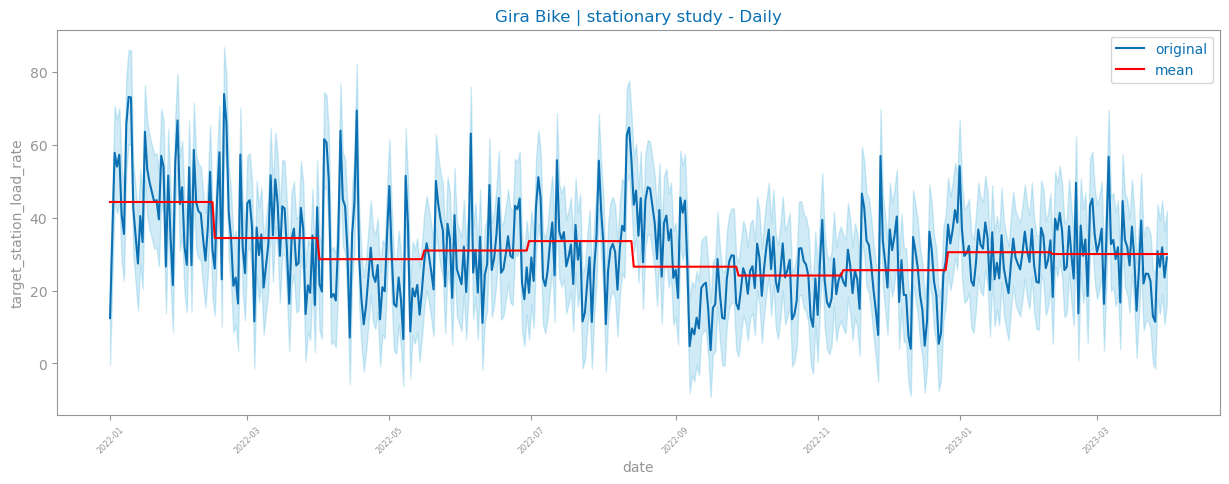

In [86]:
BINS = 10
mean_line: list[float] = []

for i in range(BINS):
    segment: Series = ss_days[i * n // BINS : (i + 1) * n // BINS]
    mean_value: list[float] = [segment.mean()] * (n // BINS)
    mean_line += mean_value
mean_line += [mean_line[-1]] * (n - len(mean_line))

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_days.index.to_list(),
    ss_days.to_list(),
    xlabel=ss_days.index.name,
    ylabel=target,
    title=f"{file_tag} | stationary study - Daily",
    name="original",
    show_stdev=True,
)
n: int = len(ss_days)
plot(ss_days.index, mean_line, "r-", label="mean")
legend()
show()

##### Augmented Dickey-Fuller test 

In [87]:
from statsmodels.tsa.stattools import adfuller


def eval_stationarity(ss_days: Series) -> bool:
    result = adfuller(ss_days)
    print(f"ADF Statistic: {result[0]:.3f}")
    print(f"p-value: {result[1]:.3f}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value:.3f}")
    return result[1] <= 0.05


print(f"The series (daily) {('is' if eval_stationarity(ss_days) else 'is not')} stationary")

ADF Statistic: -4.175
p-value: 0.001
Critical Values:
	1%: -3.445
	5%: -2.868
	10%: -2.570
The series (daily) is stationary


#### Weekly mean 

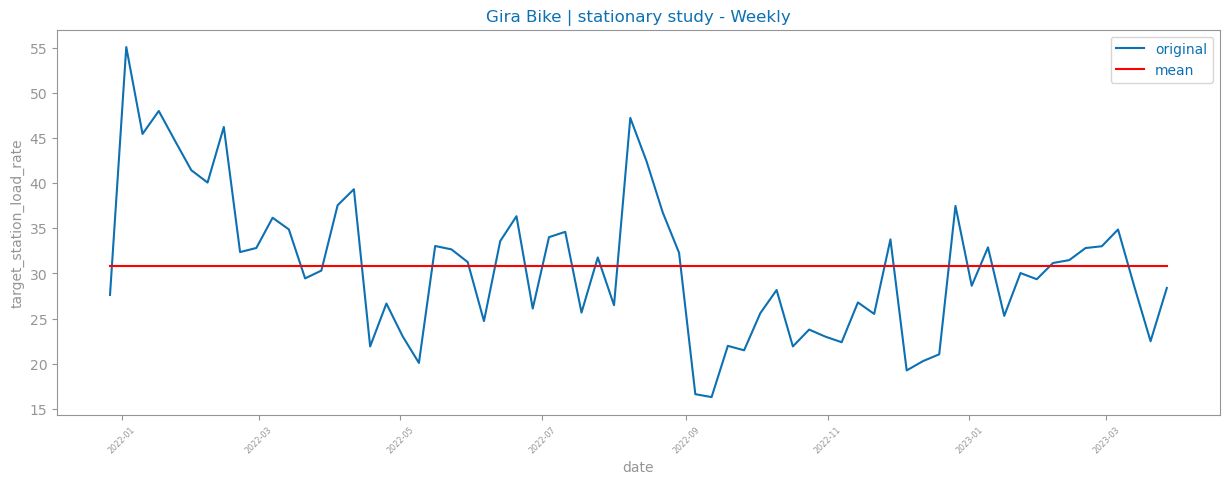

In [88]:
from matplotlib.pyplot import plot, legend

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_weeks.index.to_list(),
    ss_weeks.to_list(),
    xlabel=ss_weeks.index.name,
    ylabel=target,
    title=f"{file_tag} | stationary study - Weekly",
    name="original",
)
n: int = len(ss_weeks)
plot(ss_weeks.index, [ss_weeks.mean()] * n, "r-", label="mean")
legend()
show()

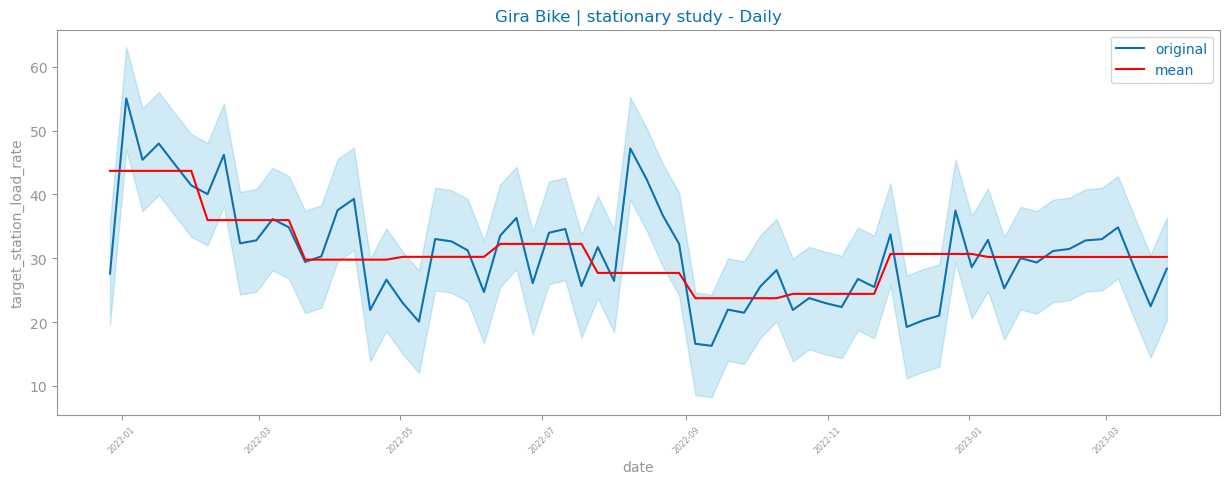

In [89]:
BINS = 10
mean_line: list[float] = []

for i in range(BINS):
    segment: Series = ss_weeks[i * n // BINS : (i + 1) * n // BINS]
    mean_value: list[float] = [segment.mean()] * (n // BINS)
    mean_line += mean_value
mean_line += [mean_line[-1]] * (n - len(mean_line))

figure(figsize=(3 * HEIGHT, HEIGHT))
plot_line_chart(
    ss_weeks.index.to_list(),
    ss_weeks.to_list(),
    xlabel=ss_weeks.index.name,
    ylabel=target,
    title=f"{file_tag} | stationary study - Daily",
    name="original",
    show_stdev=True,
)
n: int = len(ss_weeks)
plot(ss_weeks.index, mean_line, "r-", label="mean")
legend()
show()

##### Augmented Dickey-Fuller test 

In [90]:
from statsmodels.tsa.stattools import adfuller


def eval_stationarity(ss_weeks: Series) -> bool:
    result = adfuller(ss_weeks)
    print(f"ADF Statistic: {result[0]:.3f}")
    print(f"p-value: {result[1]:.3f}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"\t{key}: {value:.3f}")
    return result[1] <= 0.05


print(f"The series (weekly) {('is' if eval_stationarity(ss_weeks) else 'is not')} stationary")

ADF Statistic: -4.325
p-value: 0.000
Critical Values:
	1%: -3.535
	5%: -2.907
	10%: -2.591
The series (weekly) is stationary


#### Analysis for the report

# Data Exploration
- gira station near IST - Av. António José de Almeida / Instituto Superior Técnico	


## Study of the Target Station Load rate by time?

In [91]:
import matplotlib.pyplot as plt

# Cria uma cópia do DataFrame para evitar alterações no original
df_copy = df.copy()

# Certifica-te de que o índice é datetime
df_copy.index = pd.to_datetime(df_copy.index, errors='coerce')

# Cria colunas para hora, dia e mês
df_copy['hour'] = df_copy.index.hour
df_copy['day'] = df_copy.index.date
df_copy['month'] = df_copy.index.month
df_copy['week'] = df_copy.index.isocalendar().week  # Usar isocalendar().week em vez de week
# Filtra as condições para cada tipo de load_rate
# Maior que 20
df_copy['load_rate_less_20'] = df_copy['target_station_load_rate'] < 20
# Igual a 0
df_copy['load_rate_eq_0'] = df_copy['target_station_load_rate'] == 0

# Igual a 0
df_copy['load_rate_betw_30_50'] = (df_copy['target_station_load_rate'] >=30) & (df_copy['target_station_load_rate'] < 51)

# Igual a 100%
df_copy['load_rate_eq_100'] = df_copy['target_station_load_rate'] == 100
# Maior que 80
df_copy['load_rate_gt_80'] = df_copy['target_station_load_rate'] > 80




#### By Hour (2h level)

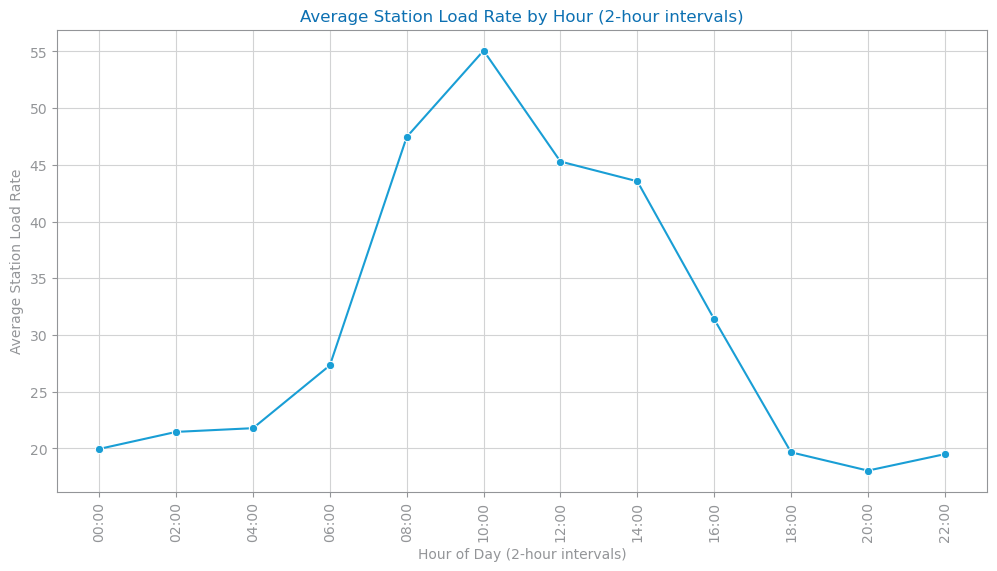

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gerando o gráfico de linha com intervalos de 2 horas (com base na coluna 'hour')
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_copy, x='hour', y='target_station_load_rate', estimator='mean', ci=None, marker='o')

# Atualizando os rótulos do eixo X para refletir os intervalos de 2 horas
x_ticks = range(0, 24, 2)  # Intervalos de 2 horas (0, 2, 4, ..., 22)
x_labels = [f"{h:02d}:00" for h in x_ticks]  # Rótulos no formato "HH:00"

plt.xticks(ticks=x_ticks, labels=x_labels, rotation=90)

plt.xlabel("Hour of Day (2-hour intervals)")
plt.ylabel("Average Station Load Rate")
plt.title("Average Station Load Rate by Hour (2-hour intervals)")
plt.grid(True)
plt.show()

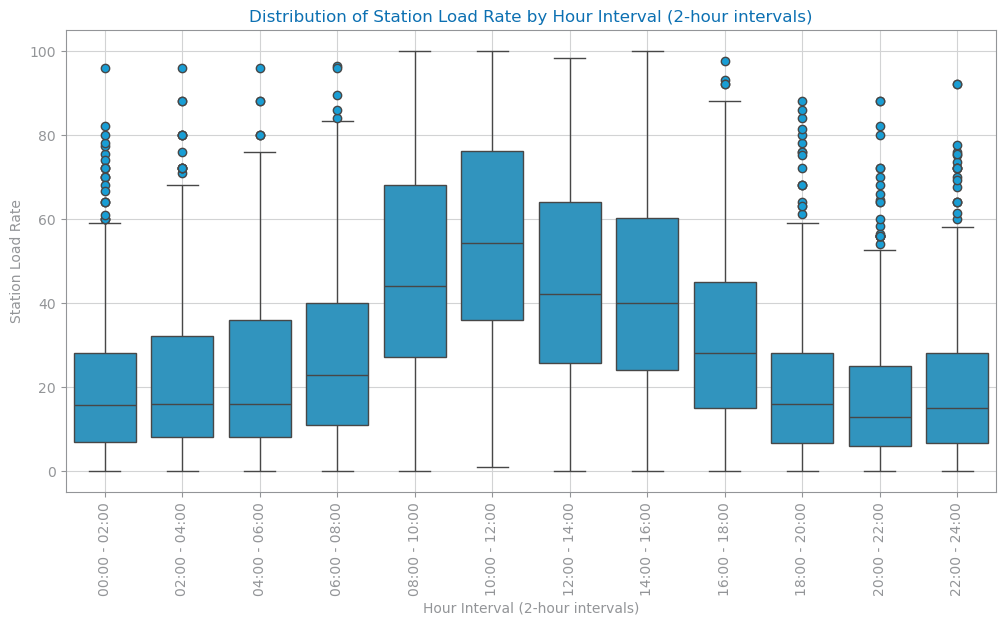

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gerando o boxplot com intervalos de 2 horas (com base na coluna 'hour')
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_copy, x='hour', y='target_station_load_rate')

# Atualizando os rótulos do eixo X para refletir os intervalos de 2 horas
# Aqui assumimos que a coluna 'hour' tem valores como 12, 14, 16, etc.
x_ticks = range(0, 24, 2)  # Intervalos de 2 horas (0, 2, 4, ..., 22)
x_labels = [f"{h:02d}:00 - {h+2:02d}:00" for h in x_ticks]  # Rótulos no formato "HH:00 - HH:00"

plt.xticks(ticks=range(len(x_ticks)), labels=x_labels, rotation=90)

plt.xlabel("Hour Interval (2-hour intervals)")
plt.ylabel("Station Load Rate")
plt.title("Distribution of Station Load Rate by Hour Interval (2-hour intervals)")
plt.grid(True)
plt.show()

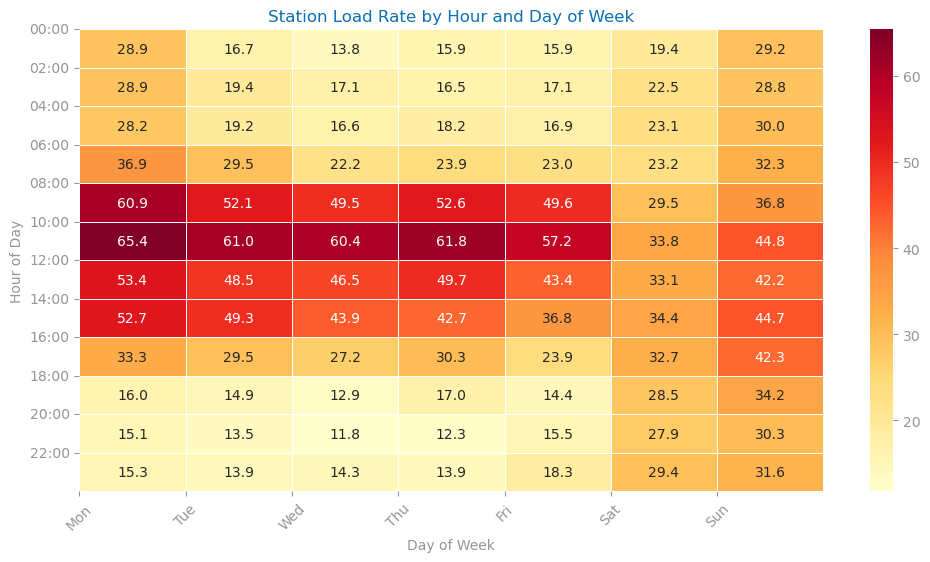

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Verificar se a coluna 'date' existe e garantir que seja do tipo datetime
df_copy['date'] = pd.to_datetime(df_copy['date'], errors='coerce')

# Criar a coluna 'day_of_week' onde 0 é segunda-feira e 6 é domingo
df_copy['day_of_week'] = df_copy['date'].dt.dayofweek

# Extrair a hora da coluna 'date'
df_copy['hour'] = df_copy['date'].dt.hour

# Agrupar os dados por hora e dia da semana para obter a média
heatmap_data = df_copy.pivot_table(index='hour', columns='day_of_week', values='target_station_load_rate', aggfunc='mean')

# Definir os rótulos do eixo Y para intervalos de 2 horas
y_ticks = range(0, 24, 2)  # Intervalos de 2 horas (0, 2, 4, ..., 22)
y_labels = [f"{h:02d}:00" for h in y_ticks]  # Rótulos no formato "HH:00"

# Configurar o heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt=".1f", linewidths=0.5)
plt.title("Station Load Rate by Hour and Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Hour of Day")
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.yticks(ticks=range(len(y_ticks)), labels=y_labels, rotation=0)  # Ajustar eixo Y para intervalos de 2 horas
plt.show()

#### By Day

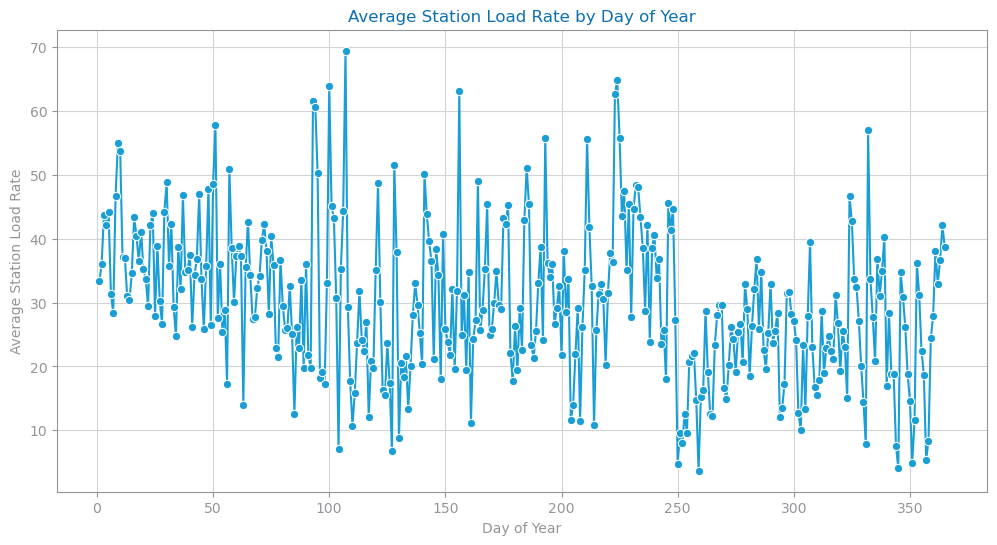

In [113]:
# Garantir que 'day_of_year' está disponível ou criar
df_copy['day_of_year'] = df_copy['date'].dt.dayofyear  # Se ainda não tiveres essa coluna

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_copy, x='day_of_year', y='target_station_load_rate', estimator='mean', ci=None, marker='o')
plt.xlabel("Day of Year")
plt.ylabel("Average Station Load Rate")
plt.title("Average Station Load Rate by Day of Year")
plt.grid(True)
plt.show()


#### By Week


Mês	Semanas ISO
- Janeiro	1, 2, 3, 4, 5
- Fevereiro	5, 6, 7, 8, 9
- Março	9, 10, 11, 12, 13
- Abril	13, 14, 15, 16, 17
- Maio	17, 18, 19, 20, 21, 22
- Junho	22, 23, 24, 25, 26
- Julho	26, 27, 28, 29, 30, 31
- Agosto	31, 32, 33, 34, 35
- Setembro	35, 36, 37, 38, 39
- Outubro	39, 40, 41, 42, 43, 44
- Novembro	44, 45, 46, 47, 48
- Dezembro	48, 49, 50, 51, 52

Estatísticas por Semana:
           mean  median        std  count
week                                     
1     41.681325   42.70  24.195646    166
2     39.124242   32.00  31.232340    165
3     36.641071   28.30  28.628145    168
4     37.037267   32.00  24.693541    161
5     35.353374   29.30  26.258156    163
6     35.524848   35.00  24.686810    165
7     38.884431   34.70  23.015430    167
8     32.577778   28.00  24.177504    162
9     32.911377   29.60  22.888150    167
10    35.527439   20.85  29.574256    164
11    31.674699   23.65  26.724205    166
12    25.976786   16.00  24.446069    168
13    29.420930   21.70  25.221672    129
14    37.545783   31.20  30.209635     83
15    39.316667   37.65  25.743788     84
16    21.921429   19.40  20.740172     84
17    26.671084   27.00  20.519340     83
18    23.036905   12.00  24.739840     84
19    20.098810   10.60  21.753069     84
20    33.037349   24.00  26.572082     83
21    32.660714   26.45  28.421441     84
22    31.

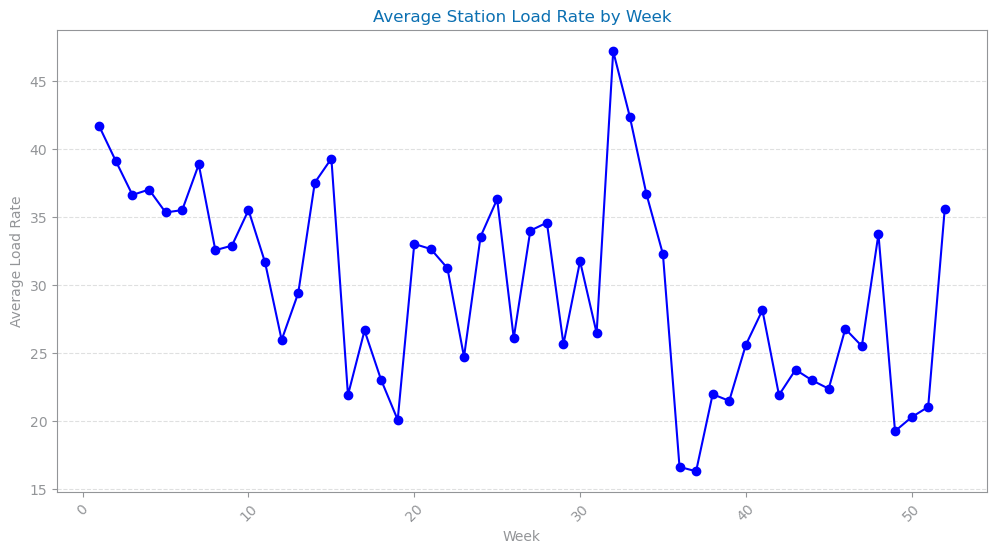

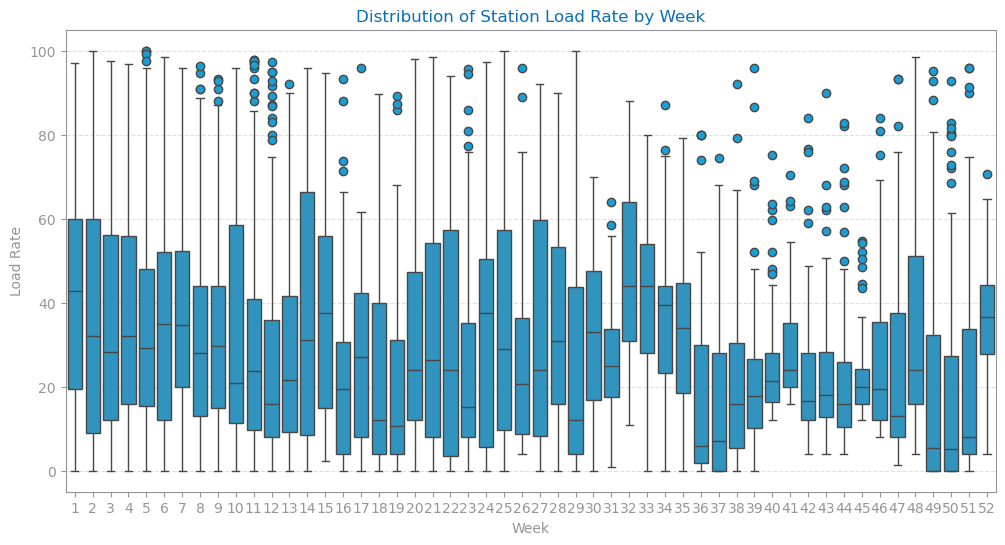

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Função para calcular estatísticas descritivas
def calculate_statistics(data, group_col, target_col):
    stats = data.groupby(group_col)[target_col].agg(['mean', 'median', 'std', 'count'])
    return stats

# Calcular estatísticas para cada semana
stats_by_week = calculate_statistics(df_copy, 'week', 'target_station_load_rate')
print("Estatísticas por Semana:")
print(stats_by_week)

# Função para plotar gráficos de barras
def plot_load_rate_distribution(data, xlabel, title):
    plt.figure(figsize=(10, 6))
    data.plot(kind='bar', color='skyblue')
    plt.xlabel(xlabel)
    plt.ylabel('Occurrences')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


# Gráfico de Linha para Média da Station Load Rate por Semana
plt.figure(figsize=(12, 6))
df_copy.groupby('week')['target_station_load_rate'].mean().plot(kind='line', marker='o', color='blue')
plt.title('Average Station Load Rate by Week')
plt.xlabel('Week')
plt.ylabel('Average Load Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Boxplot para Distribuição da Station Load Rate por Semana
plt.figure(figsize=(12, 6))
sns.boxplot(x='week', y='target_station_load_rate', data=df_copy)
plt.title('Distribution of Station Load Rate by Week')
plt.xlabel('Week')
plt.ylabel('Load Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Estatísticas por Semana:
           mean  median        std  count
week                                     
1     41.681325   42.70  24.195646    166
2     39.124242   32.00  31.232340    165
3     36.641071   28.30  28.628145    168
4     37.037267   32.00  24.693541    161
5     35.353374   29.30  26.258156    163
6     35.524848   35.00  24.686810    165
7     38.884431   34.70  23.015430    167
8     32.577778   28.00  24.177504    162
9     32.911377   29.60  22.888150    167
10    35.527439   20.85  29.574256    164
11    31.674699   23.65  26.724205    166
12    25.976786   16.00  24.446069    168
13    29.420930   21.70  25.221672    129
14    37.545783   31.20  30.209635     83
15    39.316667   37.65  25.743788     84
16    21.921429   19.40  20.740172     84
17    26.671084   27.00  20.519340     83
18    23.036905   12.00  24.739840     84
19    20.098810   10.60  21.753069     84
20    33.037349   24.00  26.572082     83
21    32.660714   26.45  28.421441     84
22    31.

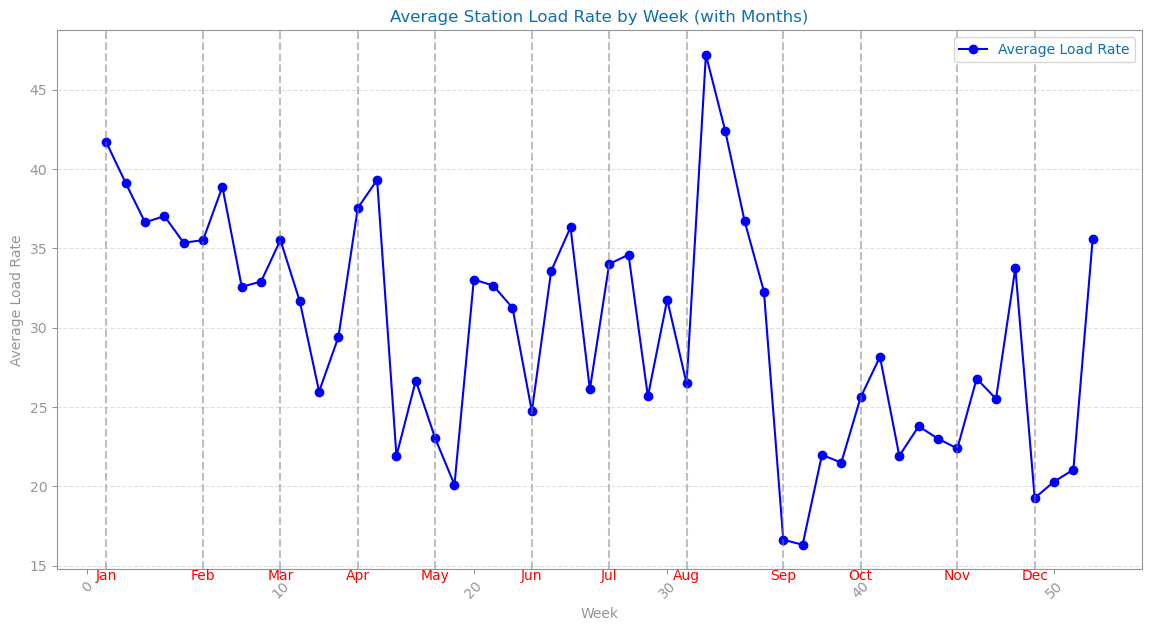

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Adicionar uma coluna para o mês
df_copy['month'] = df_copy.index.month

# Mapear semanas para meses
week_to_month = df_copy.groupby('week')['month'].first()  # Associa cada semana ao mês correspondente

# Função para calcular estatísticas descritivas
def calculate_statistics(data, group_col, target_col):
    stats = data.groupby(group_col)[target_col].agg(['mean', 'median', 'std', 'count'])
    return stats

# Calcular estatísticas para cada semana
stats_by_week = calculate_statistics(df_copy, 'week', 'target_station_load_rate')
print("Estatísticas por Semana:")
print(stats_by_week)

# Gráfico de Linha para Média da Station Load Rate por Semana
plt.figure(figsize=(14, 7))
weekly_avg = df_copy.groupby('week')['target_station_load_rate'].mean()

# Plotar o gráfico de linha
plt.plot(weekly_avg.index, weekly_avg.values, marker='o', color='blue', label='Average Load Rate')

# Adicionar rótulos dos meses no eixo x
month_labels = week_to_month.loc[weekly_avg.index]  # Rótulos dos meses correspondentes às semanas
unique_months = month_labels.unique()  # Meses únicos para evitar duplicação de rótulos

# Adicionar linhas verticais e rótulos para cada mês
for month in unique_months:
    first_week = month_labels[month_labels == month].index[0]  # Primeira semana do mês
    plt.axvline(x=first_week, color='gray', linestyle='--', alpha=0.5)  # Linha vertical
    plt.text(x=first_week, y=plt.ylim()[0], s=pd.to_datetime(f'2023-{month}-01').strftime('%b'), 
             color='red', ha='center', va='top')  # Rótulo do mês

plt.title('Average Station Load Rate by Week (with Months)')
plt.xlabel('Week')
plt.ylabel('Average Load Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

#### By Month

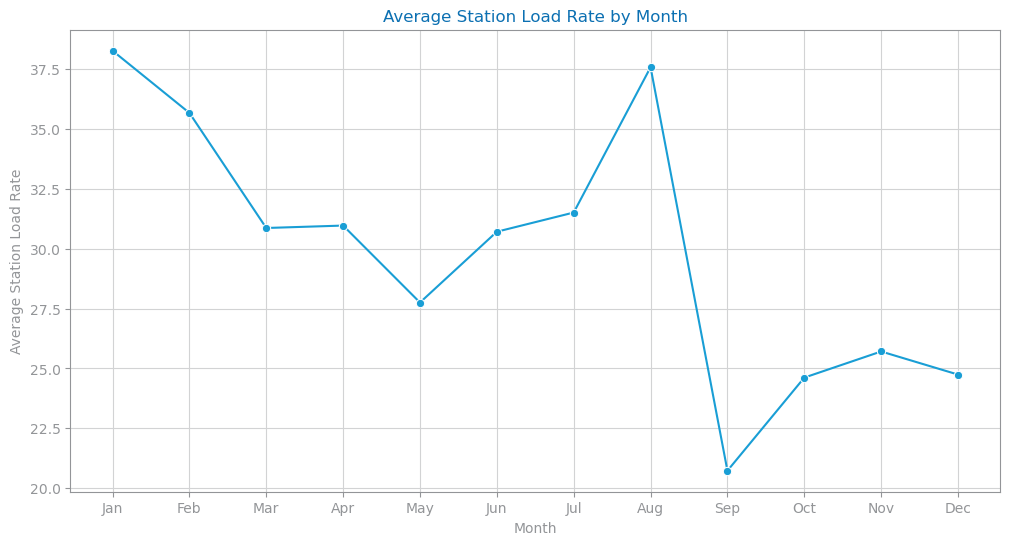

In [116]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_copy, x='month', y='target_station_load_rate', estimator='mean', ci=None, marker='o')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel("Month")
plt.ylabel("Average Station Load Rate")
plt.title("Average Station Load Rate by Month")
plt.grid(True)
plt.show()


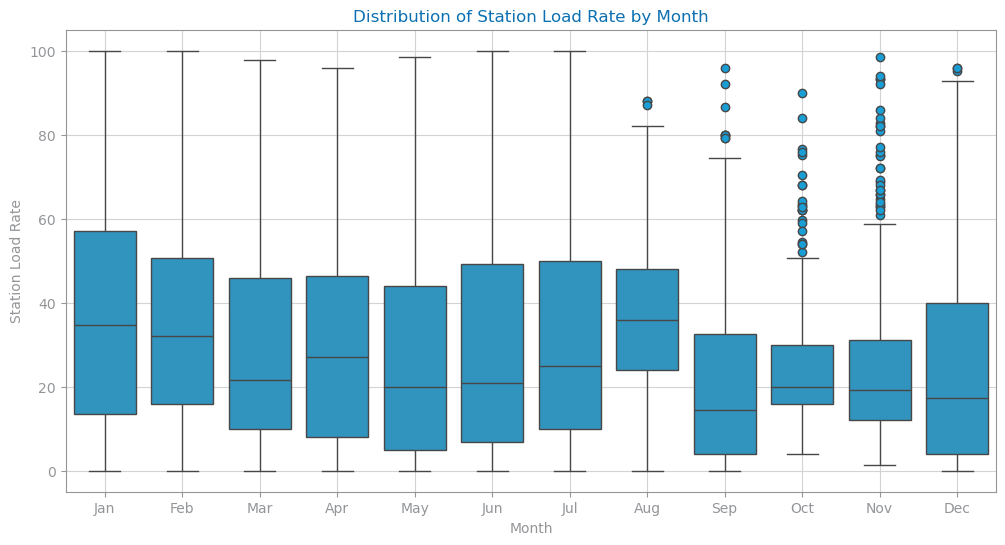

In [117]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_copy, x='month', y='target_station_load_rate')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel("Month")
plt.ylabel("Station Load Rate")
plt.title("Distribution of Station Load Rate by Month")
plt.grid(True)
plt.show()


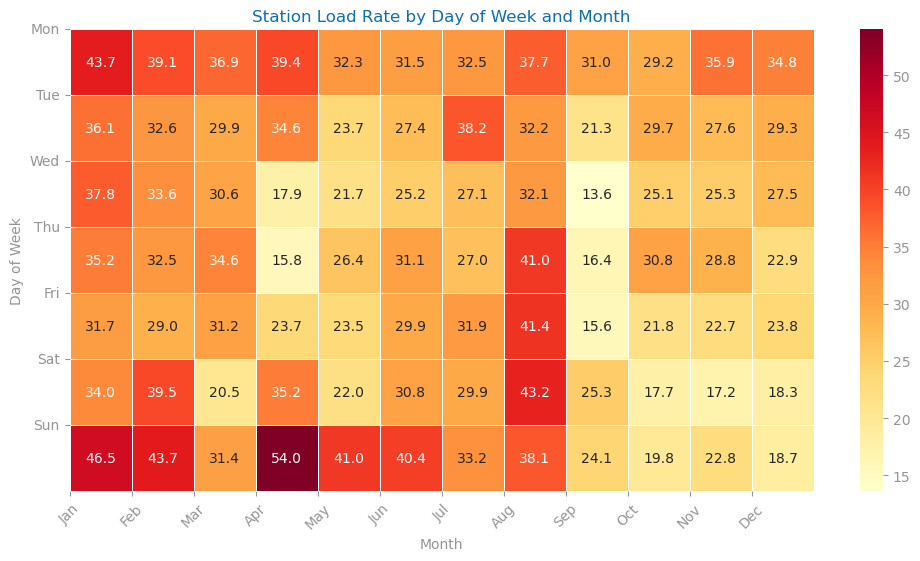

In [118]:
heatmap_data = df_copy.pivot_table(index='day_of_week', columns='month', values='target_station_load_rate', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt=".1f", linewidths=0.5)
plt.title("Station Load Rate by Day of Week and Month")
plt.xlabel("Month")
plt.ylabel("Day of Week")
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.yticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.show()


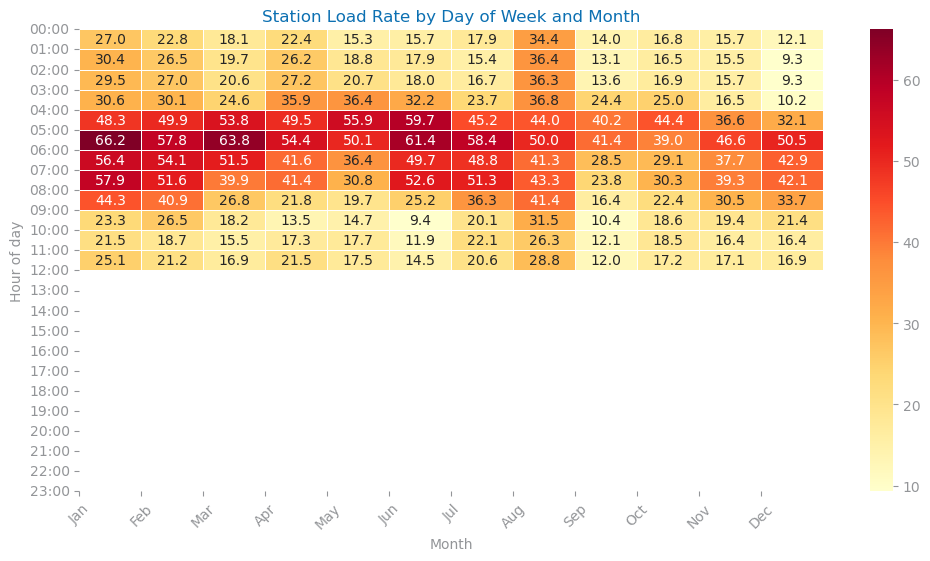

In [119]:
heatmap_data = df_copy.pivot_table(index='hour', columns='month', values='target_station_load_rate', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt=".1f", linewidths=0.5)
plt.title("Station Load Rate by Day of Week and Month")
plt.xlabel("Month")
plt.ylabel("Hour of day")
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.yticks(ticks=range(24), labels=[f"{h:02d}:00" for h in range(24)], rotation=0)
plt.show()

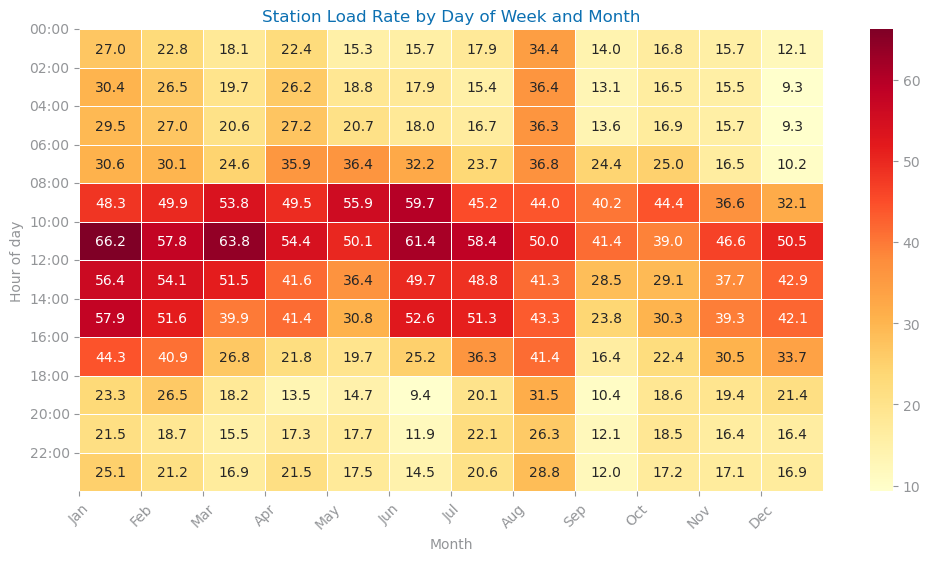

In [123]:
heatmap_data = df_copy.pivot_table(index='hour', columns='month', values='target_station_load_rate', aggfunc='mean')
y_labels = [f"{h:02d}:00" for h in y_ticks]  # Rótulos no formato "HH:00"
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt=".1f", linewidths=0.5)
plt.title("Station Load Rate by Day of Week and Month")
plt.xlabel("Month")
plt.ylabel("Hour of day")
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.yticks(ticks=range(len(y_ticks)), labels=y_labels, rotation=0)  # Ajustar eixo Y para intervalos de 2 horas
plt.show()






1. Interpretação do Station Load
Station load < 20%: Indica que a estação está com poucas bicicletas disponíveis. Isso pode significar:

Alta demanda por retiradas de bicicletas (muitos checkouts).

Poucas devoluções de bicicletas (poucos checkins).

Possível desequilíbrio na distribuição de bicicletas na rede.

Station load > 80%: Indica que a estação está quase cheia. Isso pode significar:

Muitas devoluções de bicicletas (muitos checkins).

Poucas retiradas de bicicletas (poucos checkouts).

Possível subutilização da estação ou necessidade de redistribuição de bicicletas.

2. Identificação de Padrões Temporais
Analise como o station load varia ao longo do tempo (por exemplo, por mês, como no gráfico fornecido).

Se uma estação frequentemente tem load < 20%, pode indicar que é uma estação "fonte" (onde as bicicletas são retiradas e não devolvidas em quantidade suficiente).

Se uma estação frequentemente tem load > 80%, pode indicar que é uma estação "destino" (onde as bicicletas são devolvidas, mas não retiradas em quantidade suficiente).

3. Análise de Estações Críticas
Identifique estações que estão consistentemente com load < 20% ou load > 80%. Essas estações podem precisar de intervenção, como:

Redistribuição de bicicletas (para equilibrar a disponibilidade).

Expansão da capacidade (se a estação está sempre cheia ou sempre vazia).

Reavaliação da localização (se a estação está em um local pouco estratégico).

4. Correlação com Eventos Externos
Se possível, correlacione os dados de station load com eventos externos, como:

Dias da semana (finais de semana vs. dias úteis).

Eventos climáticos (chuva, calor extremo).

Eventos especiais (festivais, shows, eventos esportivos).

Isso pode ajudar a entender picos de demanda ou subutilização.

5. Uso de Métricas Derivadas
Mesmo sem dados de checkin e checkout, você pode criar métricas derivadas do station load:

Tempo médio em que a estação fica com load < 20% ou > 80%: Indica a gravidade do problema.

Frequência de ocorrências de load extremo: Mostra se o problema é pontual ou crônico.

Variação do load ao longo do dia: Pode revelar padrões de uso (por exemplo, manhãs com alta demanda e noites com alta devolução).

6. Exemplo de Análise com o Gráfico Fornecido
No gráfico, você tem a contagem de ocorrências de load < 20% por mês.

Se houver picos em meses específicos (por exemplo, meses de verão), isso pode indicar maior demanda sazonal.

Se a contagem for consistentemente alta ao longo do ano, pode indicar um problema estrutural na rede.

Conclusão
Mesmo sem dados de checkin e checkout, o station load é uma métrica poderosa para identificar desequilíbrios e padrões de uso. Foque em identificar estações problemáticas, entender padrões temporais e correlacionar com fatores externos para tomar decisões informadas sobre redistribuição de bicicletas e gestão da rede

#### By day of week

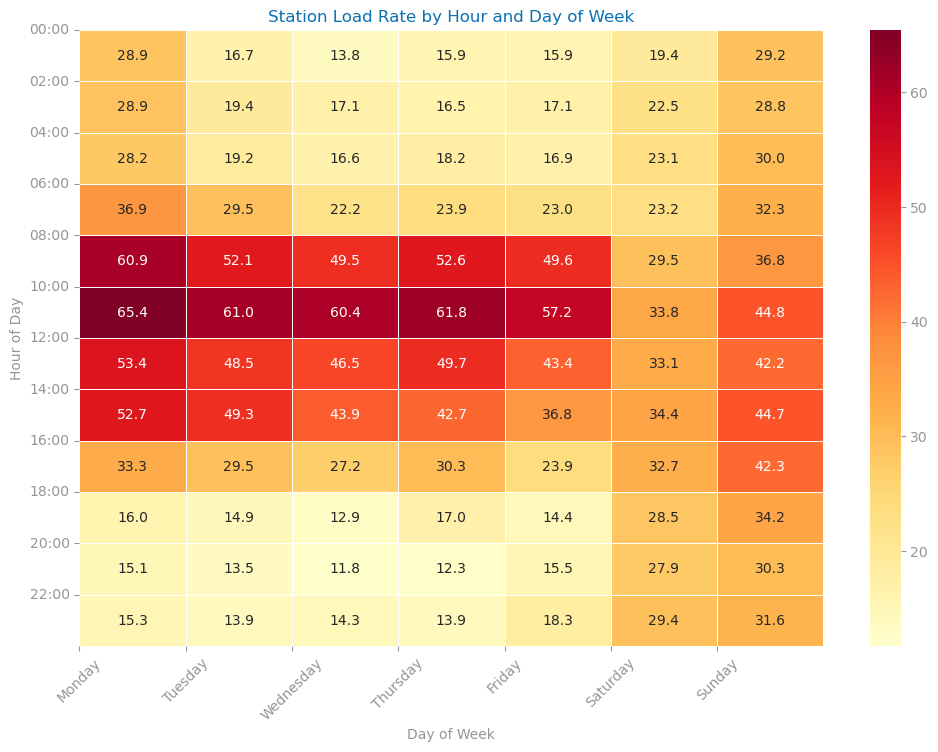

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapear números para nomes dos dias da semana
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

# Criar uma nova coluna com os nomes dos dias da semana
df_copy['day_name'] = df_copy['day_of_week'].map(day_names)

# Criar uma tabela pivot para o heatmap
heatmap_data = df_copy.pivot_table(index='hour', columns='day_name', values='target_station_load_rate', aggfunc='mean')

# Definir a ordem dos dias da semana
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data[day_order]
y_labels = [f"{h:02d}:00" for h in y_ticks]  # Rótulos no formato "HH:00"

# Plotar o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt=".1f", linewidths=0.5)
plt.title('Station Load Rate by Hour and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.xticks(ticks=range(7), labels=day_order, rotation=45)
plt.yticks(ticks=range(len(y_ticks)), labels=y_labels, rotation=0)  # Ajustar eixo Y para intervalos de 2 horas
plt.show()

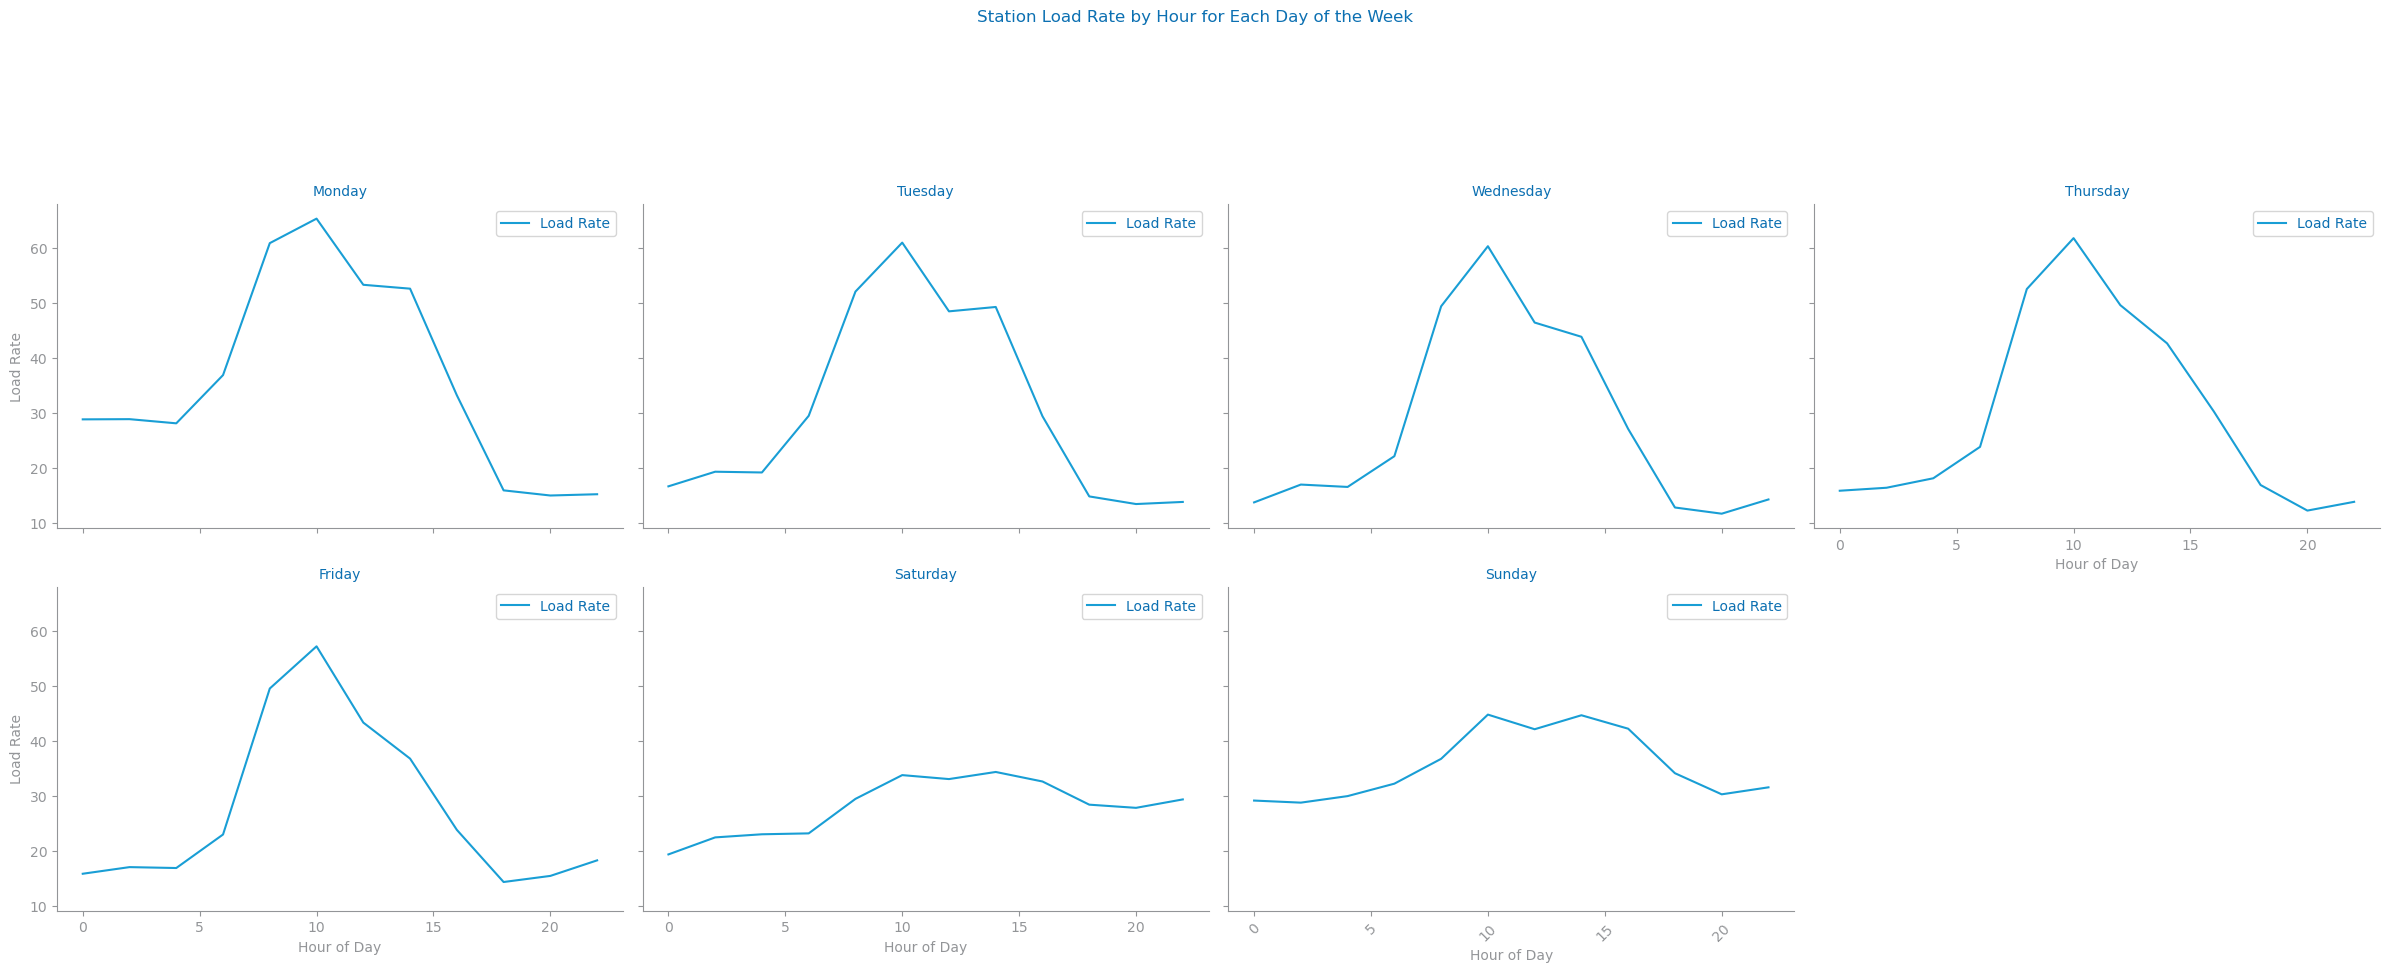

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Definir a ordem correta dos dias da semana
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_copy['day_of_week'] = pd.Categorical(df_copy['day_of_week'], categories=range(7), ordered=True)
df_copy['day_name'] = df_copy['day_of_week'].apply(lambda x: week_order[x])

# Criar small multiples para cada dia da semana
g = sns.FacetGrid(df_copy, col='day_name', col_order=week_order, col_wrap=4, height=4, aspect=1.5)
g.map(sns.lineplot, 'hour', 'target_station_load_rate', ci=None, label='Load Rate')

# Adicionar legenda a todos os gráficos
for ax in g.axes.flat:
    ax.legend(loc='upper right')

# Ajustar títulos e labels
g.set_titles('{col_name}')
g.set_axis_labels('Hour of Day', 'Load Rate')
g.fig.suptitle('Station Load Rate by Hour for Each Day of the Week', y=1.2)
plt.xticks(rotation=45)
plt.show()


#### By weekend vs weekday

<Figure size 1000x600 with 0 Axes>

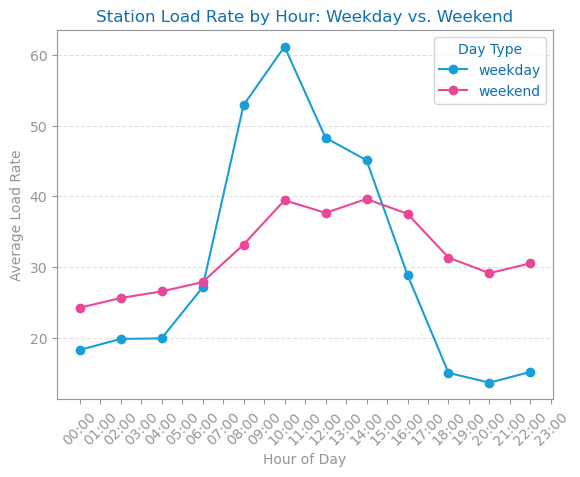

In [127]:
df_copy['day_type'] = df_copy['date'].dt.dayofweek.apply(lambda x: 'weekday' if x < 5 else 'weekend')

# Agrupar por hora e tipo de dia (weekday vs. weekend)
grouped = df_copy.groupby(['hour', 'day_type'])['target_station_load_rate'].mean().unstack()

# Plotar o gráfico de linha
plt.figure(figsize=(10, 6))
grouped.plot(kind='line', marker='o')
plt.title('Station Load Rate by Hour: Weekday vs. Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Average Load Rate')
plt.xticks(range(24), [f'{h:02d}:00' for h in range(24)], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Day Type')
plt.show()

#### By time of day

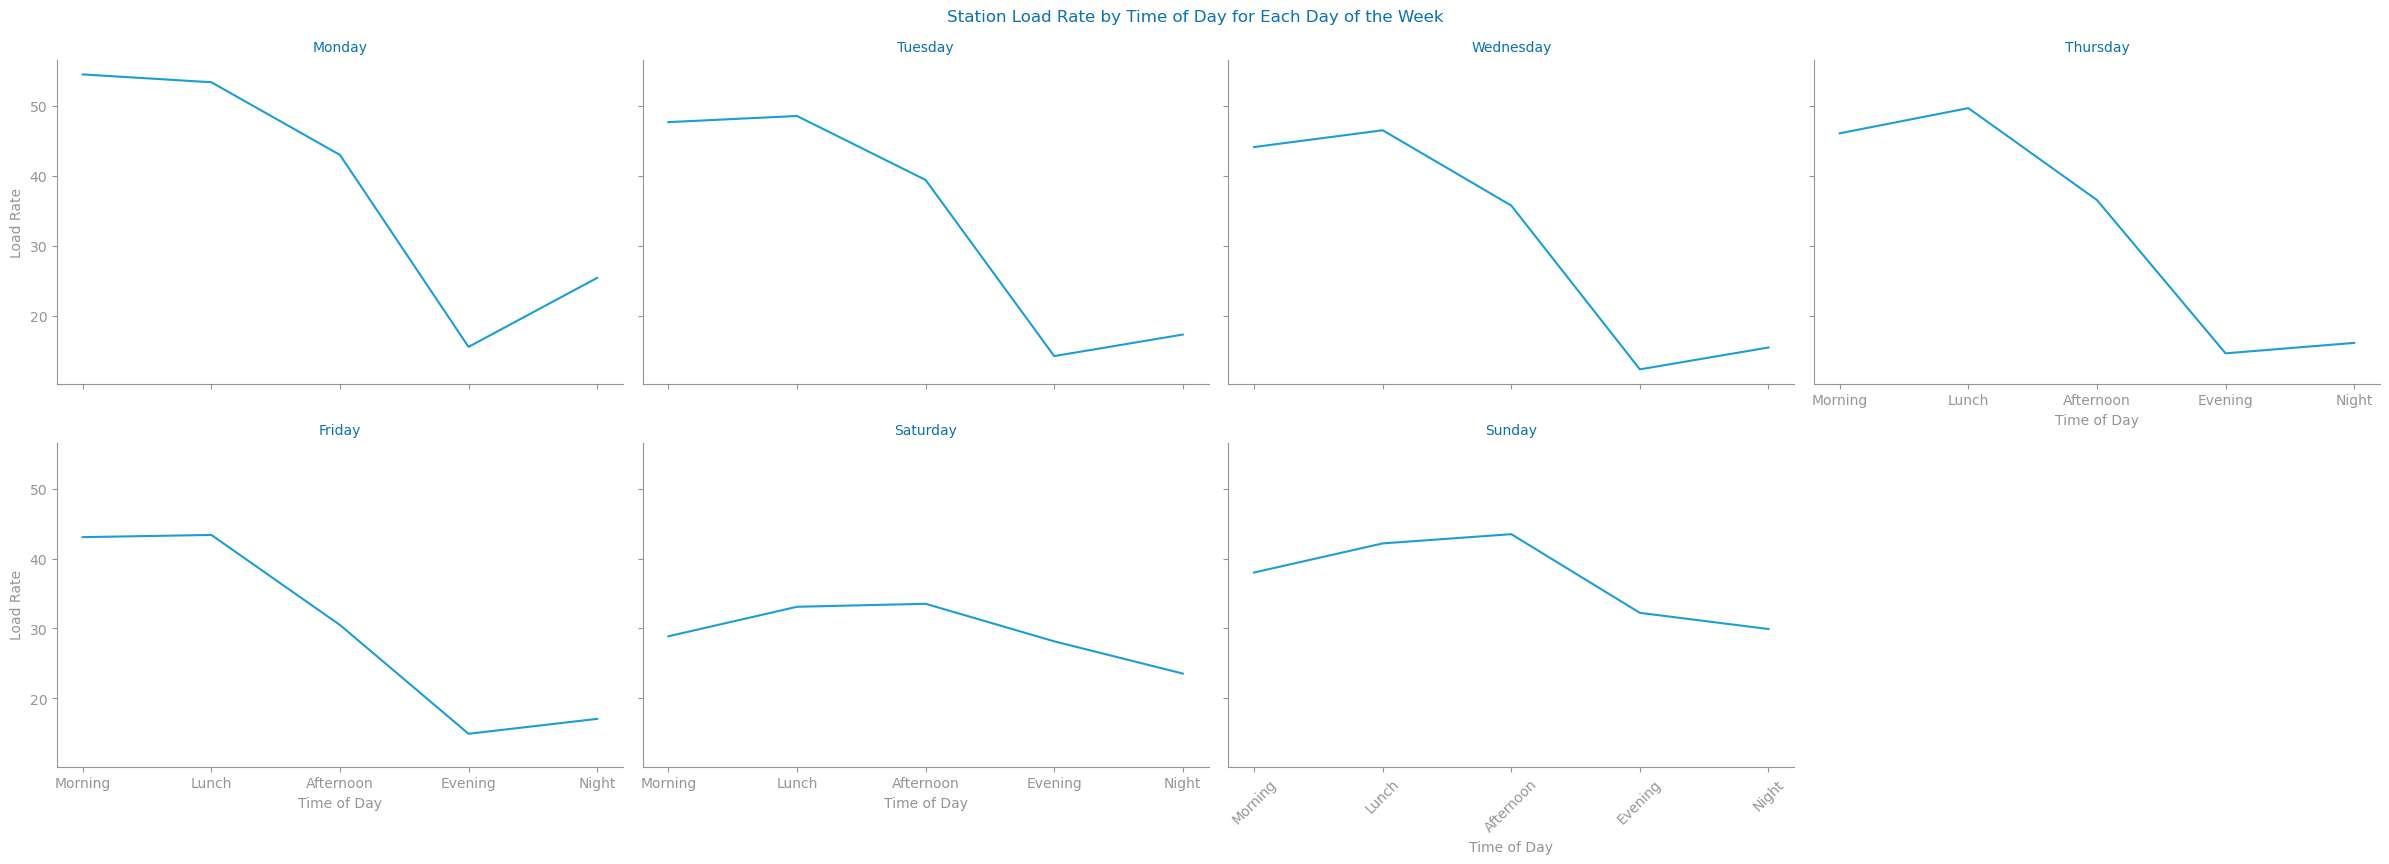

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Definir períodos do dia
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 14:
        return 'Lunch'
    elif 14 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

# Criar uma nova coluna categorizando as horas
df_copy['time_of_day'] = df_copy['hour'].apply(categorize_time_of_day)

# Definir a ordem correta dos períodos do dia
time_order = ['Morning', 'Lunch', 'Afternoon', 'Evening', 'Night']
df_copy['time_of_day'] = pd.Categorical(df_copy['time_of_day'], categories=time_order, ordered=True)

# Definir a ordem correta dos dias da semana
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_copy['day_name'] = pd.Categorical(df_copy['day_name'], categories=week_order, ordered=True)

# Criar small multiples para cada dia da semana
g = sns.FacetGrid(df_copy, col='day_name', col_order=week_order, col_wrap=4, height=4, aspect=1.5)
g.map(sns.lineplot, 'time_of_day', 'target_station_load_rate', ci=None)

# Ajustar títulos e labels
g.set_titles('{col_name}')
g.set_axis_labels('Time of Day', 'Load Rate')
g.fig.suptitle('Station Load Rate by Time of Day for Each Day of the Week', y=1.02)
plt.xticks(rotation=45)
plt.show()



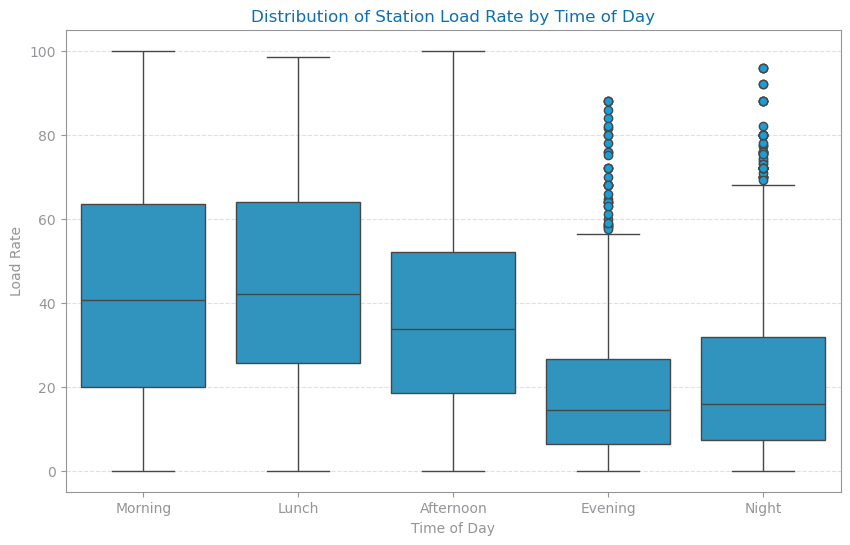

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

# Função para classificar as horas em períodos do dia
def classify_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 14:
        return 'Lunch'
    elif 14 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

# Criar a coluna 'time_of_day' no DataFrame
df_copy['time_of_day'] = df_copy['hour'].apply(classify_time_of_day)

# Definir a ordem dos períodos do dia
time_of_day_order = ['Morning', 'Lunch', 'Afternoon', 'Evening', 'Night']

# Gerar o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='time_of_day', y='target_station_load_rate', data=df_copy, order=time_of_day_order)
plt.title('Distribution of Station Load Rate by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Load Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

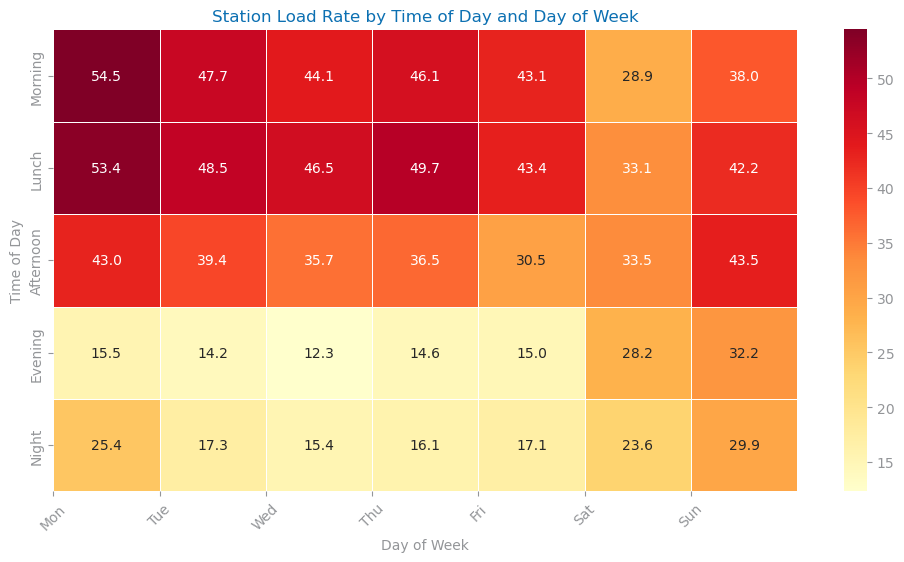

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Definir períodos do dia
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 14:
        return 'Lunch'
    elif 14 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

# Criar uma nova coluna categorizando as horas
df_copy['time_of_day'] = df_copy['hour'].apply(categorize_time_of_day)

# Criar uma tabela pivot para o heatmap
heatmap_data = df_copy.pivot_table(index='time_of_day', columns='day_name', values='target_station_load_rate', aggfunc='mean')

# Ordenar os períodos do dia
order = ['Morning', 'Lunch', 'Afternoon', 'Evening', 'Night']
heatmap_data = heatmap_data.reindex(order)

# Plotar o heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt=".1f", linewidths=0.5)
plt.title('Station Load Rate by Time of Day and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Time of Day')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.show()


#### Analysis for the report

- ***Weekday Patterns:***
    - Morning Rush (9:00 AM - 12:00 PM):
        - The station experiences a significant increase in load rate during this period.
        - This is likely due to students and staff arriving at the university by bike, resulting in many check-ins and few check-outs.
        - The data shows higher load rates during these hours, peaking around 10:00 AM (e.g., 66.7% on Monday, 63.6% on Tuesday).
    - Afternoon Decline (After 12:00 PM):
        - The load rate starts to decrease in the afternoon, especially after 4:00 PM.
        - This is consistent with people leaving the university, resulting in many check-outs and few check-ins.
        - The load rate drops significantly by 6:00 PM (e.g., 17.1% on Monday, 15.2% on Tuesday).

- ***Weekend Patterns:***
    - The load rate remains relatively stable throughout the day, with no significant peaks or drops.
    - This is expected since there are no classes or university activities on weekends, leading to lower and more consistent usage.

- ***Comparison Between Weekdays and Weekends:***
    - On weekdays, the station acts as a destination station (many arrivals in the morning, many departures in the afternoon).
    - On weekends, the station behaves more like a neutral station, with balanced check-ins and check-outs.


- **Summary of Insights:**
    - The station’s load rate is heavily influenced by the IST’s academic calendar.

    - Weekdays show clear morning peaks and afternoon declines, reflecting the university’s schedule.

    - Weekends and holiday periods (e.g., summer, Christmas) show stable and lower load rates.

    - The start of the semester leads to a sharp increase in usage, while the IST closure in August results in a significant drop.

    - The station acts as a destination station during weekdays (many arrivals in the morning, many departures in the afternoon) and a neutral station during weekends and holidays.

# TO DO's
- See if we need to remove missing values in Target column before data profling an data transofrmation? - *** DONE**
    - we need to remove it missing values treatment next notebook
- Finish dataset description text - *** DONE**
- Get chart from univariate time series  - target column  *** DONE**
- Get chart from multivariate time series  - for all df columns through time  *** DONE**
    - Para isto ver codigo prof ds_labs e tentar replicar: - https://web.ist.utl.pt/~claudia.antunes/DSLabs/
- Do the rest of the part in João notebook after Series Analysis *** DONE**
    - estudar a estacionariedade da time series
    - Para isto ver codigo prof ds_labs e ver quais são os outros passos/estudos que ela faz no data profiling: - https://web.ist.utl.pt/~claudia.antunes/DSLabs/
- In paralel, read ppt from the course regarding time series and how to to data profling for Time Series: *** TO DO**
    - title: Time Series
    - https://drive.google.com/file/d/1hg2e2iy3uYYtoV4u0OGaOf8VrLHKNVIz/view
- In paralel, continue to read the book, and apply R, - book: /Users/lourefra/Documents/Mercedes-benz.io/TRAINING/post graduation course IST - Data science/material de apoio/mod_3_previsao em series temporais/Forecasting_Principles_and_Practice.pdf
- Add text to sections "Analysis to the report" *** TO DO**
- Em relação aos missing values, a prof disse para imputar o valor da media entre o ponto anterior e o ponto a seguir a cada missing value: *** TO DO**
    - Fazer esta parte no incio do data preparation/trasnformation
    - acho que é okay até porque a maior parte dos missing values são pontuais (não temos muitos casos em que tenhamos missing values consecutivos)
    - em relação à station_load_rate, a prof disse que otecnico fecha nas 2 primeiras semanas de agosto (fecha 2 semanas em agosto não tenho a certeza é quando é, se é no inicio, meio ou fim)

